Paper on Different Defense Systems: https://doi.org/10.1126/science.aar4120 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import biom
%matplotlib inline

In [2]:
metadata = pd.read_csv('metadata.txt', sep='\t', index_col=0)
metadata.head()

qiita_sample_name  box_id  cage_id collection_timepoint  \
sample-id                                                                
23LL_Day3_1    12986.23LL.Day3.1     NaN     23.0                 Day3   
23LL_Day3_10  12986.23LL.Day3.10     NaN     23.0                 Day3   
23LL_Day3_11  12986.23LL.Day3.11     NaN     23.0                 Day3   
23LL_Day3_12  12986.23LL.Day3.12     NaN     23.0                 Day3   
23LL_Day3_13  12986.23LL.Day3.13     NaN     23.0                 Day3   

             collection_timestamp date_colonized diet  elevation  \
sample-id                                                          
23LL_Day3_1         7/15/17 10:00        7/12/17   RC      193.0   
23LL_Day3_10        7/15/17 10:00        7/12/17   RC      193.0   
23LL_Day3_11        7/15/17 10:00        7/12/17   RC      193.0   
23LL_Day3_12        7/15/17 10:00        7/12/17   RC      193.0   
23LL_Day3_13        7/15/17 10:00        7/12/17   RC      193.0   

             elevation_units           empo_1  ... dam sire date_collected  \
sample-id                                      ...                           
23LL_Day3_1           meters  Host-associated  ...  A1    A        7/15/17   
23LL_Day3_10          meters  Host-associated  ...  A1    A        7/15/17   
23LL_Day3_11          meters  Host-associated  ...  A1    A        7/15/17   
23LL_Day3_12          meters  Host-associated  ...  A1    A        7/15/17   
23LL_Day3_13          meters  Host-associated  ...  A1    A        7/15/17   

             bacteria_strain extraction_method extraction_kit  run  plate  \
sample-id                                                                   
23LL_Day3_1             AZ20     magnetic bead    Thermo CORE  2.0    1.0   
23LL_Day3_10            AZ20     magnetic bead    Thermo CORE  2.0    1.0   
23LL_Day3_11            AZ20     magnetic bead    Thermo CORE  2.0    1.0   
23LL_Day3_12            AZ20     magnetic bead    Thermo CORE  2.0    1.0   
23LL_Day3_13            AZ20     magnetic bead    Thermo CORE  2.0    1.0   

                   index_x index_y  
sample-id                           
23LL_Day3_1    23LL_Day3_1     NaN  
23LL_Day3_10  23LL_Day3_10     NaN  
23LL_Day3_11  23LL_Day3_11     NaN  
23LL_Day3_12  23LL_Day3_12     NaN  
23LL_Day3_13  23LL_Day3_13     NaN  

[5 rows x 57 columns]

In [3]:
metadata.tail()

qiita_sample_name  box_id  cage_id collection_timepoint  \
sample-id                                                                
46R_Month6_7  12986.46R.Month6.7     NaN     46.0               Month6   
46R_Month6_8  12986.46R.Month6.8     NaN     46.0               Month6   
46R_Month6_9  12986.46R.Month6.9     NaN     46.0               Month6   
AZ51_ref                     NaN     NaN      NaN            reference   
AZ20_ref                     NaN     NaN      NaN            reference   

             collection_timestamp date_colonized diet  elevation  \
sample-id                                                          
46R_Month6_7        3/13/18 10:00        9/13/17   RC      193.0   
46R_Month6_8        3/13/18 10:00        9/13/17   RC      193.0   
46R_Month6_9        3/13/18 10:00        9/13/17   RC      193.0   
AZ51_ref                      NaN            NaN  NaN        NaN   
AZ20_ref                      NaN            NaN  NaN        NaN   

             elevation_units           empo_1  ...  dam sire date_collected  \
sample-id                                      ...                            
46R_Month6_7          meters  Host-associated  ...   B1    B        3/13/18   
46R_Month6_8          meters  Host-associated  ...   B1    B        3/13/18   
46R_Month6_9          meters  Host-associated  ...   B1    B        3/13/18   
AZ51_ref                 NaN              NaN  ...  NaN  NaN            NaN   
AZ20_ref                 NaN              NaN  ...  NaN  NaN            NaN   

             bacteria_strain extraction_method extraction_kit  run  plate  \
sample-id                                                                   
46R_Month6_7            AZ51     magnetic bead    Thermo CORE  2.0   21.0   
46R_Month6_8            AZ51     magnetic bead    Thermo CORE  2.0   21.0   
46R_Month6_9            AZ51     magnetic bead    Thermo CORE  2.0   21.0   
AZ51_ref                 NaN               NaN            NaN  NaN    NaN   
AZ20_ref                 NaN               NaN            NaN  NaN    NaN   

                     index_x         index_y  
sample-id                                     
46R_Month6_7             NaN    46R_Month6_7  
46R_Month6_8             NaN    46R_Month6_8  
46R_Month6_9             NaN    46R_Month6_9  
AZ51_ref                 NaN  AZ51_reference  
AZ20_ref      AZ20_reference             NaN  

[5 rows x 57 columns]

# AZ20

In [4]:
AZ20_defenses = pd.read_csv('defensefinder_AZ20.csv')
AZ20_defenses.head()

sample      replicon      hit_id       gene_name  hit_pos  \
0  AZ20_ref  UserReplicon  AZ20_00041            PtuB       41   
1  AZ20_ref  UserReplicon  AZ20_00042            PtuA       42   
2  AZ20_ref  UserReplicon  AZ20_00296    PsyrTA_PsyrT      294   
3  AZ20_ref  UserReplicon  AZ20_00297    PsyrTA_PsyrA      295   
4  AZ20_ref  UserReplicon  AZ20_03979  Type_IV_REases     3900   

                                           model_fqn  \
0  defense-finder-models/DefenseFinder_2/Septu/Septu   
1  defense-finder-models/DefenseFinder_2/Septu/Septu   
2  defense-finder-models/DefenseFinder_2/PsyrTA/P...   
3  defense-finder-models/DefenseFinder_2/PsyrTA/P...   
4             defense-finder-models/RM/RM/RM_Type_IV   

                      sys_id  sys_loci  locus_num  sys_wholeness  ...  \
0       UserReplicon_Septu_2         1          1            1.0  ...   
1       UserReplicon_Septu_2         1          1            1.0  ...   
2      UserReplicon_PsyrTA_1         1          1            1.0  ...   
3      UserReplicon_PsyrTA_1         1          1            1.0  ...   
4  UserReplicon_RM_Type_IV_3         1          1            1.0  ...   

   hit_seq_len     hit_i_eval hit_score hit_profile_cov  hit_seq_cov  \
0          243   3.200000e-41     140.0           0.925        0.967   
1          465  7.000000e-107     356.9           0.968        0.991   
2          699   0.000000e+00    1063.6           0.993        0.996   
3          400  9.200000e-202     668.3           0.997        1.000   
4          388   4.800000e-36     122.6           0.392        0.482   

   hit_begin_match  hit_end_match  counterpart  used_in  \
0                1            235          NaN      NaN   
1                1            461          NaN      NaN   
2                3            698          NaN      NaN   
3                1            400          NaN      NaN   
4              196            382          NaN      NaN   

                      identification  
0  AZ20_ref/defense_finder_genes.tsv  
1  AZ20_ref/defense_finder_genes.tsv  
2  AZ20_ref/defense_finder_genes.tsv  
3  AZ20_ref/defense_finder_genes.tsv  
4  AZ20_ref/defense_finder_genes.tsv  

[5 rows x 24 columns]

In [5]:
AZ20_defenses.tail()

sample      replicon                     hit_id  \
24370  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04049   
24371  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04050   
24372  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04051   
24373  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04052   
24374  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04053   

            gene_name  hit_pos                               model_fqn  \
24370  Type_IV_REases     3970  defense-finder-models/RM/RM/RM_Type_IV   
24371  Type_IV_REases     3971  defense-finder-models/RM/RM/RM_Type_IV   
24372  Type_II_REases     3972  defense-finder-models/RM/RM/RM_Type_II   
24373  Type_II_MTases     3973  defense-finder-models/RM/RM/RM_Type_II   
24374  Type_II_MTases     3974  defense-finder-models/RM/RM/RM_Type_II   

                          sys_id  sys_loci  locus_num  sys_wholeness  ...  \
24370  UserReplicon_RM_Type_IV_4         1          1            1.0  ...   
24371  UserReplicon_RM_Type_IV_4         1          1            1.0  ...   
24372  UserReplicon_RM_Type_II_2         1          1            1.0  ...   
24373  UserReplicon_RM_Type_II_2         1          1            1.0  ...   
24374  UserReplicon_RM_Type_II_2         1          1            1.0  ...   

       hit_seq_len     hit_i_eval hit_score hit_profile_cov  hit_seq_cov  \
24370          188   1.000000e-34     118.6           0.290        0.665   
24371          428   3.200000e-49     165.8           0.715        0.685   
24372          579  1.200000e-134     448.9           2.191        0.998   
24373          396   1.800000e-59     200.0           0.609        0.583   
24374          540   2.300000e-13      47.6           0.336        0.252   

       hit_begin_match  hit_end_match  counterpart  used_in  \
24370                1            125          NaN      NaN   
24371               98            390          NaN      NaN   
24372                1            578          NaN      NaN   
24373              151            381          NaN      NaN   
24374                7            142          NaN      NaN   

                                     identification  
24370  27N_Month6_17_S1388/defense_finder_genes.tsv  
24371  27N_Month6_17_S1388/defense_finder_genes.tsv  
24372  27N_Month6_17_S1388/defense_finder_genes.tsv  
24373  27N_Month6_17_S1388/defense_finder_genes.tsv  
24374  27N_Month6_17_S1388/defense_finder_genes.tsv  

[5 rows x 24 columns]

In [6]:
AZ20_defenses['sample-id'] = AZ20_defenses['sample'].replace(to_replace='_S[0-9]*', value='', regex=True)

In [7]:
AZ20_defenses['sample-id'] = AZ20_defenses['sample-id'].replace(to_replace='_pos', value='p', regex=True)

In [8]:
for x in range(1,13):
    AZ20_defenses['sample-id'] = AZ20_defenses['sample-id'].replace(to_replace='_%s_2' % x, value='_%sx' % x, regex=True)

In [9]:
AZ20_defenses['sample-id'] = AZ20_defenses['sample-id'].replace(to_replace='_12_A', value='_12', regex=True)
AZ20_defenses['sample-id'] = AZ20_defenses['sample-id'].replace(to_replace='_12_B', value='_13', regex=True)

In [10]:
AZ20_defenses = AZ20_defenses.set_index('sample-id')
AZ20_defenses.head()

sample      replicon      hit_id       gene_name  hit_pos  \
sample-id                                                                
AZ20_ref   AZ20_ref  UserReplicon  AZ20_00041            PtuB       41   
AZ20_ref   AZ20_ref  UserReplicon  AZ20_00042            PtuA       42   
AZ20_ref   AZ20_ref  UserReplicon  AZ20_00296    PsyrTA_PsyrT      294   
AZ20_ref   AZ20_ref  UserReplicon  AZ20_00297    PsyrTA_PsyrA      295   
AZ20_ref   AZ20_ref  UserReplicon  AZ20_03979  Type_IV_REases     3900   

                                                   model_fqn  \
sample-id                                                      
AZ20_ref   defense-finder-models/DefenseFinder_2/Septu/Septu   
AZ20_ref   defense-finder-models/DefenseFinder_2/Septu/Septu   
AZ20_ref   defense-finder-models/DefenseFinder_2/PsyrTA/P...   
AZ20_ref   defense-finder-models/DefenseFinder_2/PsyrTA/P...   
AZ20_ref              defense-finder-models/RM/RM/RM_Type_IV   

                              sys_id  sys_loci  locus_num  sys_wholeness  ...  \
sample-id                                                                 ...   
AZ20_ref        UserReplicon_Septu_2         1          1            1.0  ...   
AZ20_ref        UserReplicon_Septu_2         1          1            1.0  ...   
AZ20_ref       UserReplicon_PsyrTA_1         1          1            1.0  ...   
AZ20_ref       UserReplicon_PsyrTA_1         1          1            1.0  ...   
AZ20_ref   UserReplicon_RM_Type_IV_3         1          1            1.0  ...   

           hit_seq_len     hit_i_eval hit_score hit_profile_cov  hit_seq_cov  \
sample-id                                                                      
AZ20_ref           243   3.200000e-41     140.0           0.925        0.967   
AZ20_ref           465  7.000000e-107     356.9           0.968        0.991   
AZ20_ref           699   0.000000e+00    1063.6           0.993        0.996   
AZ20_ref           400  9.200000e-202     668.3           0.997        1.000   
AZ20_ref           388   4.800000e-36     122.6           0.392        0.482   

           hit_begin_match  hit_end_match  counterpart  used_in  \
sample-id                                                         
AZ20_ref                 1            235          NaN      NaN   
AZ20_ref                 1            461          NaN      NaN   
AZ20_ref                 3            698          NaN      NaN   
AZ20_ref                 1            400          NaN      NaN   
AZ20_ref               196            382          NaN      NaN   

                              identification  
sample-id                                     
AZ20_ref   AZ20_ref/defense_finder_genes.tsv  
AZ20_ref   AZ20_ref/defense_finder_genes.tsv  
AZ20_ref   AZ20_ref/defense_finder_genes.tsv  
AZ20_ref   AZ20_ref/defense_finder_genes.tsv  
AZ20_ref   AZ20_ref/defense_finder_genes.tsv  

[5 rows x 24 columns]

In [11]:
AZ20_defenses.tail()

sample      replicon                     hit_id  \
sample-id                                                                     
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04049   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04050   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04051   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04052   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04053   

                    gene_name  hit_pos  \
sample-id                                
27N_Month6_17  Type_IV_REases     3970   
27N_Month6_17  Type_IV_REases     3971   
27N_Month6_17  Type_II_REases     3972   
27N_Month6_17  Type_II_MTases     3973   
27N_Month6_17  Type_II_MTases     3974   

                                            model_fqn  \
sample-id                                               
27N_Month6_17  defense-finder-models/RM/RM/RM_Type_IV   
27N_Month6_17  defense-finder-models/RM/RM/RM_Type_IV   
27N_Month6_17  defense-finder-models/RM/RM/RM_Type_II   
27N_Month6_17  defense-finder-models/RM/RM/RM_Type_II   
27N_Month6_17  defense-finder-models/RM/RM/RM_Type_II   

                                  sys_id  sys_loci  locus_num  sys_wholeness  \
sample-id                                                                      
27N_Month6_17  UserReplicon_RM_Type_IV_4         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_IV_4         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   

               ...  hit_seq_len     hit_i_eval hit_score hit_profile_cov  \
sample-id      ...                                                         
27N_Month6_17  ...          188   1.000000e-34     118.6           0.290   
27N_Month6_17  ...          428   3.200000e-49     165.8           0.715   
27N_Month6_17  ...          579  1.200000e-134     448.9           2.191   
27N_Month6_17  ...          396   1.800000e-59     200.0           0.609   
27N_Month6_17  ...          540   2.300000e-13      47.6           0.336   

               hit_seq_cov  hit_begin_match  hit_end_match  counterpart  \
sample-id                                                                 
27N_Month6_17        0.665                1            125          NaN   
27N_Month6_17        0.685               98            390          NaN   
27N_Month6_17        0.998                1            578          NaN   
27N_Month6_17        0.583              151            381          NaN   
27N_Month6_17        0.252                7            142          NaN   

               used_in                                identification  
sample-id                                                             
27N_Month6_17      NaN  27N_Month6_17_S1388/defense_finder_genes.tsv  
27N_Month6_17      NaN  27N_Month6_17_S1388/defense_finder_genes.tsv  
27N_Month6_17      NaN  27N_Month6_17_S1388/defense_finder_genes.tsv  
27N_Month6_17      NaN  27N_Month6_17_S1388/defense_finder_genes.tsv  
27N_Month6_17      NaN  27N_Month6_17_S1388/defense_finder_genes.tsv  

[5 rows x 24 columns]

In [12]:
AZ20_defenses['type'] = AZ20_defenses['sys_id'].str.split("_").str[1]

In [13]:
AZ20_defenses

sample      replicon                     hit_id  \
sample-id                                                                     
AZ20_ref                  AZ20_ref  UserReplicon                 AZ20_00041   
AZ20_ref                  AZ20_ref  UserReplicon                 AZ20_00042   
AZ20_ref                  AZ20_ref  UserReplicon                 AZ20_00296   
AZ20_ref                  AZ20_ref  UserReplicon                 AZ20_00297   
AZ20_ref                  AZ20_ref  UserReplicon                 AZ20_03979   
...                            ...           ...                        ...   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04049   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04050   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04051   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04052   
27N_Month6_17  27N_Month6_17_S1388  UserReplicon  27N_Month6_17_S1388_04053   

                    gene_name  hit_pos  \
sample-id                                
AZ20_ref                 PtuB       41   
AZ20_ref                 PtuA       42   
AZ20_ref         PsyrTA_PsyrT      294   
AZ20_ref         PsyrTA_PsyrA      295   
AZ20_ref       Type_IV_REases     3900   
...                       ...      ...   
27N_Month6_17  Type_IV_REases     3970   
27N_Month6_17  Type_IV_REases     3971   
27N_Month6_17  Type_II_REases     3972   
27N_Month6_17  Type_II_MTases     3973   
27N_Month6_17  Type_II_MTases     3974   

                                                       model_fqn  \
sample-id                                                          
AZ20_ref       defense-finder-models/DefenseFinder_2/Septu/Septu   
AZ20_ref       defense-finder-models/DefenseFinder_2/Septu/Septu   
AZ20_ref       defense-finder-models/DefenseFinder_2/PsyrTA/P...   
AZ20_ref       defense-finder-models/DefenseFinder_2/PsyrTA/P...   
AZ20_ref                  defense-finder-models/RM/RM/RM_Type_IV   
...                                                          ...   
27N_Month6_17             defense-finder-models/RM/RM/RM_Type_IV   
27N_Month6_17             defense-finder-models/RM/RM/RM_Type_IV   
27N_Month6_17             defense-finder-models/RM/RM/RM_Type_II   
27N_Month6_17             defense-finder-models/RM/RM/RM_Type_II   
27N_Month6_17             defense-finder-models/RM/RM/RM_Type_II   

                                  sys_id  sys_loci  locus_num  sys_wholeness  \
sample-id                                                                      
AZ20_ref            UserReplicon_Septu_2         1          1            1.0   
AZ20_ref            UserReplicon_Septu_2         1          1            1.0   
AZ20_ref           UserReplicon_PsyrTA_1         1          1            1.0   
AZ20_ref           UserReplicon_PsyrTA_1         1          1            1.0   
AZ20_ref       UserReplicon_RM_Type_IV_3         1          1            1.0   
...                                  ...       ...        ...            ...   
27N_Month6_17  UserReplicon_RM_Type_IV_4         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_IV_4         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   
27N_Month6_17  UserReplicon_RM_Type_II_2         1          1            1.0   

               ...     hit_i_eval  hit_score hit_profile_cov hit_seq_cov  \
sample-id      ...                                                         
AZ20_ref       ...   3.200000e-41      140.0           0.925       0.967   
AZ20_ref       ...  7.000000e-107      356.9           0.968       0.991   
AZ20_ref       ...   0.000000e+00     1063.6           0.993       0.996   
AZ20_ref       ...  9.200000e-202      668.3           0.997       1.000   
AZ20_ref       ...   4.800000e-36      122.6           0.392       0.48

In [14]:
AZ20_defenses.columns

Index(['sample', 'replicon', 'hit_id', 'gene_name', 'hit_pos', 'model_fqn',
       'sys_id', 'sys_loci', 'locus_num', 'sys_wholeness', 'sys_score',
       'sys_occ', 'hit_gene_ref', 'hit_status', 'hit_seq_len', 'hit_i_eval',
       'hit_score', 'hit_profile_cov', 'hit_seq_cov', 'hit_begin_match',
       'hit_end_match', 'counterpart', 'used_in', 'identification', 'type'],
      dtype='object')

In [15]:
AZ20_def_nm = pd.merge(AZ20_defenses[['gene_name', 'type']], metadata, left_index=True, right_index=True)
AZ20_def_nm

gene_name         type  qiita_sample_name  box_id  \
sample-id                                                                 
23B_Day7_12   LmuA_effector_Mrr  Lamassu-Fam  12986.23B.Day7.12    10.0   
23B_Day7_12        LmuC_acc_Mrr  Lamassu-Fam  12986.23B.Day7.12    10.0   
23B_Day7_12        LmuB_SMC_Mrr  Lamassu-Fam  12986.23B.Day7.12    10.0   
23B_Day7_12                KwaB         Kiwa  12986.23B.Day7.12    10.0   
23B_Day7_12                KwaA         Kiwa  12986.23B.Day7.12    10.0   
...                         ...          ...                ...     ...   
AZ20_ref                   KwaB         Kiwa                NaN     NaN   
AZ20_ref         ThsA_new_petit      Thoeris                NaN     NaN   
AZ20_ref            ThsB_Global      Thoeris                NaN     NaN   
AZ20_ref            ThsB_Global      Thoeris                NaN     NaN   
AZ20_ref     Mokosh_TypeII_MkoC       Mokosh                NaN     NaN   

             cage_id collection_timepoint collection_timestamp date_colonized  \
sample-id                                                                       
23B_Day7_12     23.0                 Day7        7/19/17 10:00   7/12/17 0:00   
23B_Day7_12     23.0                 Day7        7/19/17 10:00   7/12/17 0:00   
23B_Day7_12     23.0                 Day7        7/19/17 10:00   7/12/17 0:00   
23B_Day7_12     23.0                 Day7        7/19/17 10:00   7/12/17 0:00   
23B_Day7_12     23.0                 Day7        7/19/17 10:00   7/12/17 0:00   
...              ...                  ...                  ...            ...   
AZ20_ref         NaN            reference                  NaN            NaN   
AZ20_ref         NaN            reference                  NaN            NaN   
AZ20_ref         NaN            reference                  NaN            NaN   
AZ20_ref         NaN            reference                  NaN            NaN   
AZ20_ref         NaN            reference                  NaN            NaN   

            diet  elevation  ...  dam sire date_collected bacteria_strain  \
sample-id                    ...                                            
23B_Day7_12   RC      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12   RC      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12   RC      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12   RC      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12   RC      193.0  ...   A1    A        7/19/17            AZ20   
...          ...        ...  ...  ...  ...            ...             ...   
AZ20_ref     NaN        NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref     NaN        NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref     NaN        NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref     NaN        NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref     NaN        NaN  ...  NaN  NaN            NaN             NaN   

            extraction_method     extraction_kit  run plate         index_x  \
sample-id                                                                     
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
...                       ...                ...  ...   ...             ...   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN             

In [16]:
AZ20_def_nm.type.unique()

array(['Lamassu-Fam', 'Kiwa', 'Septu', 'PsyrTA', 'Thoeris', 'Mokosh',
       'RM', 'Gabija', 'Lit', 'Abi2', 'RosmerTA', 'Retron', 'SoFic',
       'CAS', 'AbiEii', 'dCTPdeaminase', 'Hachiman', 'RexAB', 'AbiH',
       'Gao', 'CBASS'], dtype=object)

In [17]:
AZ20_def_nm[AZ20_def_nm['type'] == 'RM']

gene_name type  qiita_sample_name  box_id  cage_id  \
sample-id                                                              
23B_Day7_12  Type_IV_REases   RM  12986.23B.Day7.12    10.0     23.0   
23B_Day7_12   Type_I_MTases   RM  12986.23B.Day7.12    10.0     23.0   
23B_Day7_12        Type_I_S   RM  12986.23B.Day7.12    10.0     23.0   
23B_Day7_12   Type_I_REases   RM  12986.23B.Day7.12    10.0     23.0   
23B_Day7_12  Type_IV_REases   RM  12986.23B.Day7.12    10.0     23.0   
...                     ...  ...                ...     ...      ...   
AZ20_ref     Type_IV_REases   RM                NaN     NaN      NaN   
AZ20_ref     Type_IV_REases   RM                NaN     NaN      NaN   
AZ20_ref     Type_II_REases   RM                NaN     NaN      NaN   
AZ20_ref     Type_II_MTases   RM                NaN     NaN      NaN   
AZ20_ref     Type_II_MTases   RM                NaN     NaN      NaN   

            collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
...                          ...                  ...            ...  ...   
AZ20_ref               reference                  NaN            NaN  NaN   
AZ20_ref               reference                  NaN            NaN  NaN   
AZ20_ref               reference                  NaN            NaN  NaN   
AZ20_ref               reference                  NaN            NaN  NaN   
AZ20_ref               reference                  NaN            NaN  NaN   

             elevation  ...  dam sire date_collected bacteria_strain  \
sample-id               ...                                            
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
...                ...  ...  ...  ...            ...             ...   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   

            extraction_method     extraction_kit  run plate         index_x  \
sample-id                                                                     
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
...                       ...                ...  ...   ...             ...   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   

             index_y  
sample-id             
23B_Day7_12      NaN  
23B_Day7_12      NaN  
23B_Day7_12      NaN  

In [18]:
AZ20_def_nm[AZ20_def_nm['type'] == 'CBASS']

gene_name   type     qiita_sample_name  box_id  \
sample-id                                                                   
28LL_Month3_17            Cyclase_II  CBASS  12986.28LL.Month3.17     5.0   
28LL_Month3_17            AG_E1_ThiF  CBASS  12986.28LL.Month3.17     5.0   
28LL_Month3_17                   Jab  CBASS  12986.28LL.Month3.17     5.0   
28LL_Month3_17  Effector_2TM_Saf_2TM  CBASS  12986.28LL.Month3.17     5.0   
28LL_Month3_19  Effector_2TM_Saf_2TM  CBASS  12986.28LL.Month3.19     5.0   
28LL_Month3_19                   Jab  CBASS  12986.28LL.Month3.19     5.0   
28LL_Month3_19            AG_E1_ThiF  CBASS  12986.28LL.Month3.19     5.0   
28LL_Month3_19            Cyclase_II  CBASS  12986.28LL.Month3.19     5.0   
28LL_Month3_21            Cyclase_II  CBASS  12986.28LL.Month3.21     5.0   
28LL_Month3_21            AG_E1_ThiF  CBASS  12986.28LL.Month3.21     5.0   
28LL_Month3_21                   Jab  CBASS  12986.28LL.Month3.21     5.0   
28LL_Month3_21  Effector_2TM_Saf_2TM  CBASS  12986.28LL.Month3.21     5.0   

                cage_id collection_timepoint collection_timestamp  \
sample-id                                                           
28LL_Month3_17     28.0               Month3       10/17/17 10:00   
28LL_Month3_17     28.0               Month3       10/17/17 10:00   
28LL_Month3_17     28.0               Month3       10/17/17 10:00   
28LL_Month3_17     28.0               Month3       10/17/17 10:00   
28LL_Month3_19     28.0               Month3       10/17/17 10:00   
28LL_Month3_19     28.0               Month3       10/17/17 10:00   
28LL_Month3_19     28.0               Month3       10/17/17 10:00   
28LL_Month3_19     28.0               Month3       10/17/17 10:00   
28LL_Month3_21     28.0               Month3       10/17/17 10:00   
28LL_Month3_21     28.0               Month3       10/17/17 10:00   
28LL_Month3_21     28.0               Month3       10/17/17 10:00   
28LL_Month3_21     28.0               Month3       10/17/17 10:00   

               date_colonized diet  elevation  ... dam sire date_collected  \
sample-id                                      ...                           
28LL_Month3_17   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_17   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_17   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_17   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_19   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_19   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_19   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_19   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_21   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_21   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_21   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   
28LL_Month3_21   7/12/17 0:00   RC      193.0  ...  B1    B       10/17/17   

               bacteria_strain extraction_method     extraction_kit  run  \
sample-id                                                                  
28LL_Month3_17            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_17            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_17            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_17            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_19            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_19            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_19            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_19            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_21            AZ20            filter  Qiagen UltraClean  1.0   
28LL_Month3_21            AZ20            filter  Qi

In [19]:
AZ20_def_nm[AZ20_def_nm['type'] == 'CAS'].collection_timepoint.unique(
)

array(['Day3', 'Month1', 'Month3'], dtype=object)

In [20]:
AZ20_def_nm[AZ20_def_nm['type'] == 'Gabija']

gene_name    type     qiita_sample_name  box_id  cage_id  \
sample-id                                                                 
23LL_Day3_12      GajB_2  Gabija    12986.23LL.Day3.12     NaN     23.0   
23LL_Day3_12        GajA  Gabija    12986.23LL.Day3.12     NaN     23.0   
23LL_Day3_12      GajB_2  Gabija    12986.23LL.Day3.12     NaN     23.0   
23LL_Day3_12        GajA  Gabija    12986.23LL.Day3.12     NaN     23.0   
23LL_Day3_15      GajB_2  Gabija    12986.23LL.Day3.15     NaN     23.0   
23LL_Day3_15        GajA  Gabija    12986.23LL.Day3.15     NaN     23.0   
23LL_Day3_15      GajB_2  Gabija    12986.23LL.Day3.15     NaN     23.0   
23LL_Day3_15        GajA  Gabija    12986.23LL.Day3.15     NaN     23.0   
23LL_Day3_8         GajA  Gabija     12986.23LL.Day3.8     NaN     23.0   
23LL_Day3_8       GajB_2  Gabija     12986.23LL.Day3.8     NaN     23.0   
23LL_Month1_24    GajB_2  Gabija  12986.23LL.Month1.24     NaN     23.0   
23LL_Month1_24      GajA  Gabija  12986.23LL.Month1.24     NaN     23.0   
23LL_Month1_24    GajB_2  Gabija  12986.23LL.Month1.24     NaN     23.0   
23LL_Month1_24      GajA  Gabija  12986.23LL.Month1.24     NaN     23.0   
25N_Day3_4        GajB_2  Gabija      12986.25N.Day3.4     NaN     25.0   
25N_Day3_4          GajA  Gabija      12986.25N.Day3.4     NaN     25.0   
25N_Day3_4          GajA  Gabija      12986.25N.Day3.4     NaN     25.0   
25N_Day3_4        GajB_2  Gabija      12986.25N.Day3.4     NaN     25.0   
25N_Day3_7        GajB_2  Gabija      12986.25N.Day3.7     NaN     25.0   
25N_Day3_7          GajA  Gabija      12986.25N.Day3.7     NaN     25.0   
25N_Day3_7        GajB_2  Gabija      12986.25N.Day3.7     NaN     25.0   
25N_Day3_7          GajA  Gabija      12986.25N.Day3.7     NaN     25.0   
25N_Day3_9        GajB_2  Gabija      12986.25N.Day3.9     NaN     25.0   
25N_Day3_9          GajA  Gabija      12986.25N.Day3.9     NaN     25.0   
25N_Month1_2      GajB_2  Gabija    12986.25N.Month1.2     NaN     25.0   
25N_Month1_2        GajA  Gabija    12986.25N.Month1.2     NaN     25.0   
25N_Month1_21       GajA  Gabija   12986.25N.Month1.21     NaN     25.0   
25N_Month1_21     GajB_2  Gabija   12986.25N.Month1.21     NaN     25.0   

               collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                      
23LL_Day3_12                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_12                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_12                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_12                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_15                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_15                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_15                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_15                   Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_8                    Day3        7/15/17 10:00        7/12/17   RC   
23LL_Day3_8                    Day3        7/15/17 10:00        7/12/17   RC   
23LL_Month1_24               Month1        7/15/17 10:00        7/12/17   RC   
23LL_Month1_24               Month1        7/15/17 10:00        7/12/17   RC   
23LL_Month1_24               Month1        7/15/17 10:00        7/12/17   RC   
23LL_Month1_24               Month1        7/15/17 10:00        7/12/17   RC   
25N_Day3_4                     Day3        7/15/17 10:00        7/12/17   RC   
25N_Day3_4                     Day3        7/15/17 10:00        7/12/17   RC   
25N_Day3_4                     Day3        7/15/17 10:00        7/12/17   RC   
25N_Day3_4                     Day3        7/15/17 10:00        7/12/17   RC   
25N_Day3_7                     Day3        7/15/17 10:00        7/12/17   RC   
25N_Day3_7                     Day3        7/15/17 10:00        7/12/17   RC   
25N_

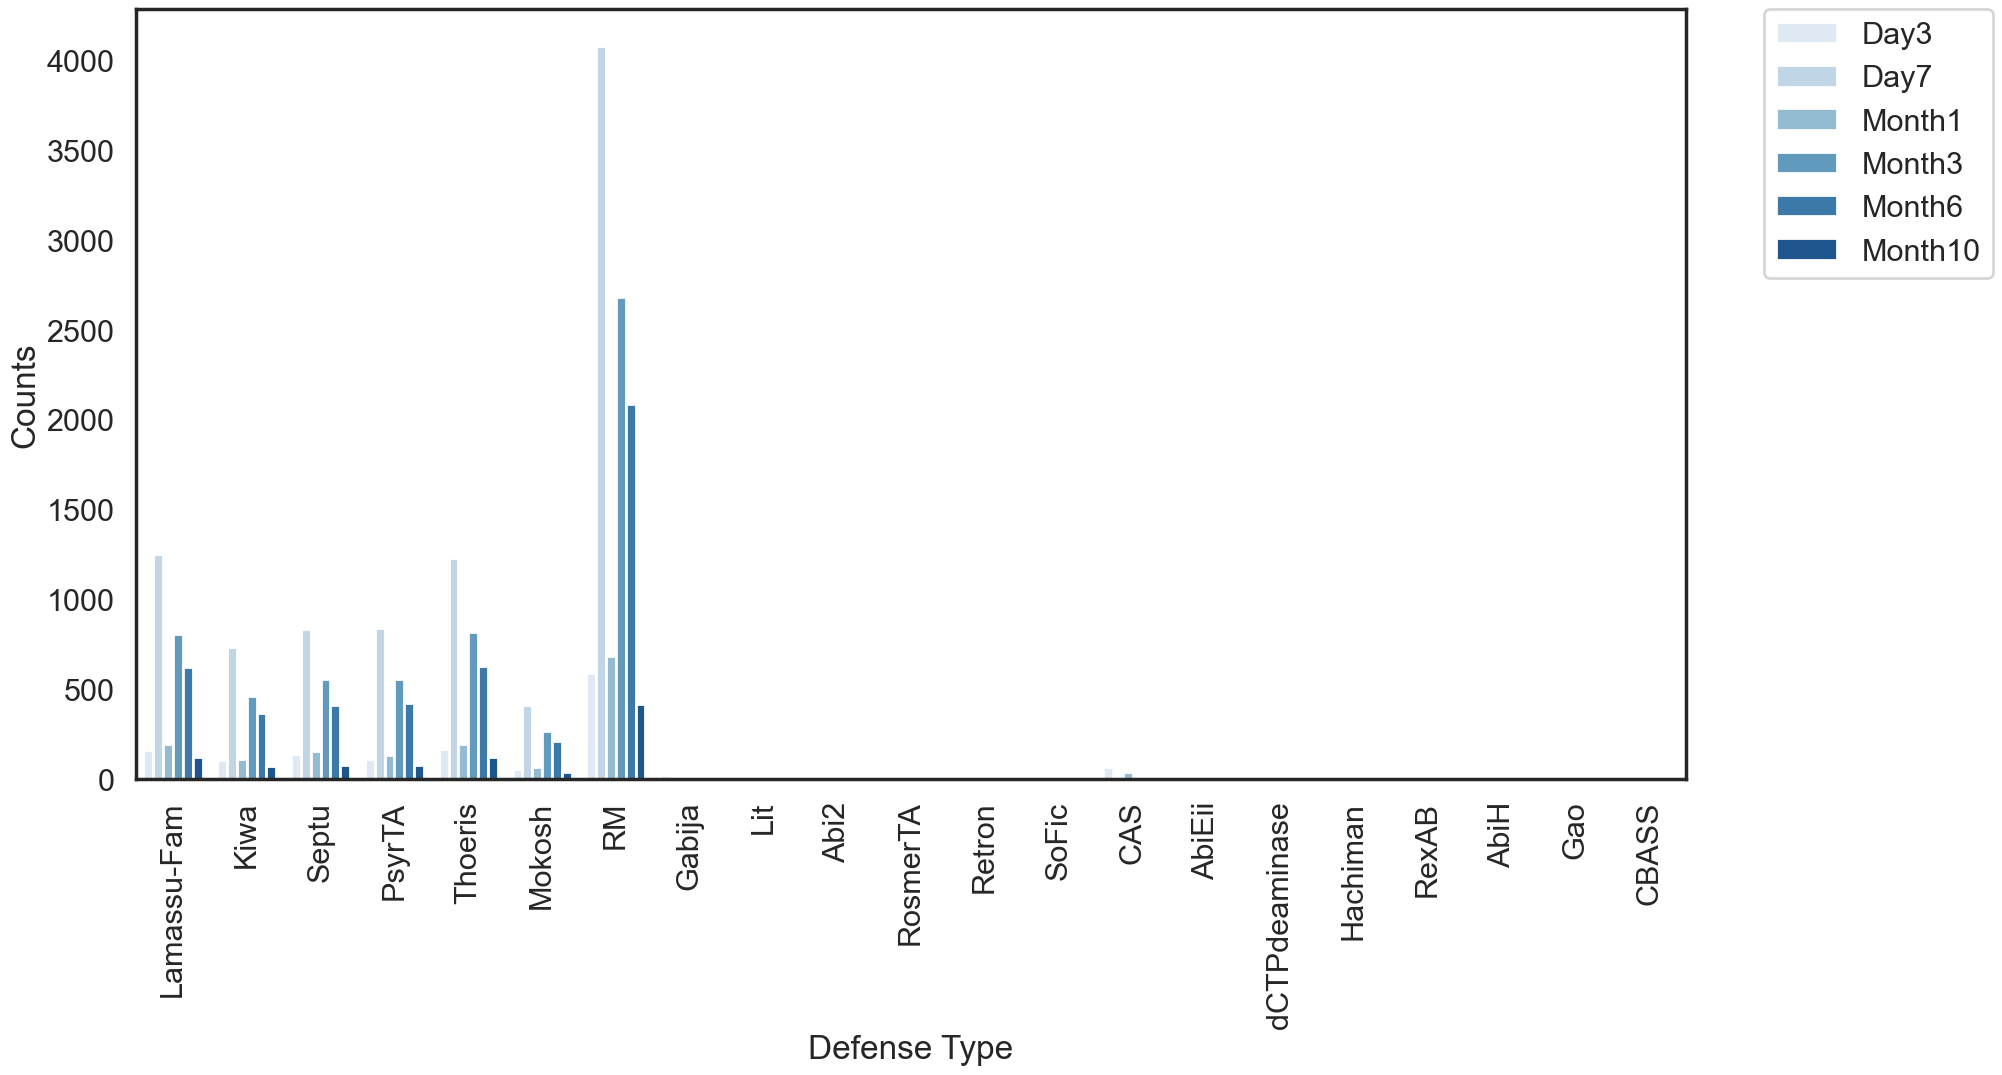

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ20_def_nm, x='type', hue='collection_timepoint', palette='Blues', 
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Defense Type', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_alldefensetypes.png', dpi=150, bbox_inches='tight')

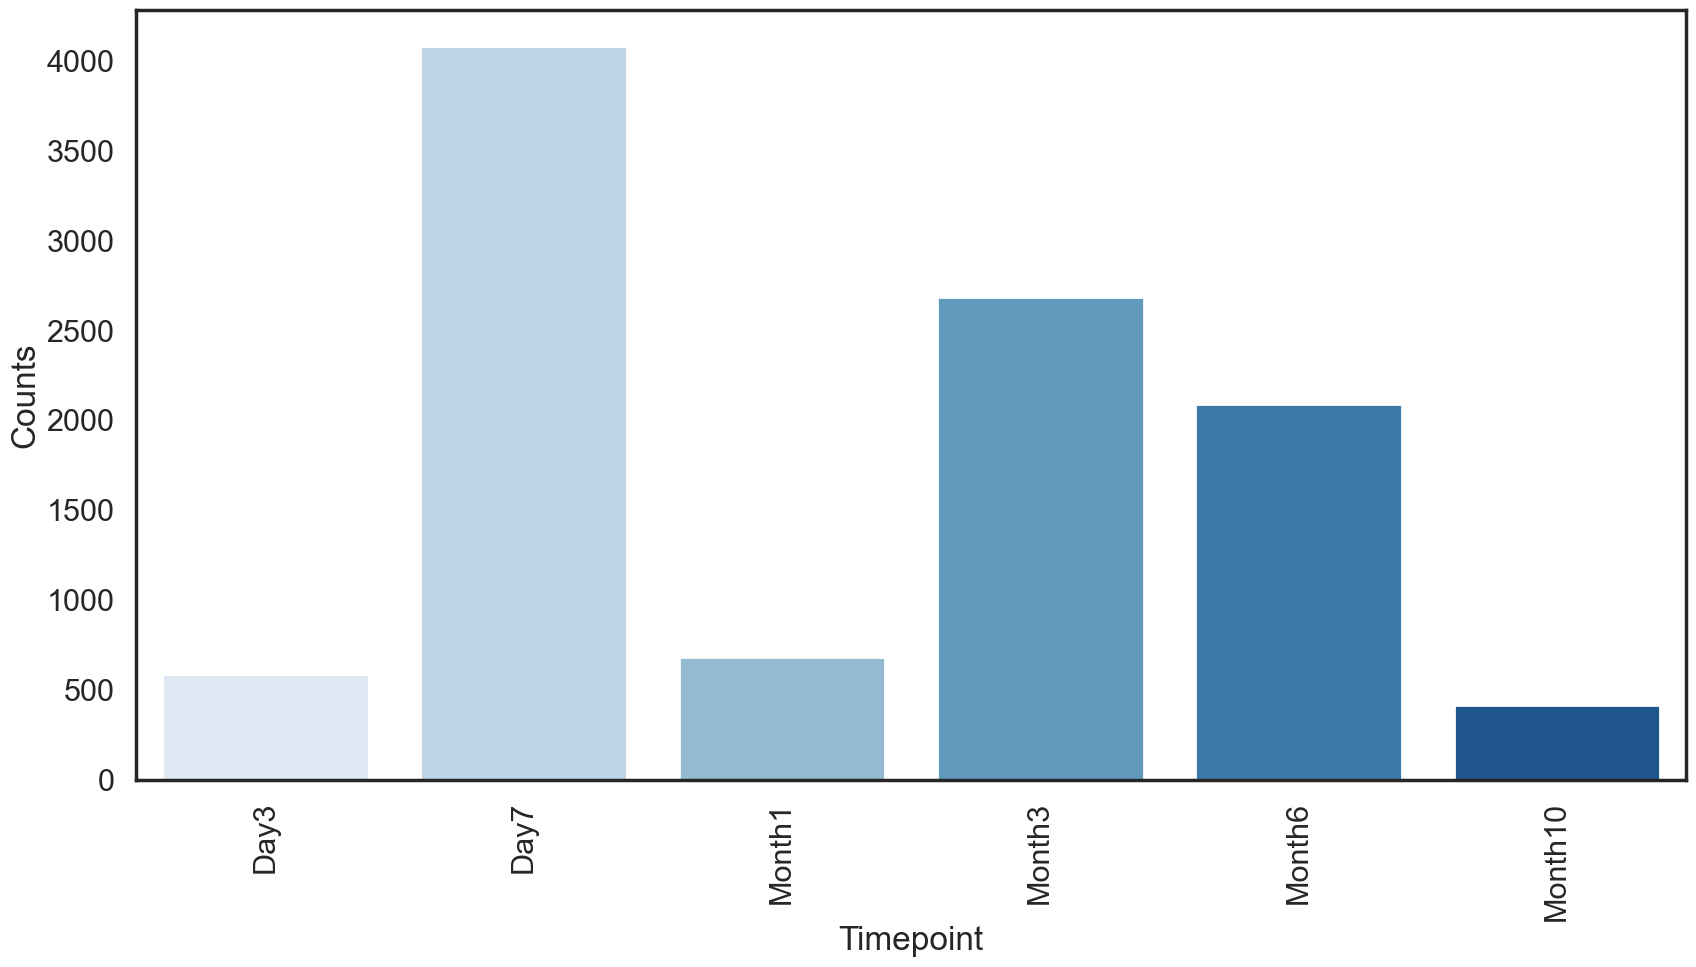

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ20_def_nm[AZ20_def_nm['type']=='RM'], x='collection_timepoint', palette='Blues', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_RMdefense.png', dpi=150, bbox_inches='tight')

In [82]:
AZ20_def_nm[AZ20_def_nm['type']=='Kiwa']

gene_name  type  qiita_sample_name  box_id  cage_id  \
sample-id                                                         
23B_Day7_12      KwaB  Kiwa  12986.23B.Day7.12    10.0     23.0   
23B_Day7_12      KwaA  Kiwa  12986.23B.Day7.12    10.0     23.0   
23B_Day7_13      KwaB  Kiwa  12986.23B.Day7.13    14.0     23.0   
23B_Day7_13      KwaA  Kiwa  12986.23B.Day7.13    14.0     23.0   
23B_Day7_14      KwaA  Kiwa  12986.23B.Day7.14    14.0     23.0   
...               ...   ...                ...     ...      ...   
30N_Day7_8       KwaA  Kiwa   12986.30N.Day7.8    13.0     30.0   
30N_Day7_9       KwaB  Kiwa   12986.30N.Day7.9    13.0     30.0   
30N_Day7_9       KwaA  Kiwa   12986.30N.Day7.9    13.0     30.0   
AZ20_ref         KwaA  Kiwa                NaN     NaN      NaN   
AZ20_ref         KwaB  Kiwa                NaN     NaN      NaN   

            collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_12                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_13                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_13                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
23B_Day7_14                 Day7        7/19/17 10:00   7/12/17 0:00   RC   
...                          ...                  ...            ...  ...   
30N_Day7_8                  Day7        7/19/17 10:00   7/12/17 0:00   RC   
30N_Day7_9                  Day7        7/19/17 10:00   7/12/17 0:00   RC   
30N_Day7_9                  Day7        7/19/17 10:00   7/12/17 0:00   RC   
AZ20_ref               reference                  NaN            NaN  NaN   
AZ20_ref               reference                  NaN            NaN  NaN   

             elevation  ...  dam sire date_collected bacteria_strain  \
sample-id               ...                                            
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_12      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_13      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_13      193.0  ...   A1    A        7/19/17            AZ20   
23B_Day7_14      193.0  ...   A1    A        7/19/17            AZ20   
...                ...  ...  ...  ...            ...             ...   
30N_Day7_8       193.0  ...   B2    B        7/19/17            AZ20   
30N_Day7_9       193.0  ...   B2    B        7/19/17            AZ20   
30N_Day7_9       193.0  ...   B2    B        7/19/17            AZ20   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   
AZ20_ref           NaN  ...  NaN  NaN            NaN             NaN   

            extraction_method     extraction_kit  run plate         index_x  \
sample-id                                                                     
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_12            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_12   
23B_Day7_13            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_13   
23B_Day7_13            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_13   
23B_Day7_14            filter  Qiagen UltraClean  1.0   NaN     23B_Day7_14   
...                       ...                ...  ...   ...             ...   
30N_Day7_8             filter  Qiagen UltraClean  1.0   NaN      30N_Day7_8   
30N_Day7_9             filter  Qiagen UltraClean  1.0   NaN      30N_Day7_9   
30N_Day7_9             filter  Qiagen UltraClean  1.0   NaN      30N_Day7_9   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   
AZ20_ref                  NaN                NaN  NaN   NaN  AZ20_reference   

             index_y  
sample-id             
23B_Day7_12      NaN  
23B_Day7_12      NaN  
23B_Day7_13      NaN  
23B_Day7_13      NaN  
23B_Day7_14      NaN  
...         

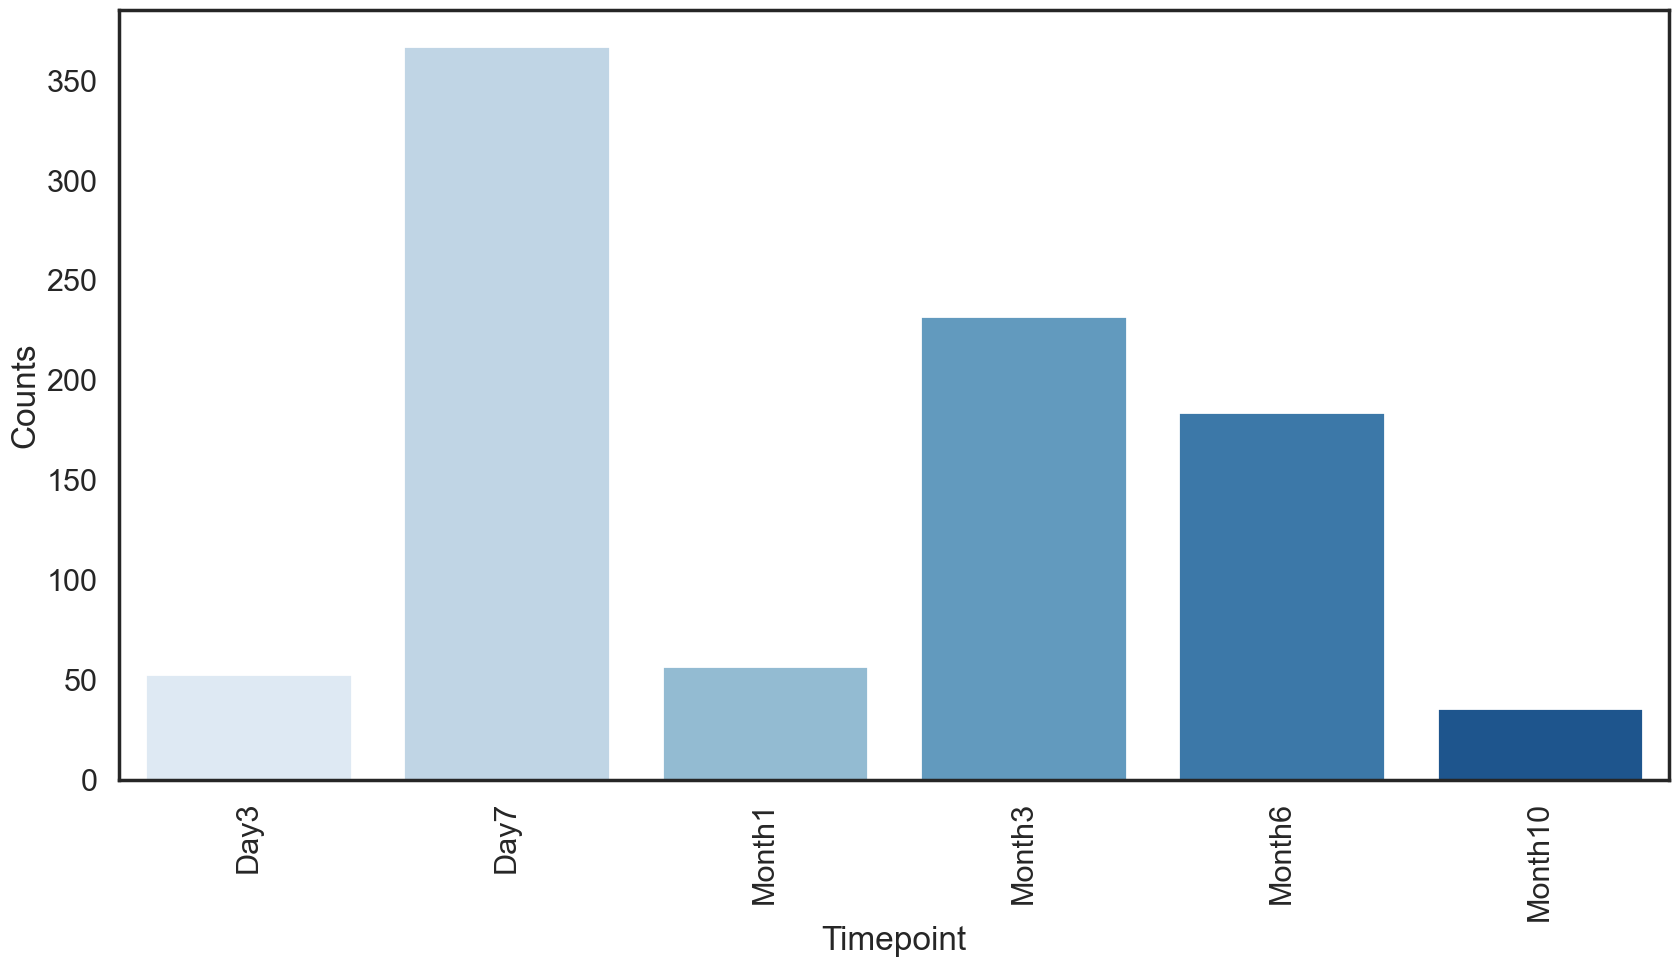

In [86]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ20_def_nm[AZ20_def_nm['gene_name']=='KwaA'], x='collection_timepoint', palette='Blues', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_KIWAdefense.png', dpi=150, bbox_inches='tight')

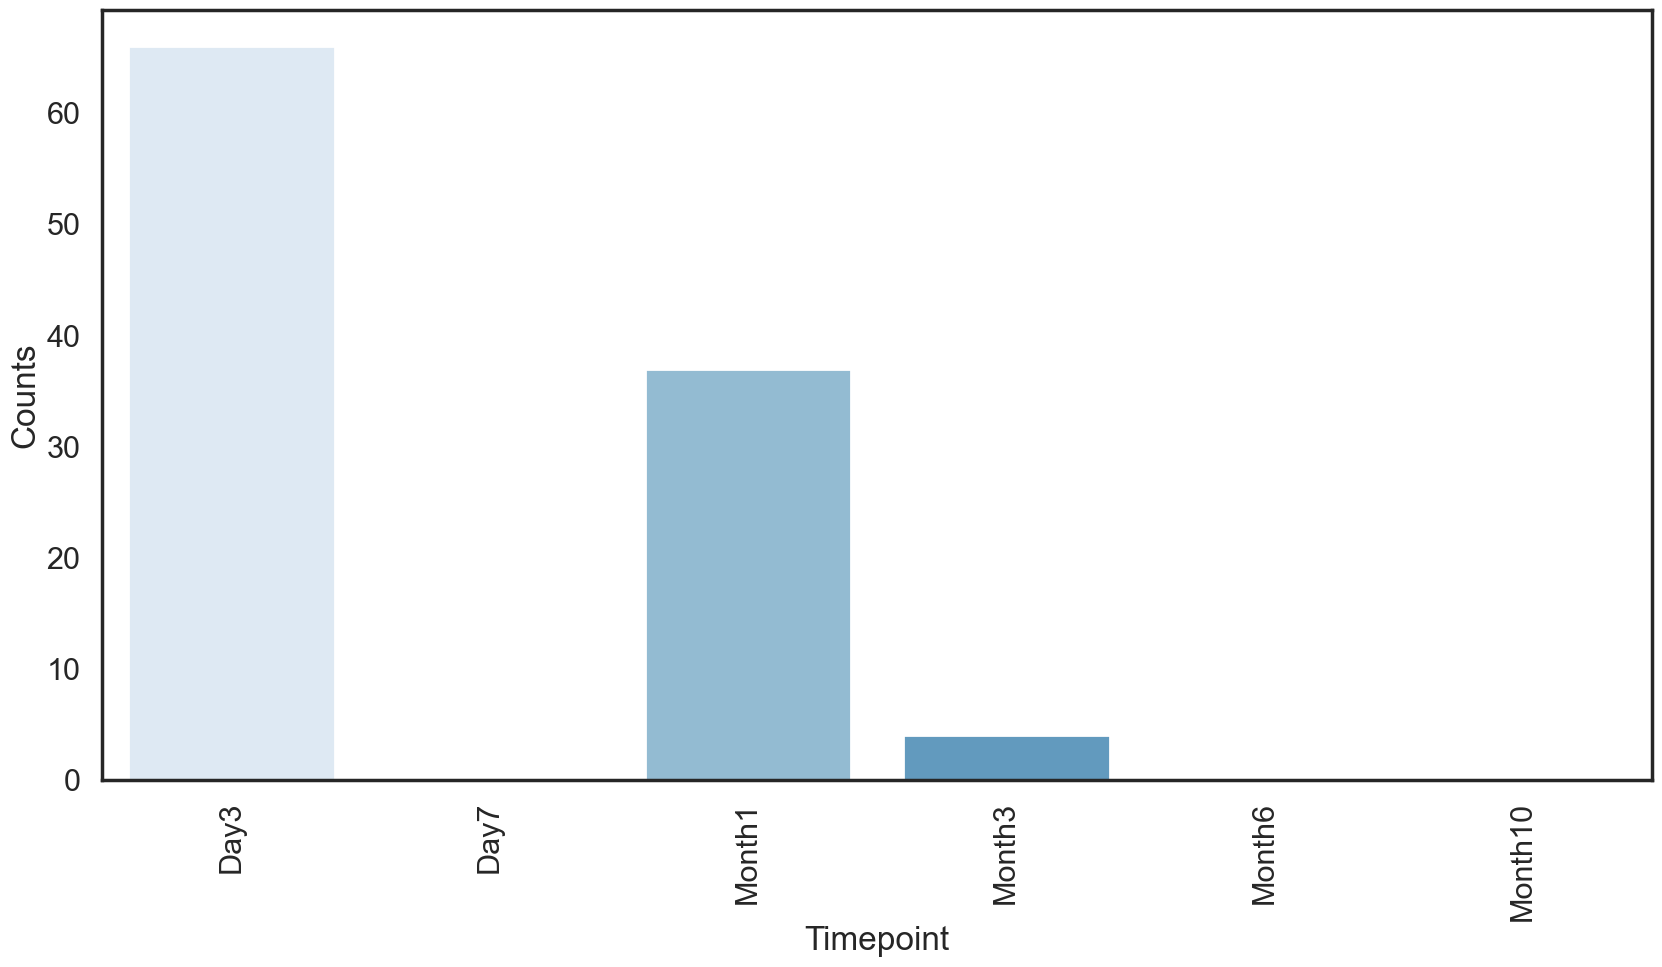

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ20_def_nm[AZ20_def_nm['type']=='CAS'], x='collection_timepoint', 
              palette='Blues', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_CAS_defense.png', dpi=150, bbox_inches='tight')

In [24]:
AZ20_def_nm[AZ20_def_nm['type']=='CAS'].mouse.unique()

array(['23LL', '25N'], dtype=object)

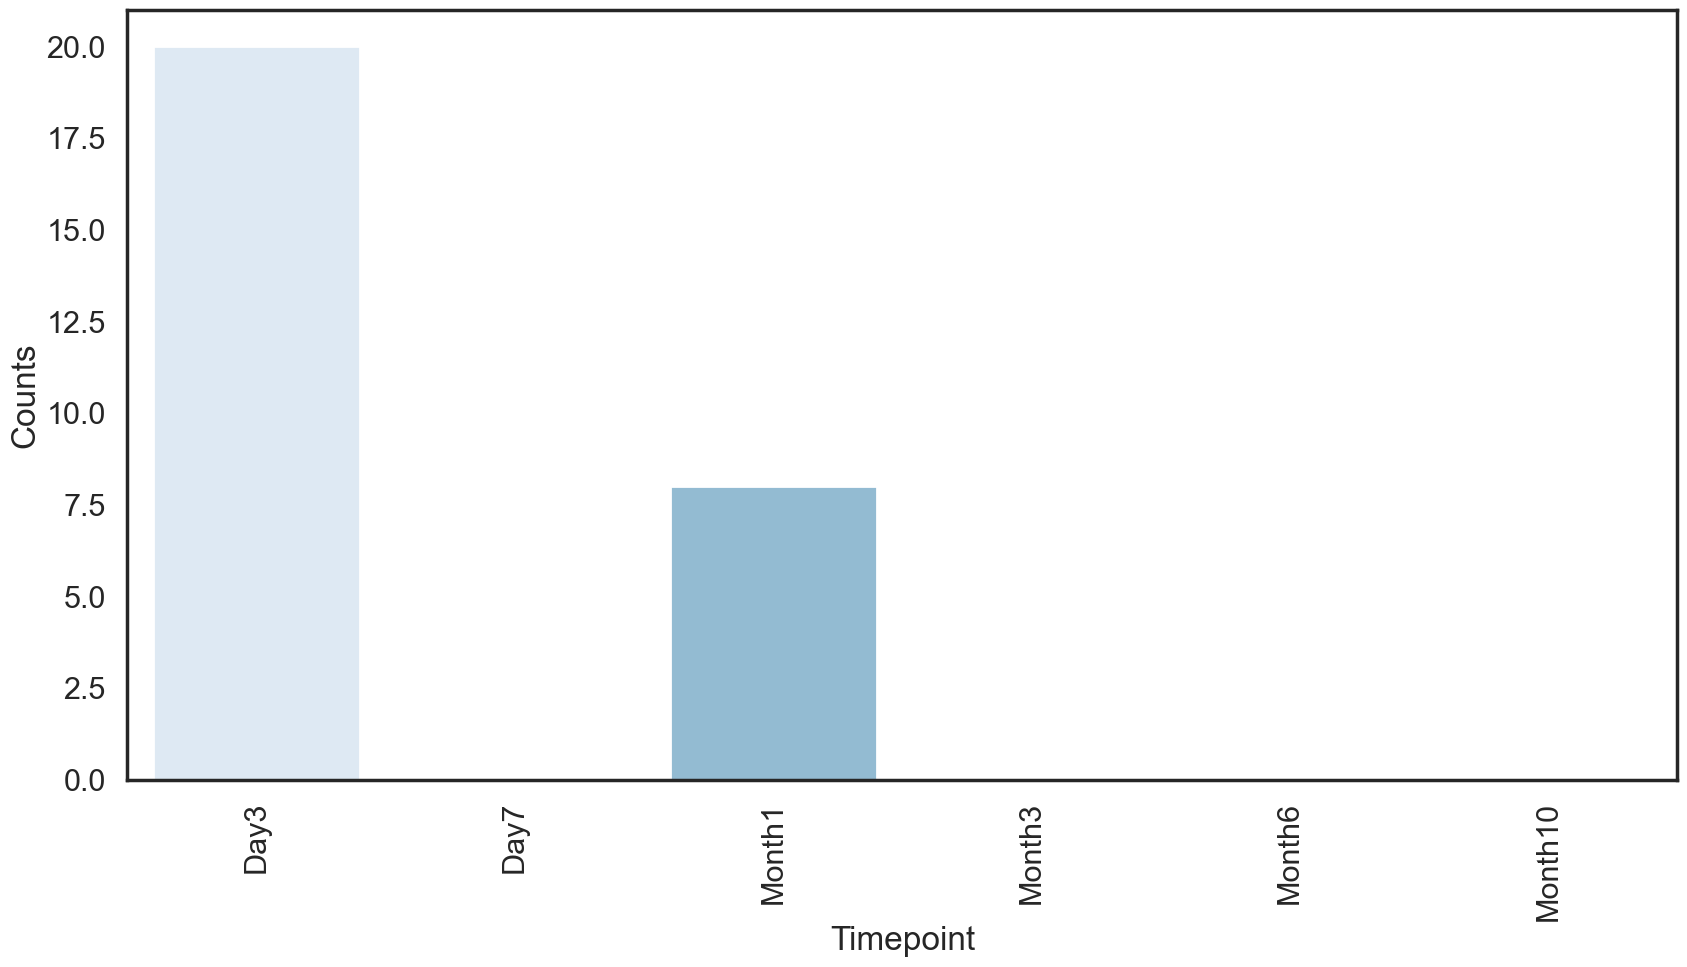

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ20_def_nm[AZ20_def_nm['type']=='Gabija'], x='collection_timepoint', 
              palette='Blues', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_Gabija_defense.png', dpi=150, bbox_inches='tight')

In [26]:
AZ20_def_nm[AZ20_def_nm['type']=='Gabija'].mouse.unique()

array(['23LL', '25N'], dtype=object)

In [27]:
from itertools import product
AZ20_tuples = product(AZ20_def_nm.collection_timepoint.unique(), AZ20_def_nm.mouse.unique())

In [28]:
timept = []
mus = []
isocount = []

for tmpt, mou in list(AZ20_tuples):
    mus.append(mou)
    timept.append(tmpt)
    tp = AZ20_def_nm[AZ20_def_nm.collection_timepoint == tmpt]
    mstp = tp[tp.mouse == mou]
    isocount.append(len(list(mstp.index.unique())))

In [29]:
AZ20_counts = pd.DataFrame()
AZ20_counts['timepoint'] = timept
AZ20_counts['mouse'] = mus
AZ20_counts['iso_count'] = isocount
AZ20_counts['tp_mouse'] = AZ20_counts['timepoint'].astype(str)+"_"+AZ20_counts['mouse'].astype(str)
AZ20_counts

timepoint mouse  iso_count       tp_mouse
0         Day7   23B         17       Day7_23B
1         Day7  23LL         18      Day7_23LL
2         Day7   23L         13       Day7_23L
3         Day7   23N         21       Day7_23N
4         Day7   23R         21       Day7_23R
..         ...   ...        ...            ...
198  reference   29L          0  reference_29L
199  reference   29N          0  reference_29N
200  reference   29R          0  reference_29R
201  reference   30N          0  reference_30N
202  reference   NaN          0  reference_nan

[203 rows x 4 columns]

In [30]:
AZ20maintypes = list(AZ20_def_nm.type.unique())
AZ20_prop = AZ20_def_nm[AZ20_def_nm.type.isin(AZ20maintypes)].copy()
AZ20_prop['gene_count'] = 1
AZ20_prop2 = AZ20_prop[['collection_timepoint', 'mouse', 'type', 'gene_count']]
AZ20_prop3 = AZ20_prop2.groupby(by=['collection_timepoint', 'mouse', 'type']).sum()
AZ20_prop4 = AZ20_prop3.reset_index()
AZ20_prop4['tp_mouse'] = AZ20_prop4['collection_timepoint'].astype(str)+"_"+AZ20_prop4['mouse'].astype(str)
AZ20_prop5 = pd.merge(AZ20_prop4, AZ20_counts[['tp_mouse', 'iso_count']], left_on='tp_mouse', right_on='tp_mouse')
AZ20_prop5.head()

collection_timepoint mouse    type  gene_count   tp_mouse  iso_count
0                 Day3  23LL    Abi2           3  Day3_23LL         14
1                 Day3  23LL  AbiEii           8  Day3_23LL         14
2                 Day3  23LL     CAS          36  Day3_23LL         14
3                 Day3  23LL  Gabija          10  Day3_23LL         14
4                 Day3  23LL    Kiwa          24  Day3_23LL         14

In [31]:
AZ20_ref_count = AZ20_defenses[AZ20_defenses['sample'] =='AZ20_ref'].copy()
AZ20_ref_count['gene_count'] = 1
AZ20_ref_count2 = AZ20_ref_count[['type', 'gene_count']].copy()
AZ20_ref_count3 = AZ20_ref_count2.groupby(by=['type']).sum()
AZ20_ref_count3['collection_timepoint'] = 'reference'
AZ20_ref_count3['tp_mouse'] = 'AZ20_ref'
AZ20_ref_count3['iso_count'] = 1
AZ20_ref_count3.sort_values(by=['gene_count'])

gene_count collection_timepoint  tp_mouse  iso_count
type                                                             
Mokosh                1            reference  AZ20_ref          1
Kiwa                  2            reference  AZ20_ref          1
PsyrTA                2            reference  AZ20_ref          1
Septu                 2            reference  AZ20_ref          1
Lamassu-Fam           3            reference  AZ20_ref          1
Thoeris               3            reference  AZ20_ref          1
RM                   10            reference  AZ20_ref          1

In [32]:
AZ20_aveperiso = pd.concat([AZ20_prop5, AZ20_ref_count3.reset_index()])
AZ20_aveperiso

collection_timepoint mouse     type  gene_count   tp_mouse  iso_count
0                  Day3  23LL     Abi2           3  Day3_23LL         14
1                  Day3  23LL   AbiEii           8  Day3_23LL         14
2                  Day3  23LL      CAS          36  Day3_23LL         14
3                  Day3  23LL   Gabija          10  Day3_23LL         14
4                  Day3  23LL     Kiwa          24  Day3_23LL         14
..                  ...   ...      ...         ...        ...        ...
2             reference   NaN   Mokosh           1   AZ20_ref          1
3             reference   NaN   PsyrTA           2   AZ20_ref          1
4             reference   NaN       RM          10   AZ20_ref          1
5             reference   NaN    Septu           2   AZ20_ref          1
6             reference   NaN  Thoeris           3   AZ20_ref          1

[536 rows x 6 columns]

In [33]:
AZ20_aveperiso['avg_genes_per_iso'] = AZ20_aveperiso['gene_count']/AZ20_aveperiso['iso_count']
AZ20_aveperiso.head()

collection_timepoint mouse    type  gene_count   tp_mouse  iso_count  \
0                 Day3  23LL    Abi2           3  Day3_23LL         14   
1                 Day3  23LL  AbiEii           8  Day3_23LL         14   
2                 Day3  23LL     CAS          36  Day3_23LL         14   
3                 Day3  23LL  Gabija          10  Day3_23LL         14   
4                 Day3  23LL    Kiwa          24  Day3_23LL         14   

   avg_genes_per_iso  
0           0.214286  
1           0.571429  
2           2.571429  
3           0.714286  
4           1.714286

In [34]:
AZ20_aveperiso.sort_values(by=['avg_genes_per_iso'], inplace=True)
AZ20_aveperiso.set_index('tp_mouse', inplace=True)

In [35]:
AZ20_aveperiso.type.unique()

array(['AbiH', 'Abi2', 'Lit', 'SoFic', 'dCTPdeaminase', 'RosmerTA',
       'Hachiman', 'RexAB', 'Retron', 'CAS', 'AbiEii', 'Gabija', 'Mokosh',
       'Septu', 'PsyrTA', 'Kiwa', 'Gao', 'CBASS', 'Lamassu-Fam',
       'Thoeris', 'RM'], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


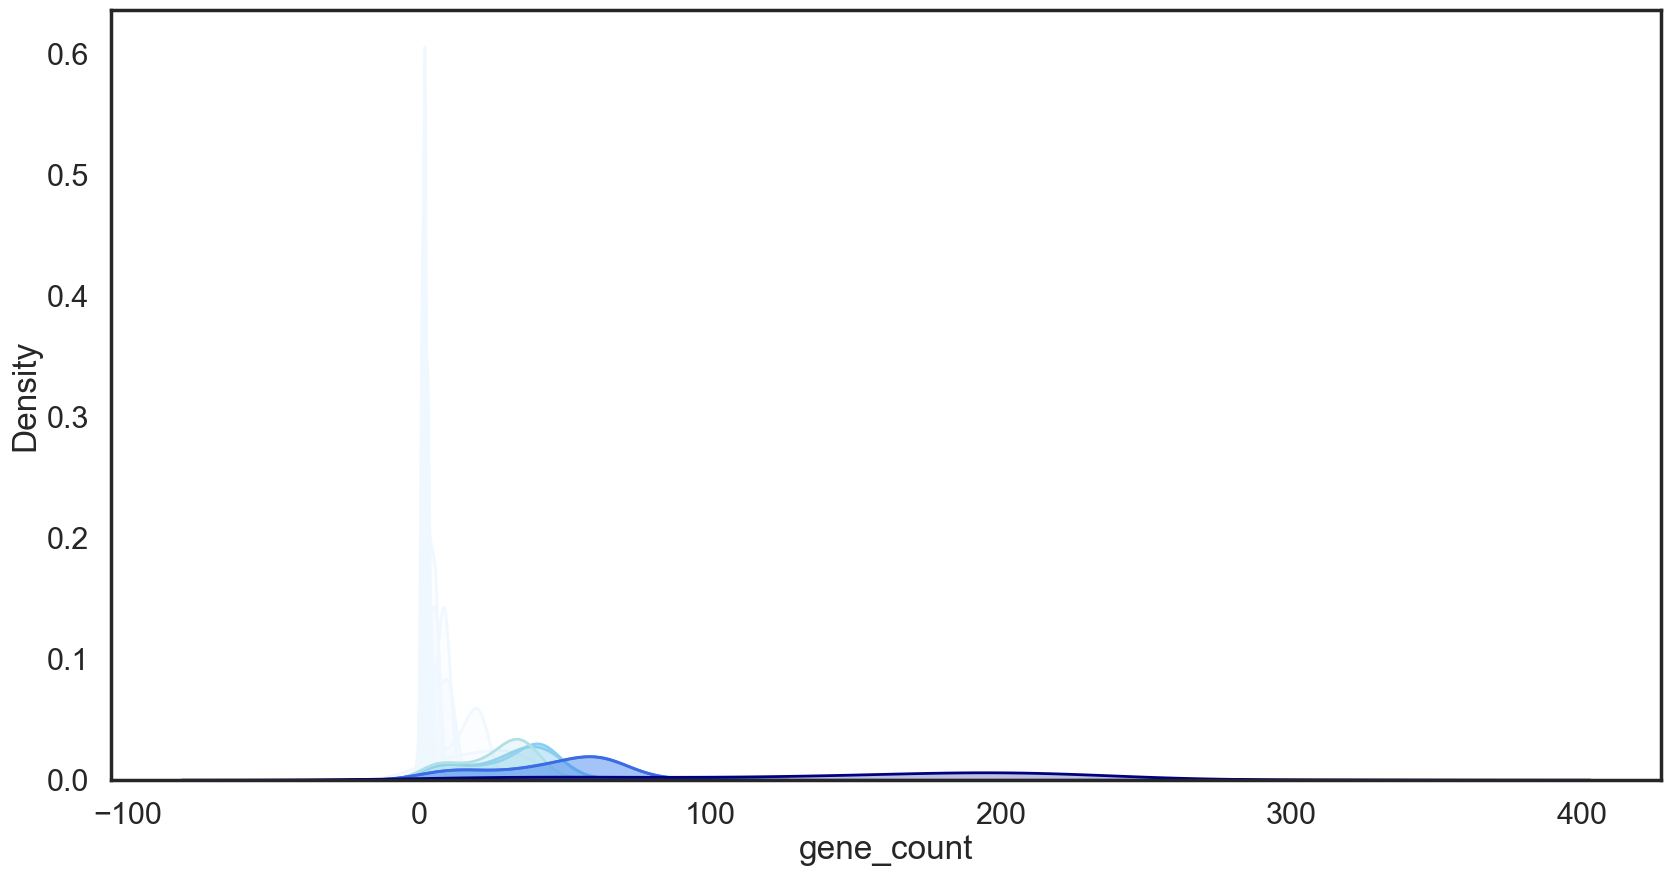

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

color_list = ['aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue',
              'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue',
              'lightskyblue', 'skyblue', 'powderblue',
              'deepskyblue', 'blue', 'dodgerblue', 'royalblue', 'navy']

for typ, clor in list(zip(AZ20_aveperiso.type.unique(),color_list)):
    g = sns.kdeplot(data=AZ20_aveperiso[AZ20_aveperiso['type'] == typ], x='gene_count', 
                color=clor, shade=True)
plt.show()

In [38]:
list(zip(AZ20_aveperiso.type.unique(),color_list))

[('AbiH', 'aliceblue'),
 ('Abi2', 'aliceblue'),
 ('Lit', 'aliceblue'),
 ('SoFic', 'aliceblue'),
 ('dCTPdeaminase', 'aliceblue'),
 ('RosmerTA', 'aliceblue'),
 ('Hachiman', 'aliceblue'),
 ('RexAB', 'aliceblue'),
 ('Retron', 'aliceblue'),
 ('CAS', 'aliceblue'),
 ('AbiEii', 'aliceblue'),
 ('Gabija', 'aliceblue'),
 ('Mokosh', 'aliceblue'),
 ('Septu', 'lightskyblue'),
 ('PsyrTA', 'skyblue'),
 ('Kiwa', 'powderblue'),
 ('Gao', 'deepskyblue'),
 ('CBASS', 'blue'),
 ('Lamassu-Fam', 'dodgerblue'),
 ('Thoeris', 'royalblue'),
 ('RM', 'navy')]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


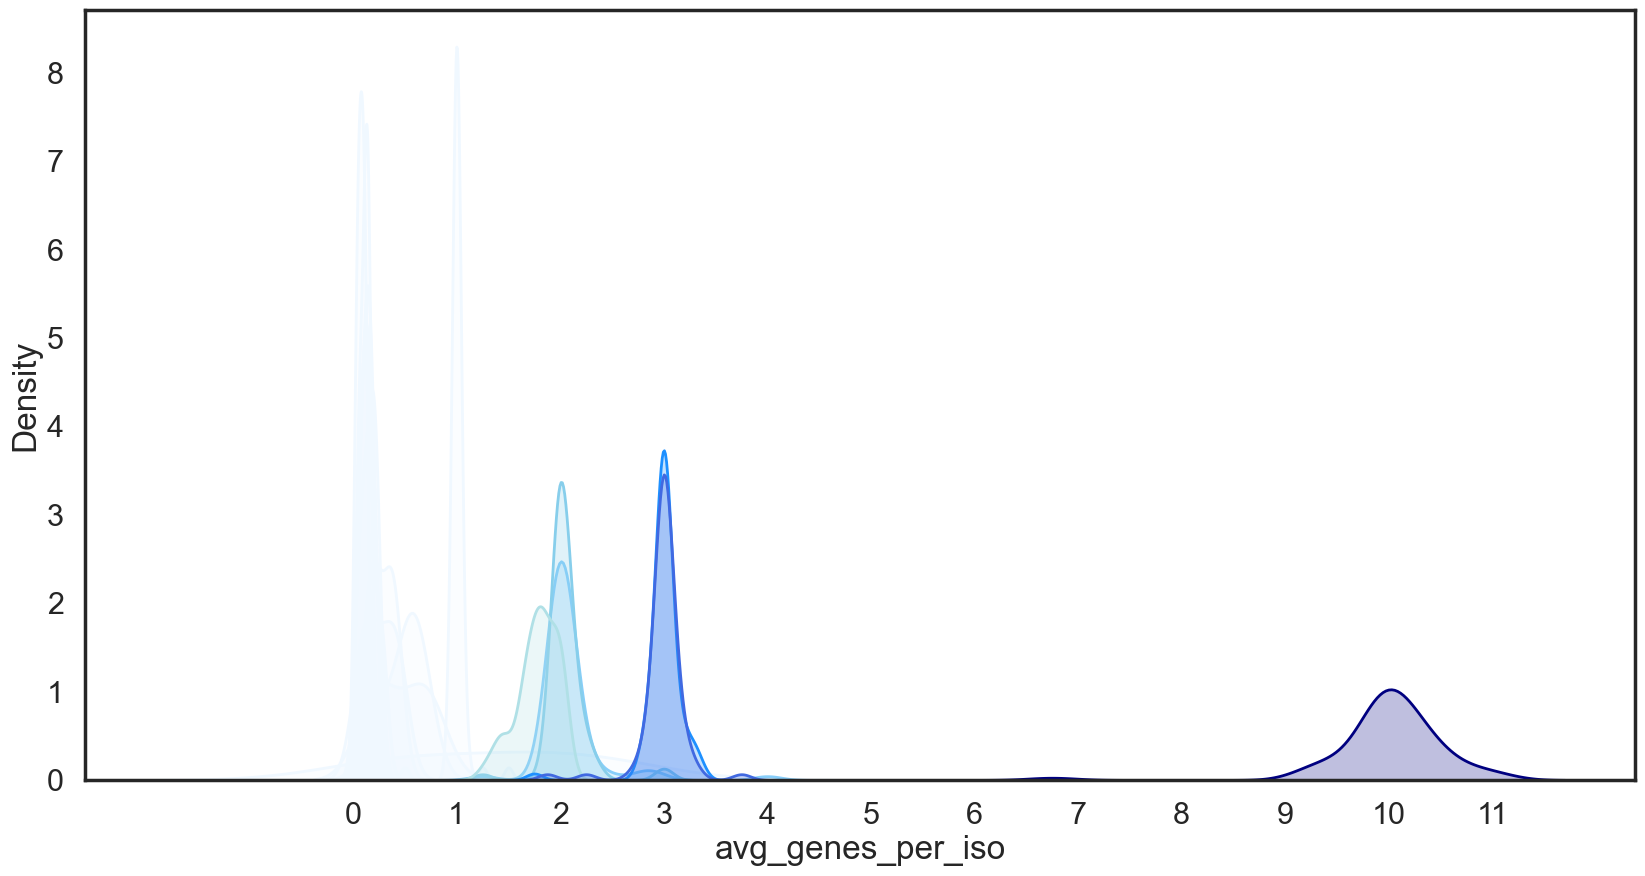

In [87]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')
color_list = color_list = ['aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue',
              'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue', 'aliceblue',
              'lightskyblue', 'skyblue', 'powderblue',
              'deepskyblue', 'blue', 'dodgerblue', 'royalblue', 'navy']
for typ, clor in list(zip(AZ20_aveperiso.type.unique(),color_list)):
    g = sns.kdeplot(data=AZ20_aveperiso[AZ20_aveperiso['type'] == typ], x='avg_genes_per_iso', 
                color=clor, shade=True)
    plt.xticks(np.arange(0, 12, 1))
plt.show()

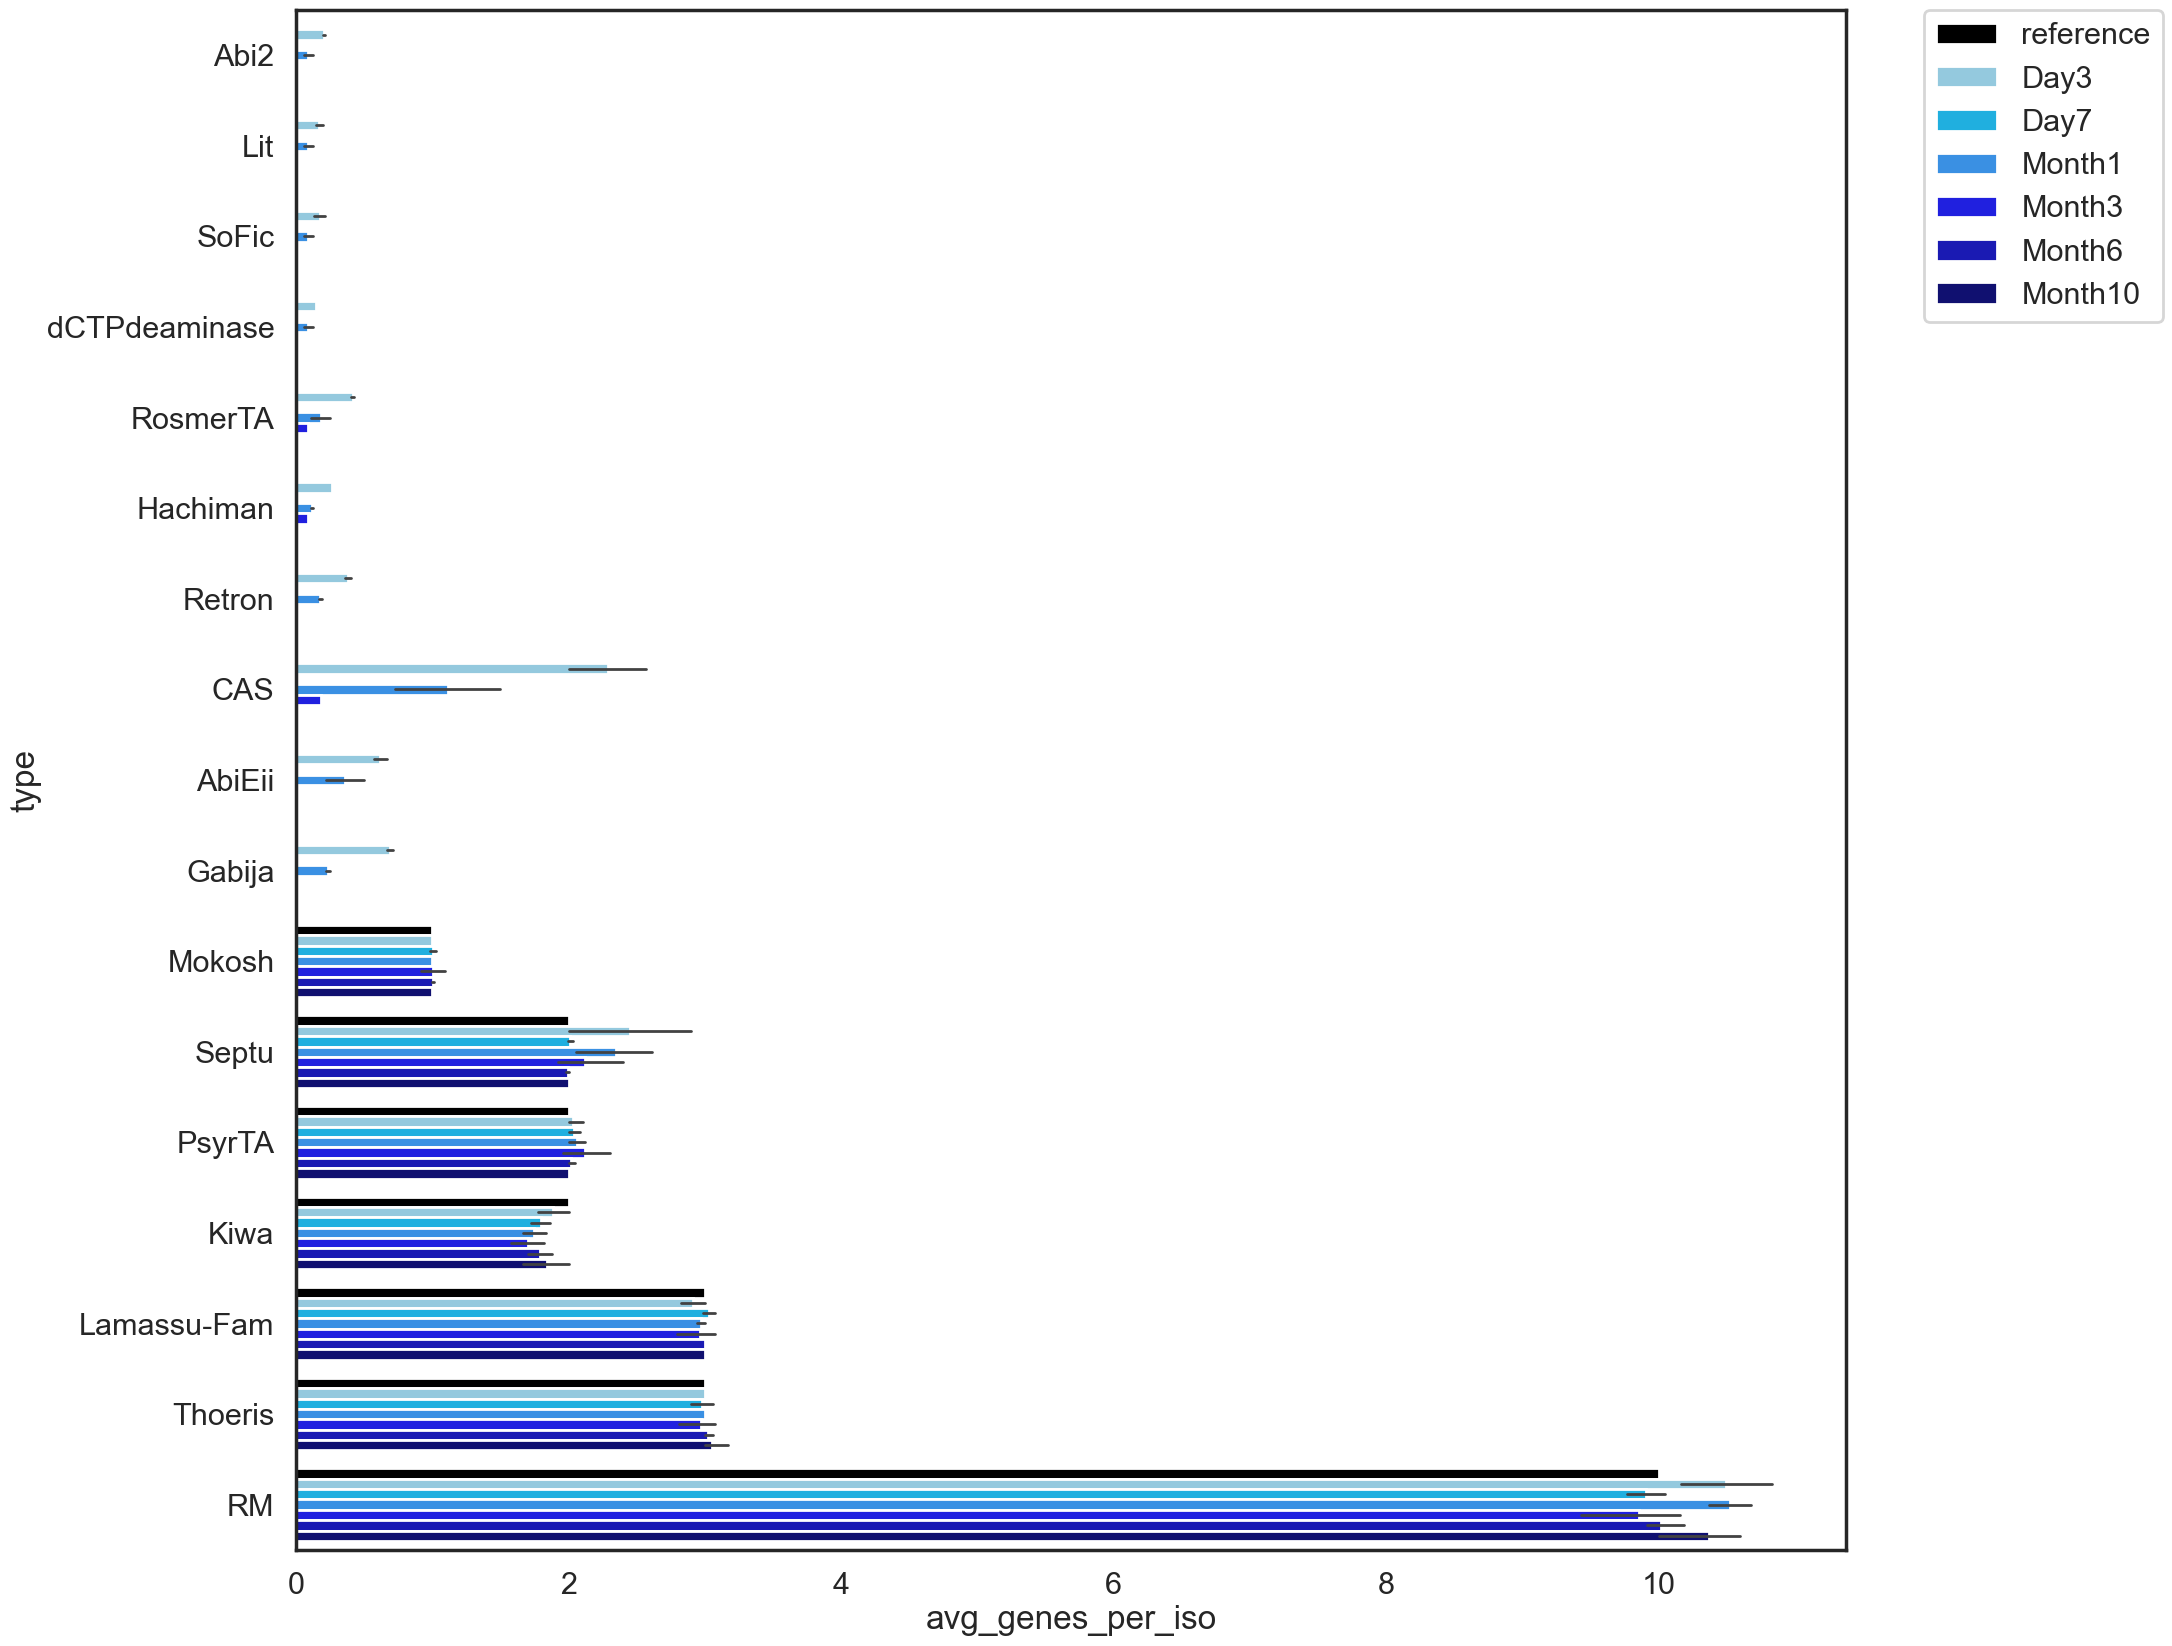

In [40]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')
sns.set_context('poster')
AZ20_aveperiso2 = AZ20_aveperiso[~AZ20_aveperiso['type'].isin(['Gao', 'CBASS', 'RexAB', 'AbiH'])] #only 1 tp
sns.barplot(data=AZ20_aveperiso2, x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=['black', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'mediumblue', 'navy'], 
             hue_order=['reference', 'Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('AZ20_alltypes_alltp_periso.svg', dpi=150, bbox_inches='tight')

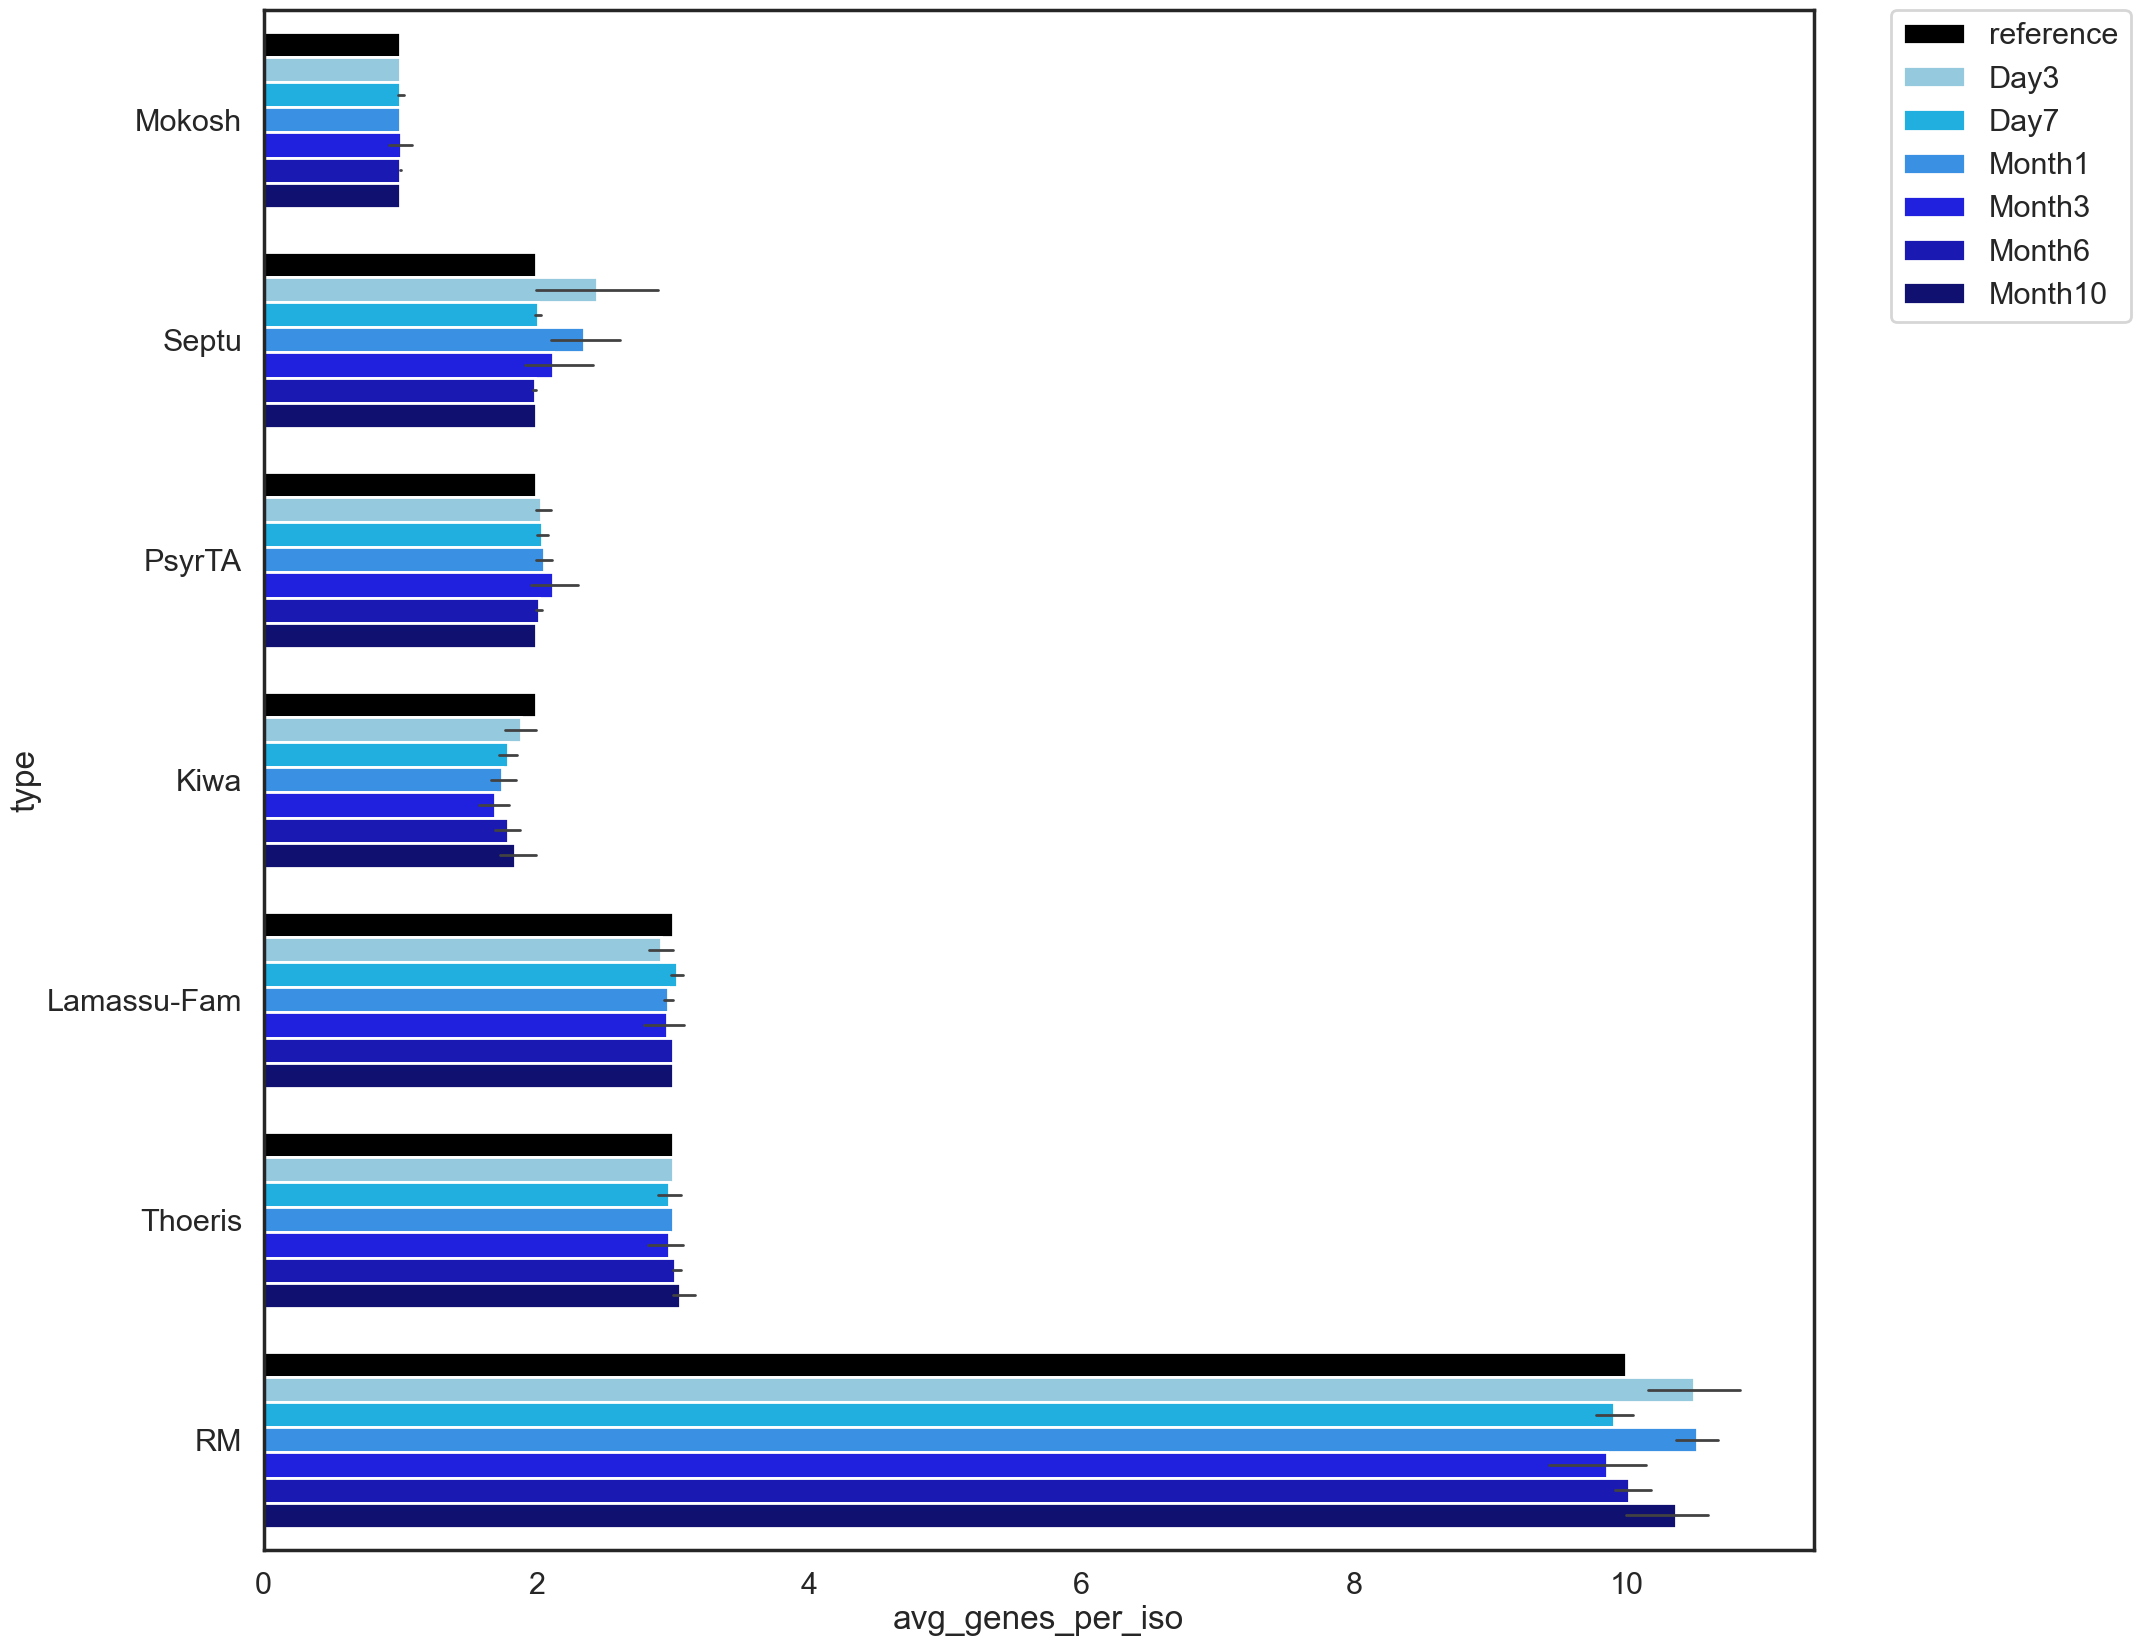

In [41]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')
sns.set_context('poster')
AZ20_aveperiso2 = AZ20_aveperiso[AZ20_aveperiso['type'].isin(['Mokosh', 'Septu', 'PsyrTA', 'Kiwa', 
                                                              'Lamassu-Fam', 'Thoeris', 'RM'])]
sns.barplot(data=AZ20_aveperiso2, x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=['black', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'mediumblue', 'navy'], 
             hue_order=['reference', 'Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('AZ20_alltypes_alltp_periso_major.svg', dpi=150, bbox_inches='tight')

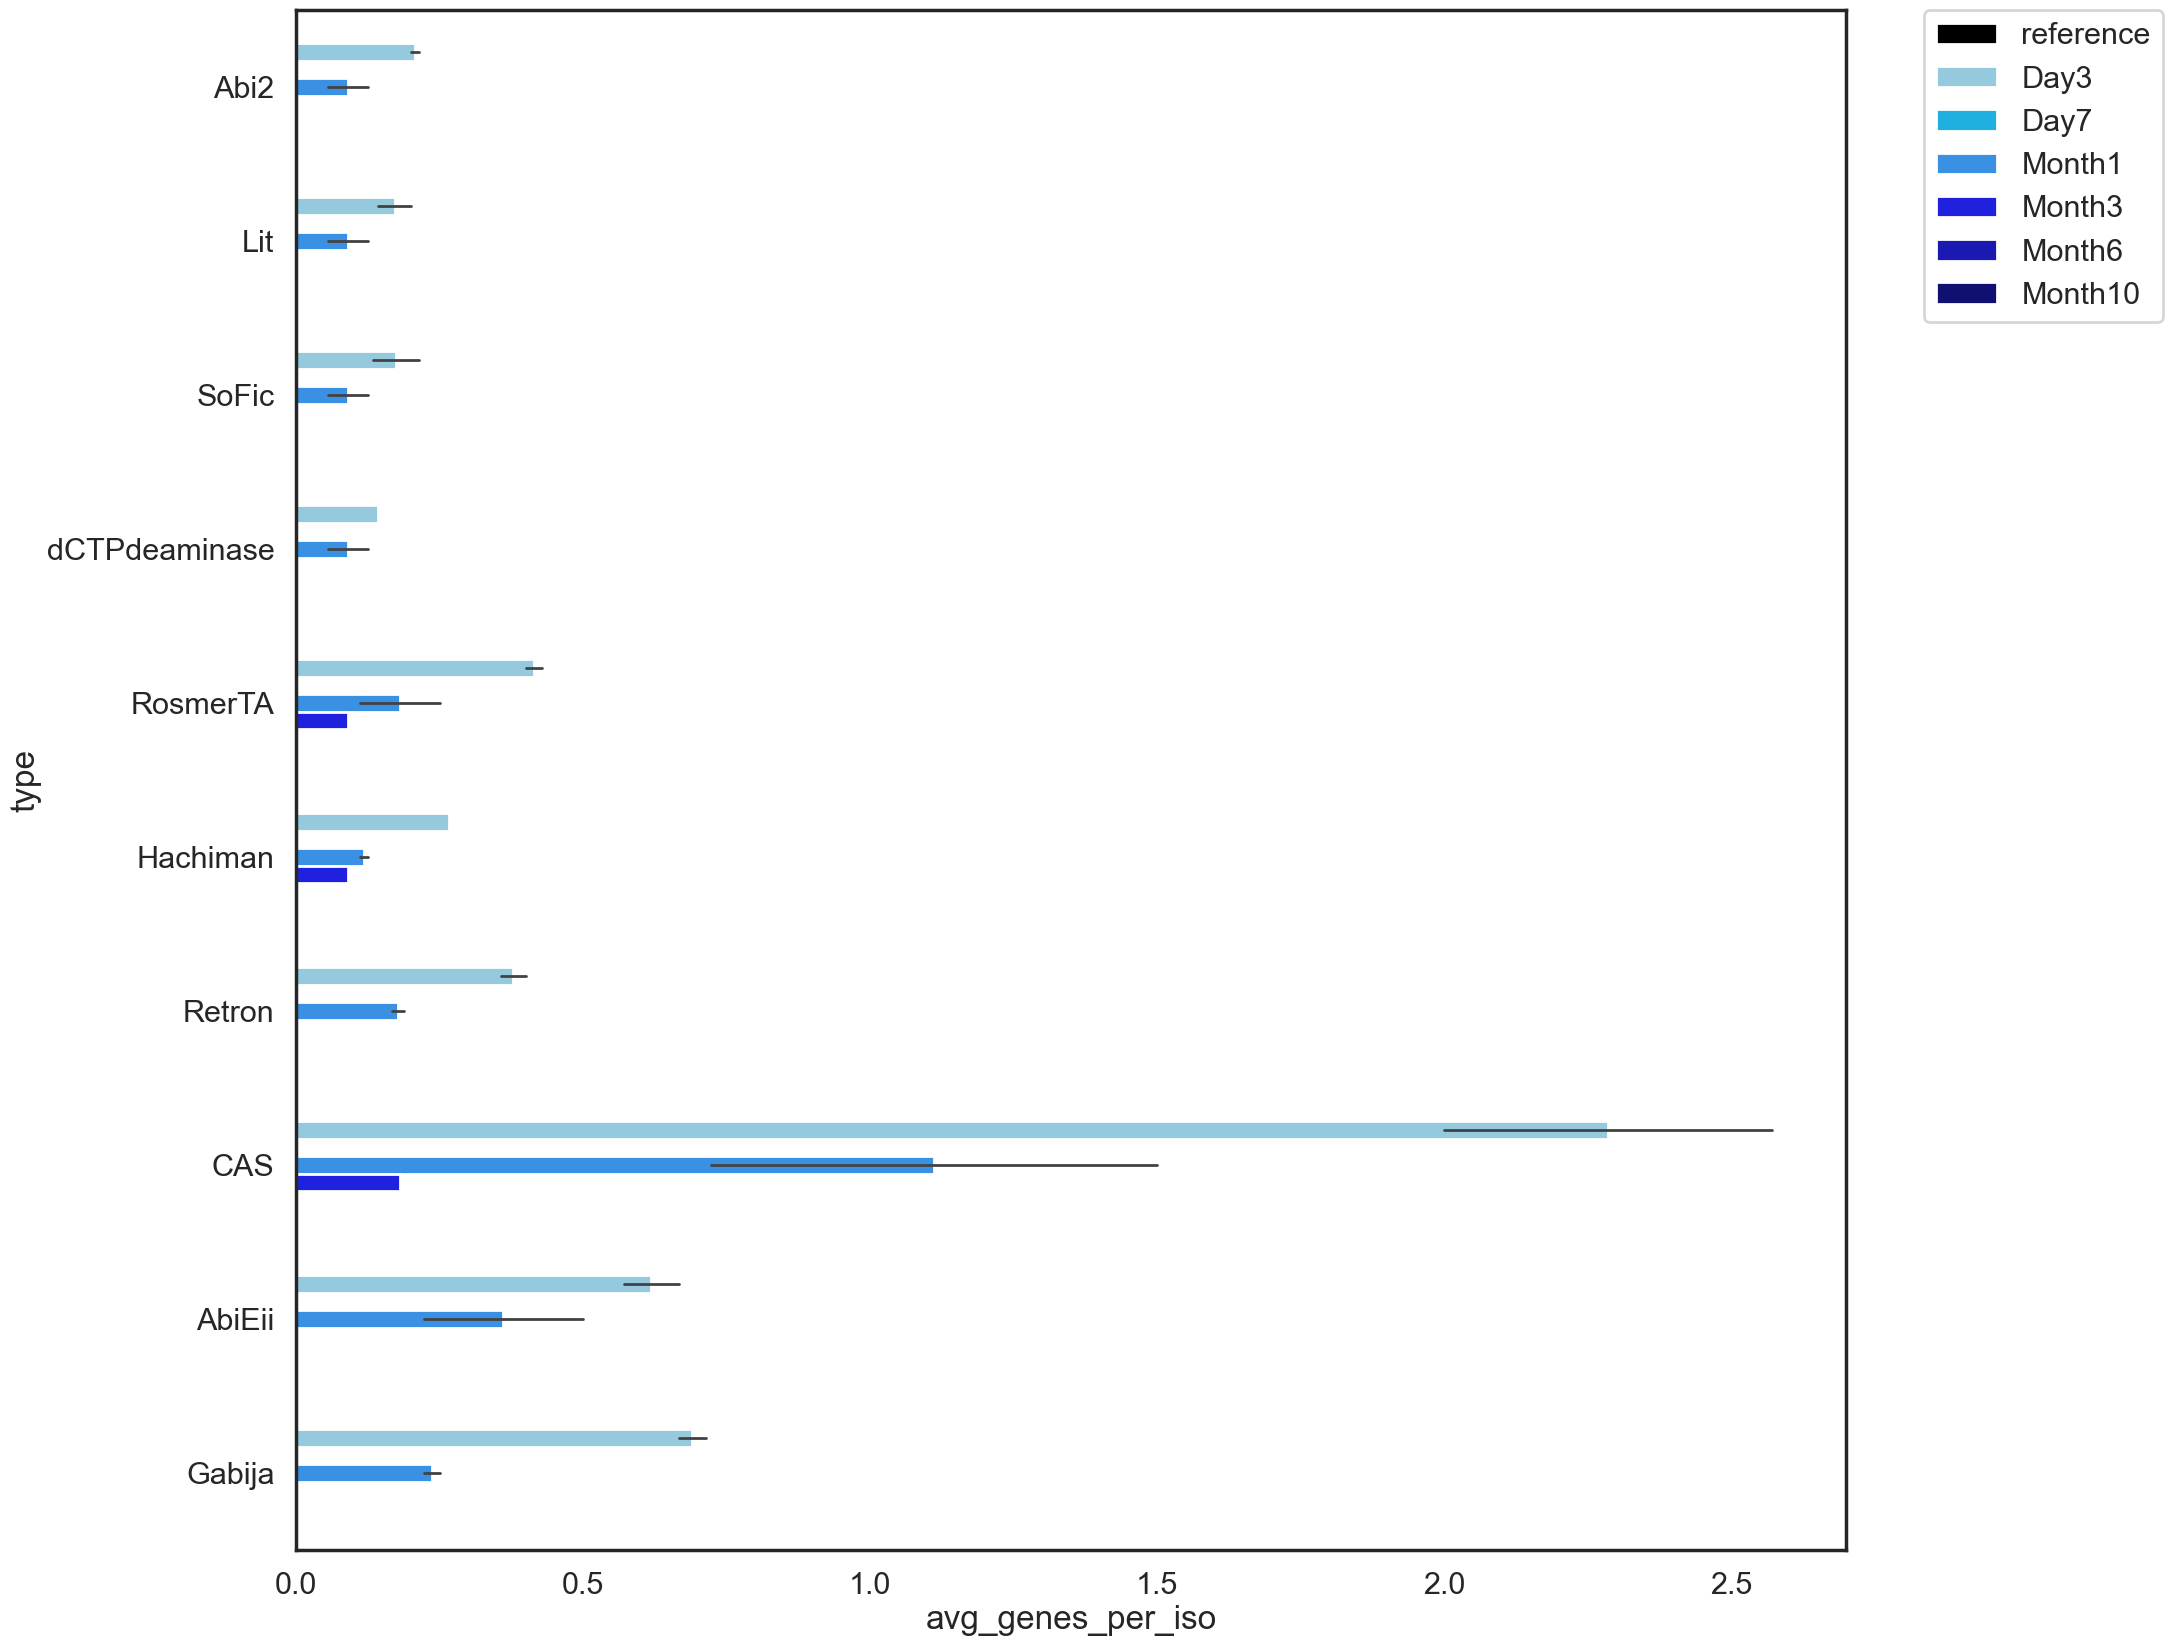

In [42]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')
sns.set_context('poster')
AZ20_aveperiso2 = AZ20_aveperiso[AZ20_aveperiso['type'].isin(['Abi2', 'Lit', 'SoFic', 'dCTPdeaminase', 
                                                              'RosmerTA', 'Hachiman', 'Retron', 'CAS', 
                                                              'AbiEii', 'Gabija'])]
sns.barplot(data=AZ20_aveperiso2, x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=['black', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'mediumblue', 'navy'], 
             hue_order=['reference', 'Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('AZ20_alltypes_alltp_periso_minor.svg', dpi=150, bbox_inches='tight')

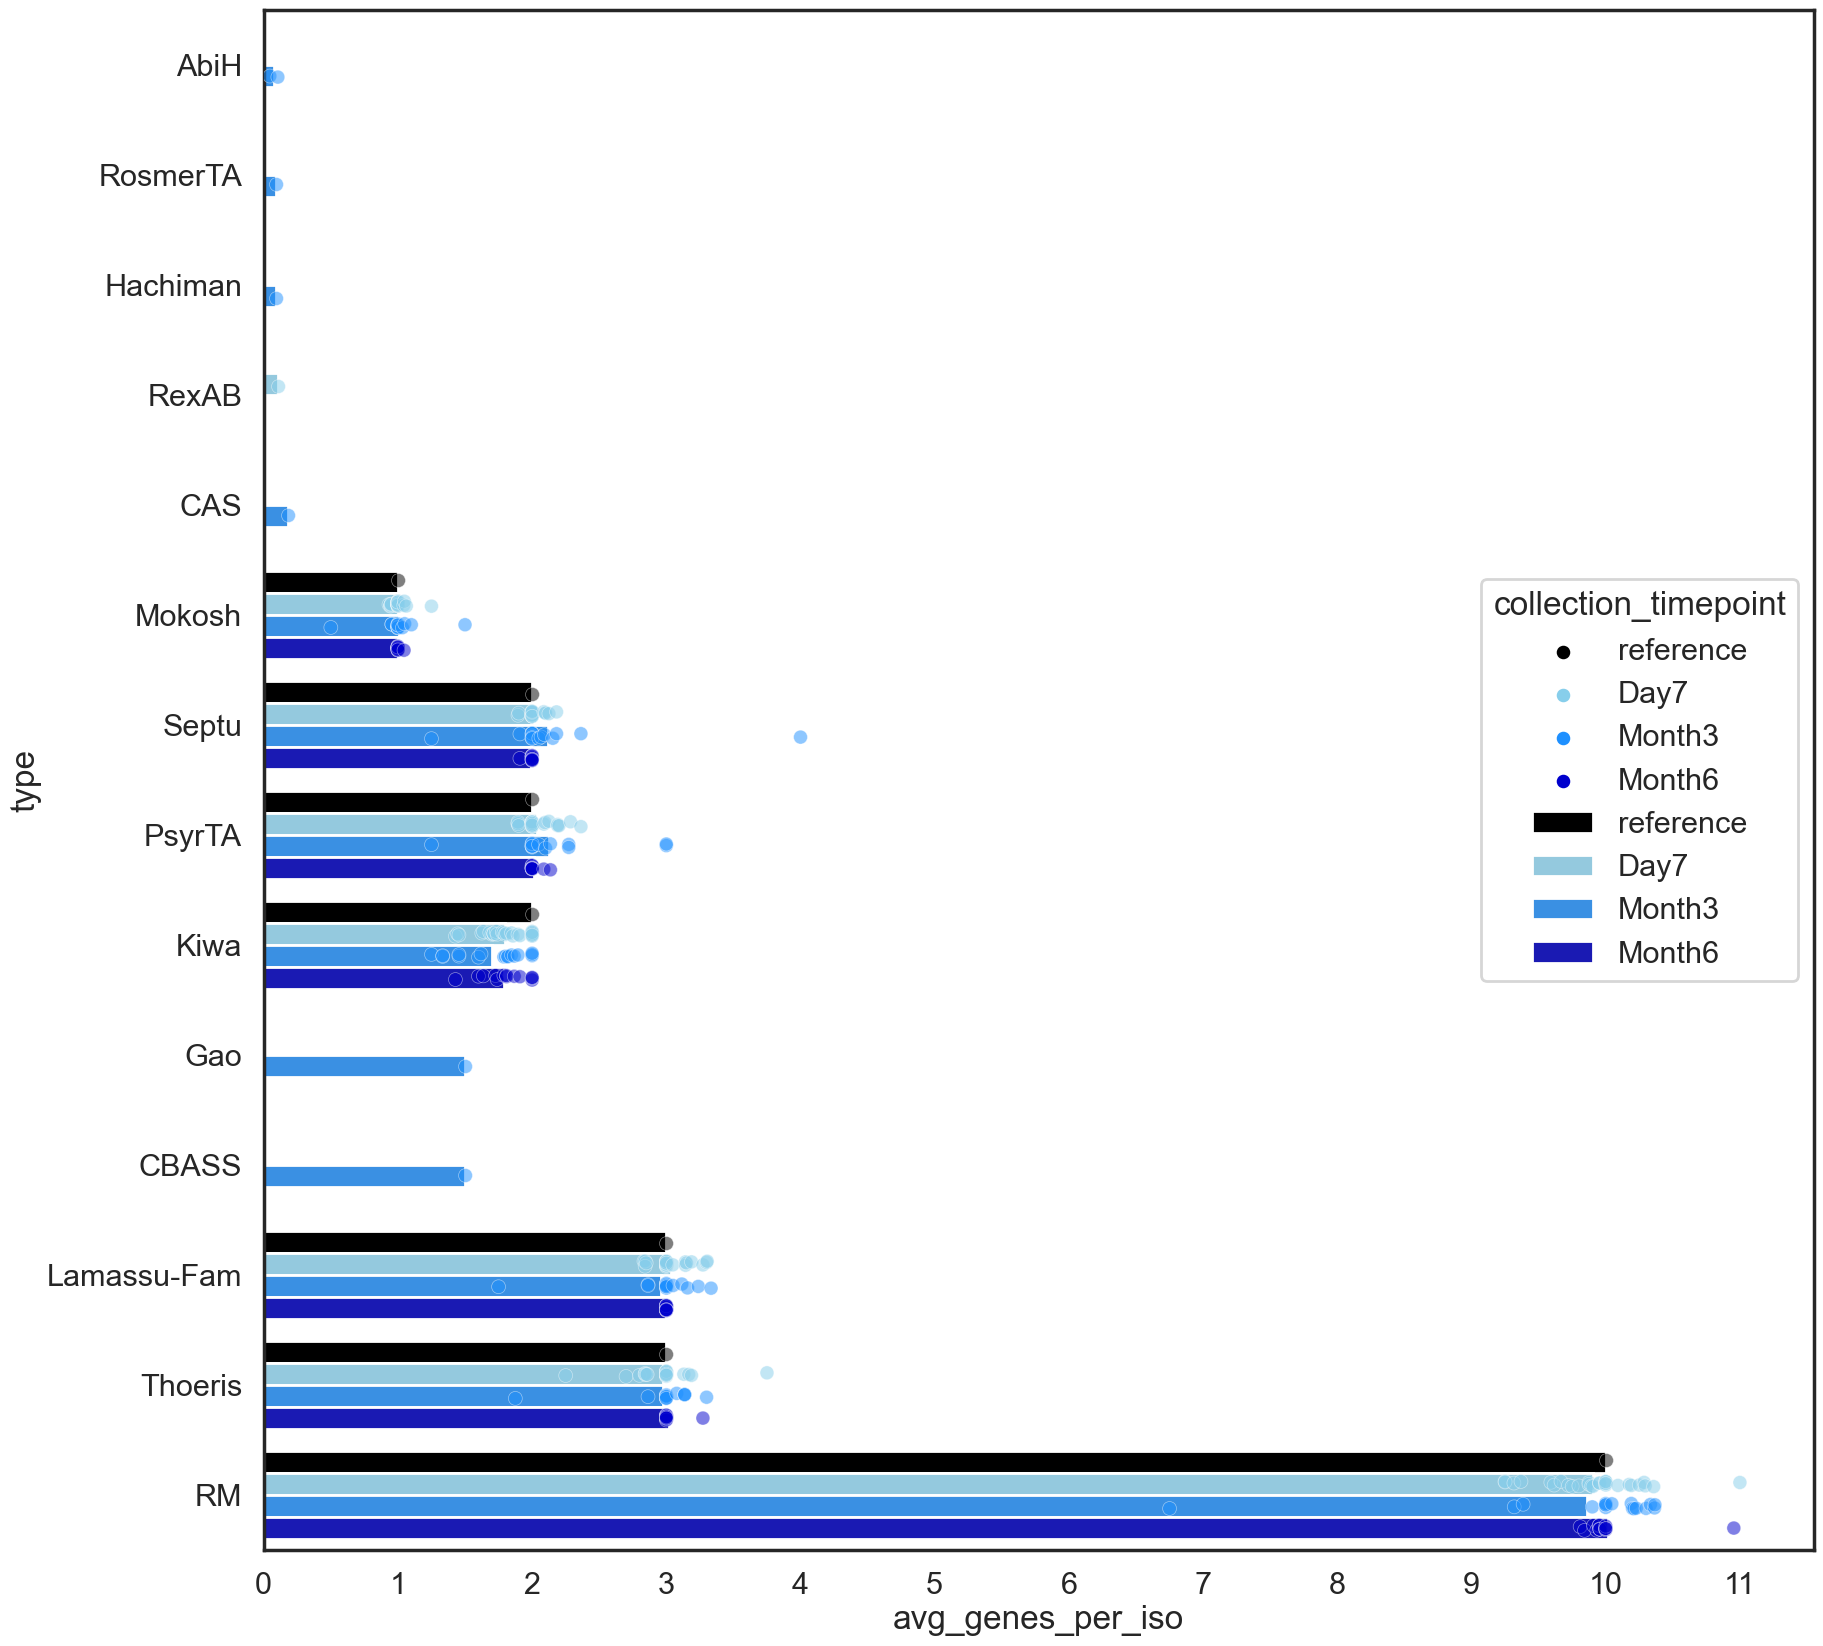

In [43]:
AZ20_prop6 = AZ20_aveperiso[AZ20_aveperiso.collection_timepoint.isin(['reference','Day7', 'Month3', 'Month6'])]
sns.barplot(data=AZ20_prop6.sort_values(by=['avg_genes_per_iso']), 
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=['black', 'skyblue', 'dodgerblue', 'mediumblue'], ci=None,
             hue_order=[ 'reference','Day7', 'Month3', 'Month6'])
sns.stripplot(data=AZ20_prop6.sort_values(by=['avg_genes_per_iso']), 
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', alpha=0.5,
              palette=['black', 'skyblue', 'dodgerblue', 'mediumblue'], dodge=True,
             hue_order=[ 'reference', 'Day7', 'Month3', 'Month6'], size=10, edgecolor='w', linewidth=0.5)
plt.xticks(np.arange(0, 12, 1))
plt.savefig('AZ20_alltypes_3tp_periso.svg', dpi=150, bbox_inches='tight')

In [44]:
AZ20_aveperiso[AZ20_aveperiso['type']=='RM']

collection_timepoint mouse type  gene_count  iso_count  \
tp_mouse                                                             
Month3_28LL               Month3  28LL   RM          54          8   
Day7_28LL                   Day7  28LL   RM          37          4   
Day7_25L                    Day7   25L   RM         185         20   
Day7_24B                    Day7   24B   RM         177         19   
Month3_26B                Month3   26B   RM         205         22   
...                          ...   ...  ...         ...        ...   
Day3_23LL                   Day3  23LL   RM         149         14   
Month1_23LL               Month1  23LL   RM         193         18   
Month6_26B                Month6   26B   RM         241         22   
Day7_29L                    Day7   29L   RM         110         10   
Day3_25N                    Day3   25N   RM         165         15   

             avg_genes_per_iso  
tp_mouse                        
Month3_28LL           6.750000  
Day7_28LL             9.250000  
Day7_25L              9.250000  
Day7_24B              9.315789  
Month3_26B            9.318182  
...                        ...  
Day3_23LL            10.642857  
Month1_23LL          10.722222  
Month6_26B           10.954545  
Day7_29L             11.000000  
Day3_25N             11.000000  

[70 rows x 6 columns]

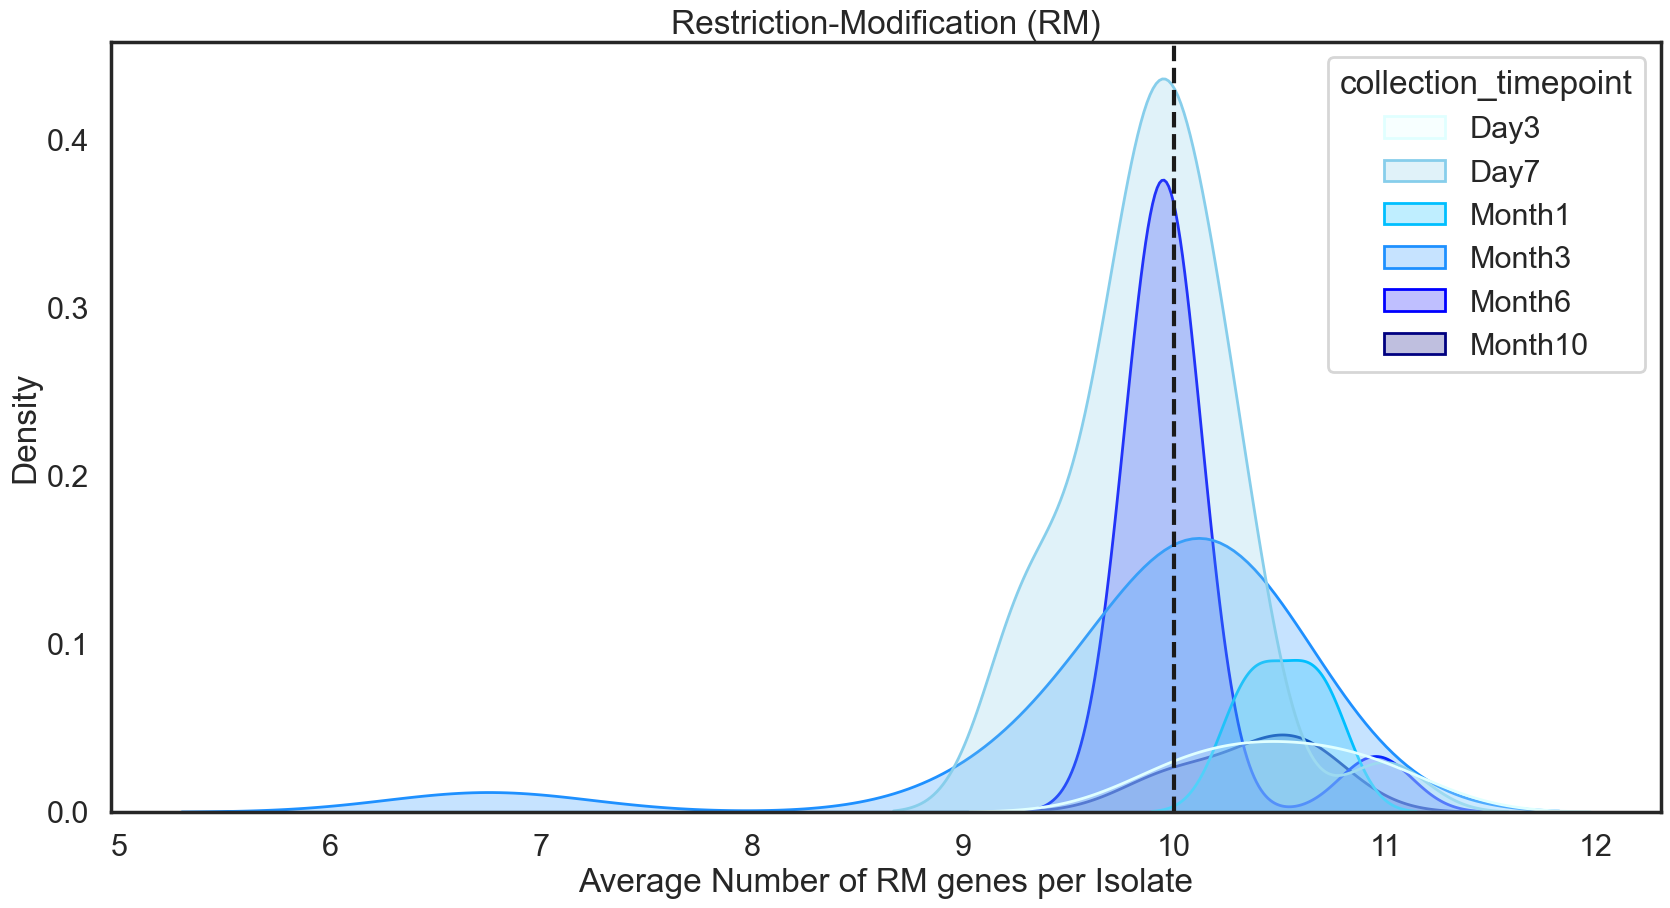

In [45]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ20_aveperiso[AZ20_aveperiso['type']=='RM'], x='avg_genes_per_iso', 
            hue='collection_timepoint', 
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'], 
            shade=True,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(10, c="k", ls='--')
plt.title('Restriction-Modification (RM)')
plt.xlabel('Average Number of RM genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_RMdefense2.png', dpi=150, bbox_inches='tight')

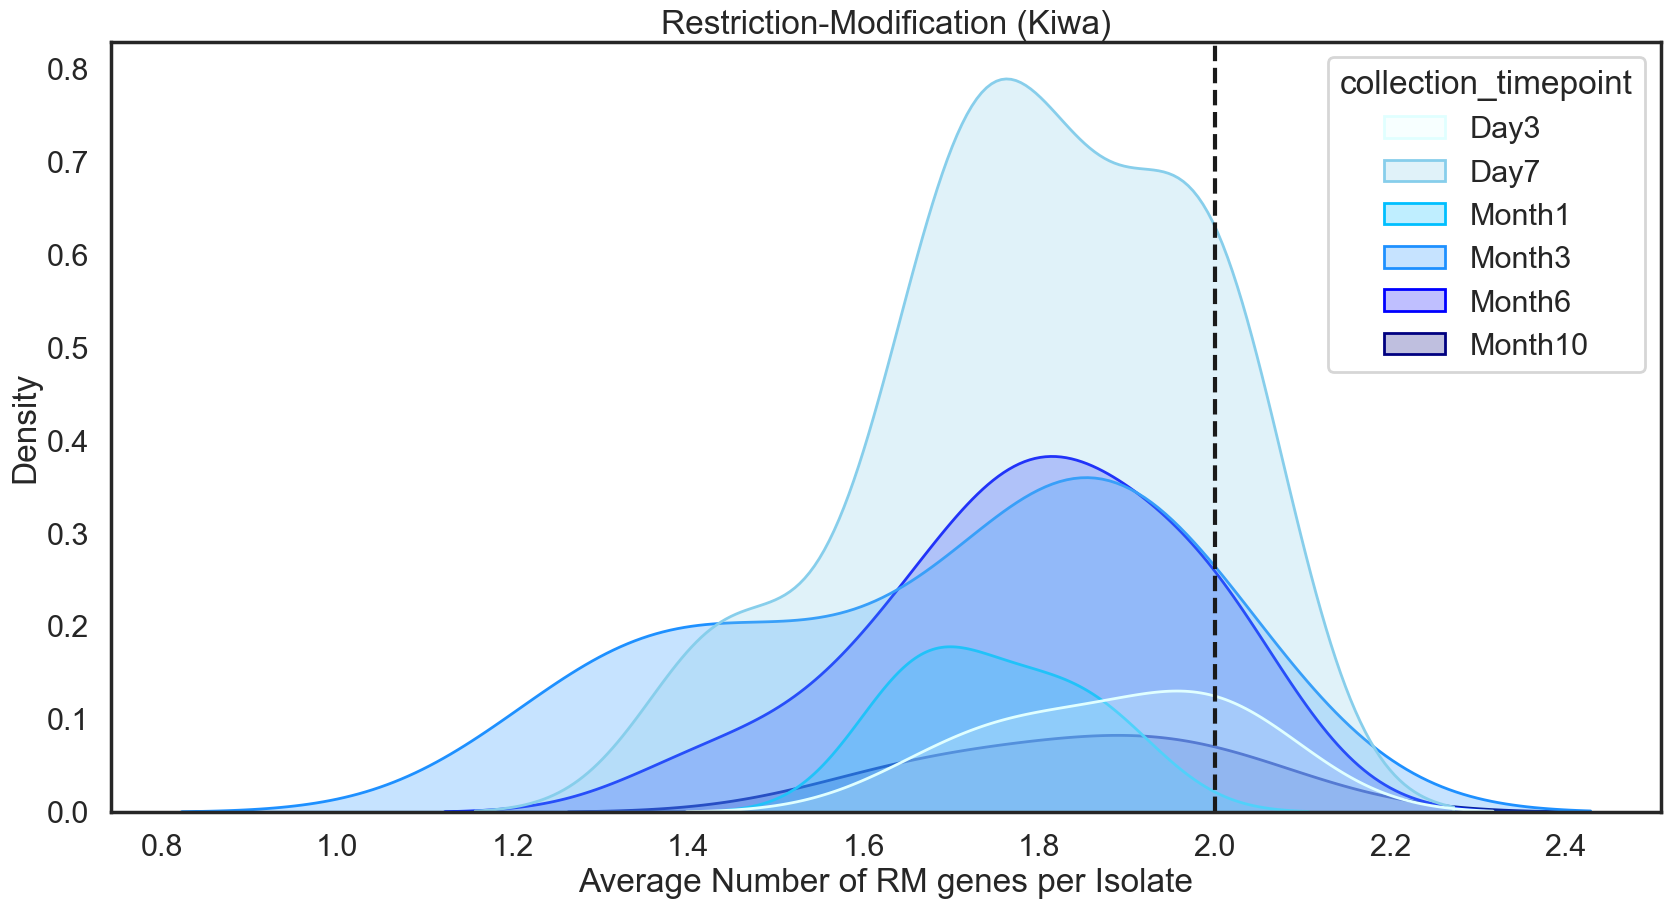

In [90]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ20_aveperiso[AZ20_aveperiso['type']=='Kiwa'], x='avg_genes_per_iso', 
            hue='collection_timepoint', 
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'], 
            shade=True,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(2, c="k", ls='--')
plt.title('Restriction-Modification (Kiwa)')
plt.xlabel('Average Number of RM genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_KIWAdefense2.png', dpi=150, bbox_inches='tight')

In [46]:
mus = []
timept = []
islt = []
num_types = []
typez = []

for isol in AZ20_def_nm.index.unique():
    subset = AZ20_def_nm[AZ20_def_nm.index == isol]
    islt.append(isol)
    mus.append(subset.mouse.iloc[0])
    timept.append(subset.collection_timepoint.iloc[0])
    typez.append(list(subset.type.unique()))
    num_types.append(len(list(subset.type.unique())))

In [47]:
AZ20_type_variety = pd.DataFrame()
AZ20_type_variety['isolate'] = islt
AZ20_type_variety['mouse'] = mus
AZ20_type_variety['timepoint'] = timept
AZ20_type_variety['num_types'] = num_types
AZ20_type_variety['types_list'] = typez
AZ20_type_variety

isolate mouse  timepoint  num_types  \
0     23B_Day7_12   23B       Day7          7   
1     23B_Day7_13   23B       Day7          7   
2     23B_Day7_14   23B       Day7          7   
3     23B_Day7_16   23B       Day7          7   
4     23B_Day7_17   23B       Day7          7   
...           ...   ...        ...        ...   
1048   30N_Day7_6   30N       Day7          7   
1049   30N_Day7_7   30N       Day7          7   
1050   30N_Day7_8   30N       Day7          7   
1051   30N_Day7_9   30N       Day7          7   
1052     AZ20_ref   NaN  reference          7   

                                             types_list  
0     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
1     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
2     [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
3     [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
4     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
...                                                 ...  
1048  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1049  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1050  [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
1051  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1052  [Septu, PsyrTA, RM, Lamassu-Fam, Kiwa, Thoeris...  

[1053 rows x 5 columns]

In [48]:
AZ20_type_variety.num_types.unique()

array([ 7,  6, 13, 16, 14,  5, 17,  1,  2, 11,  9, 15,  3,  4,  8])

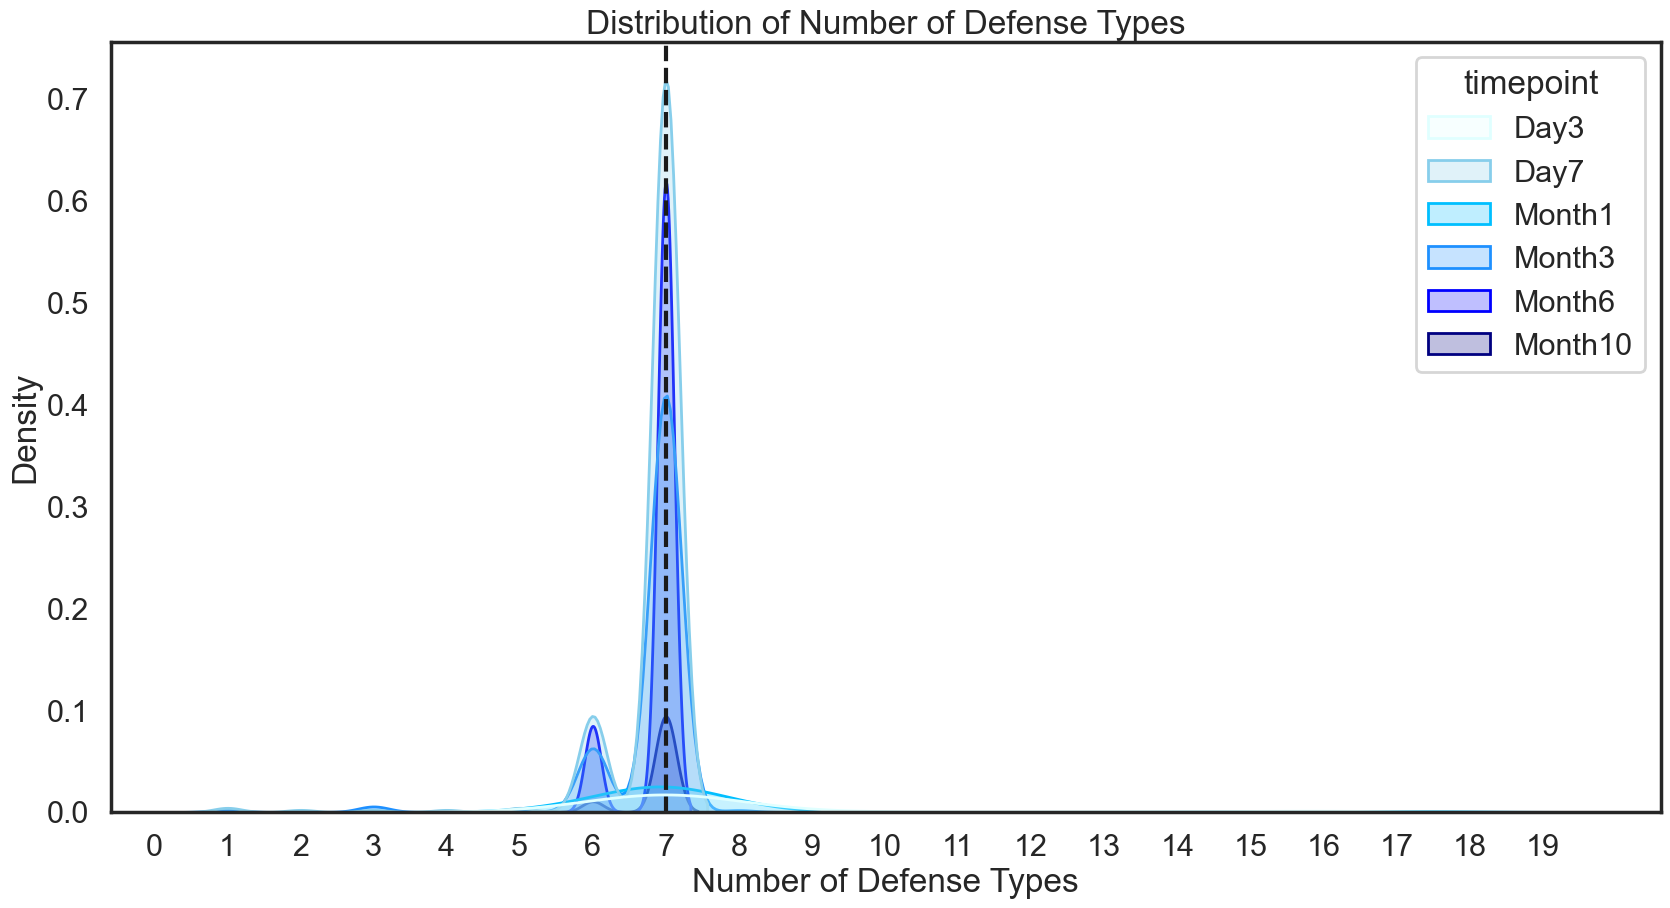

In [65]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ20_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'], 
            shade=True,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(7, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xticks(np.arange(0, 20, 1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_defense_type_num_alltp.svg', dpi=150, bbox_inches='tight')

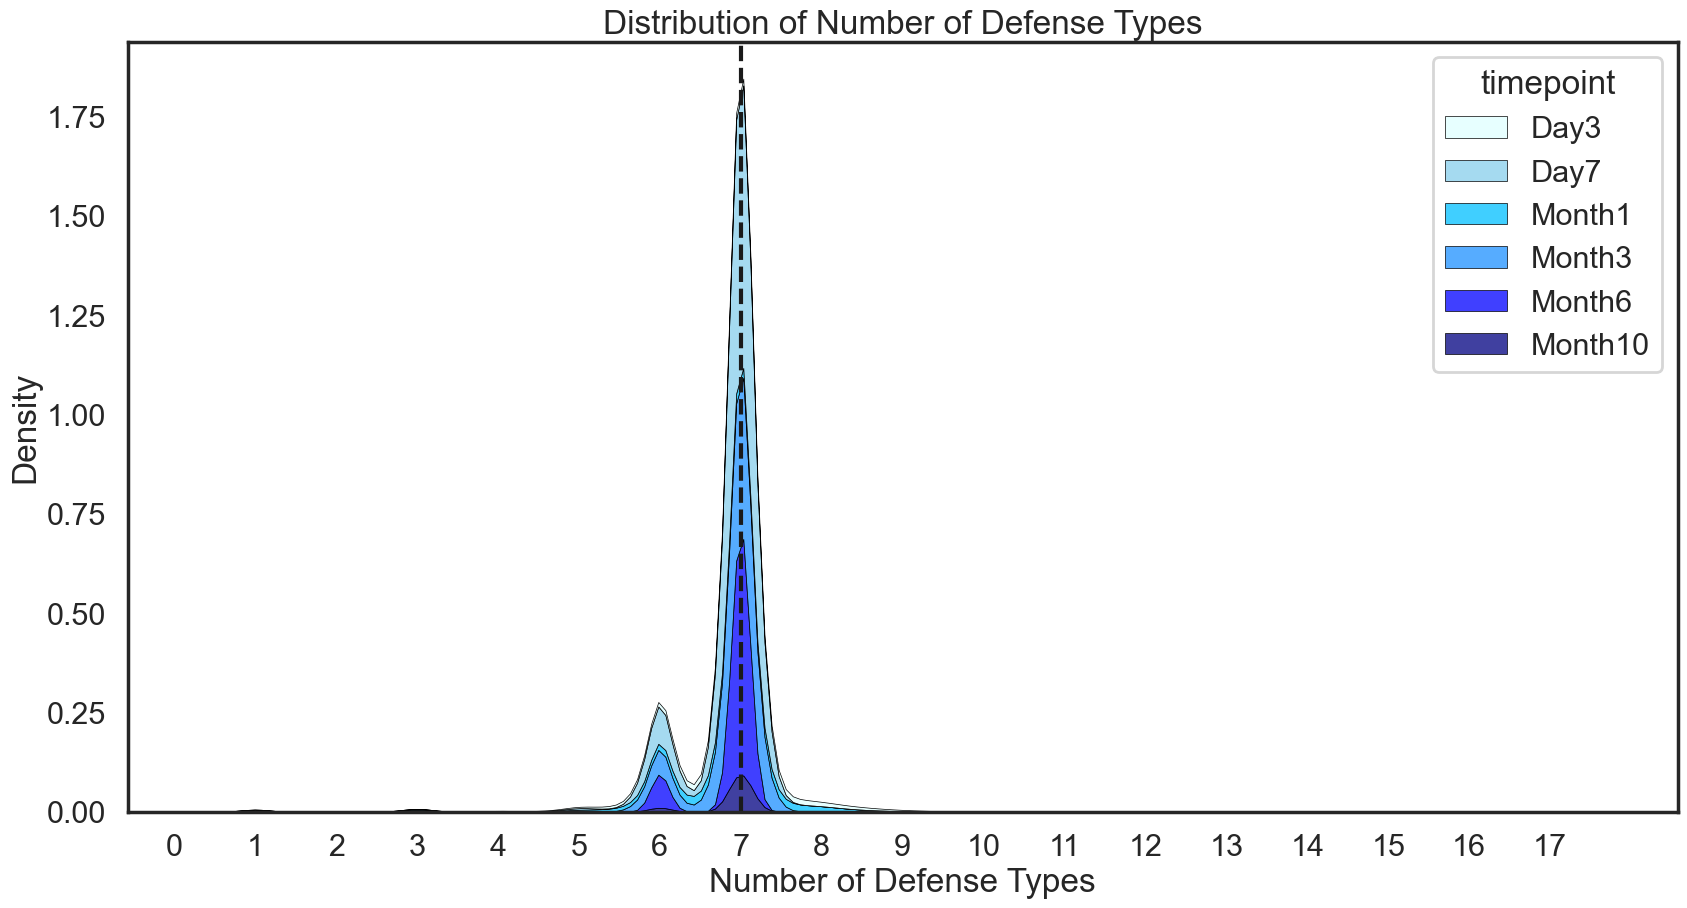

In [51]:
sns.kdeplot(data=AZ20_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'], 
            shade=True, multiple='stack', ec='black', lw=0.5,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(7, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xticks(np.arange(0, 18, 1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_defense_type_num_alltp_stack.svg', dpi=150, bbox_inches='tight')

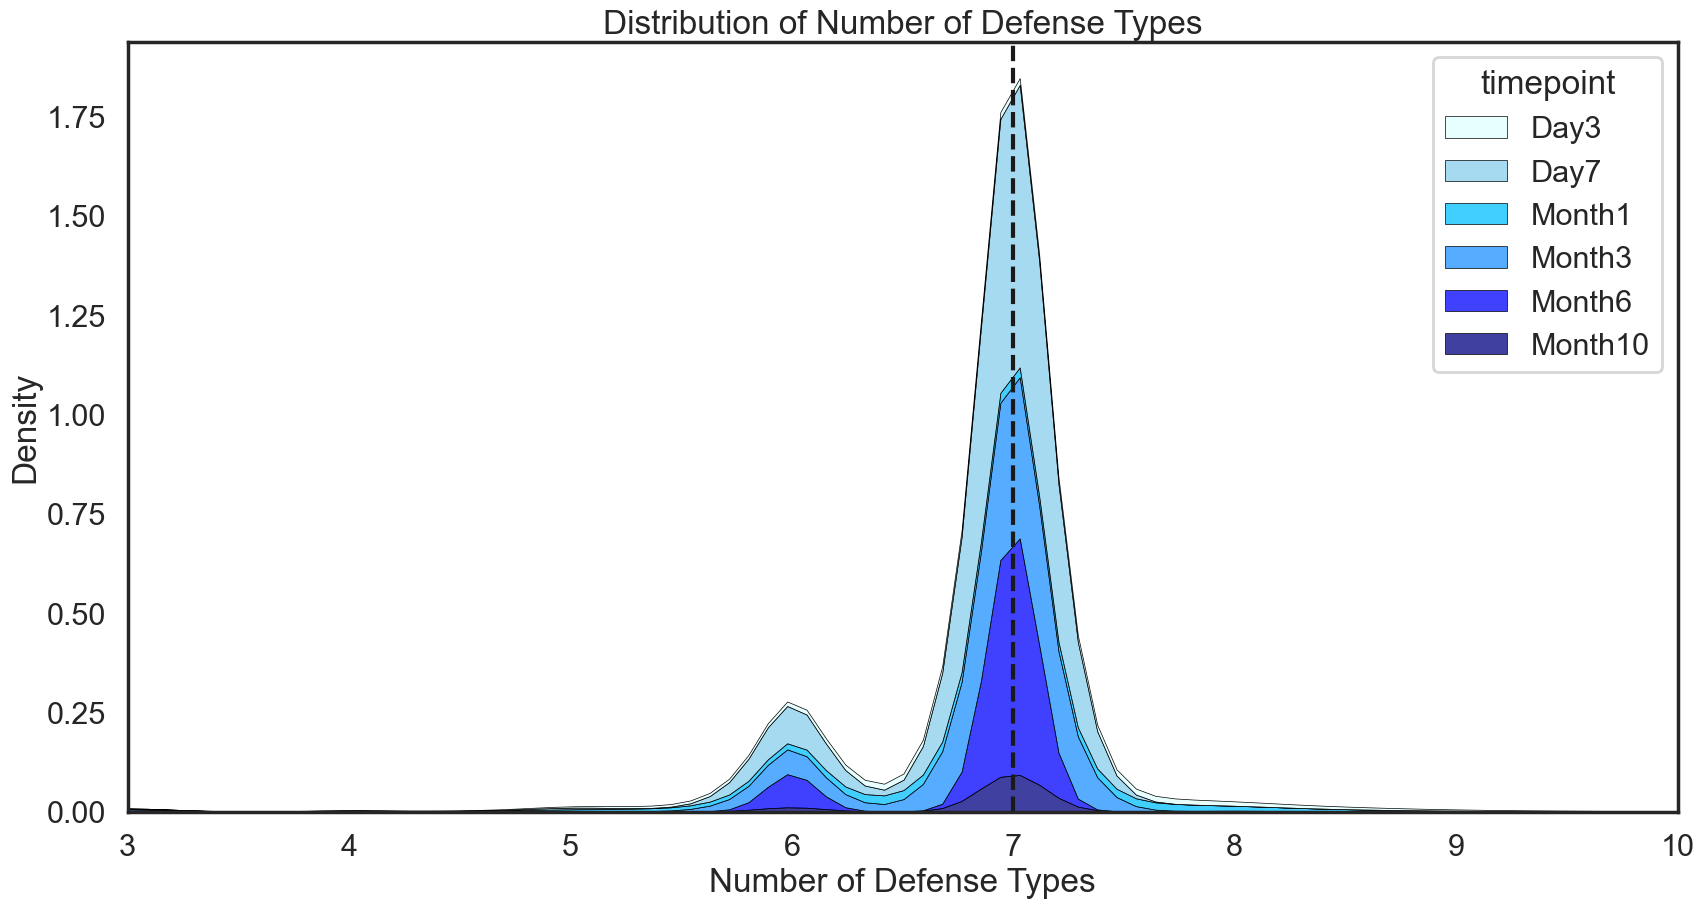

In [53]:
sns.kdeplot(data=AZ20_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'], 
            shade=True, multiple='stack', ec='black', lw=0.5,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(7, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xlim(3,10)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_defense_type_num_alltp_stack_short.svg', dpi=150, bbox_inches='tight')

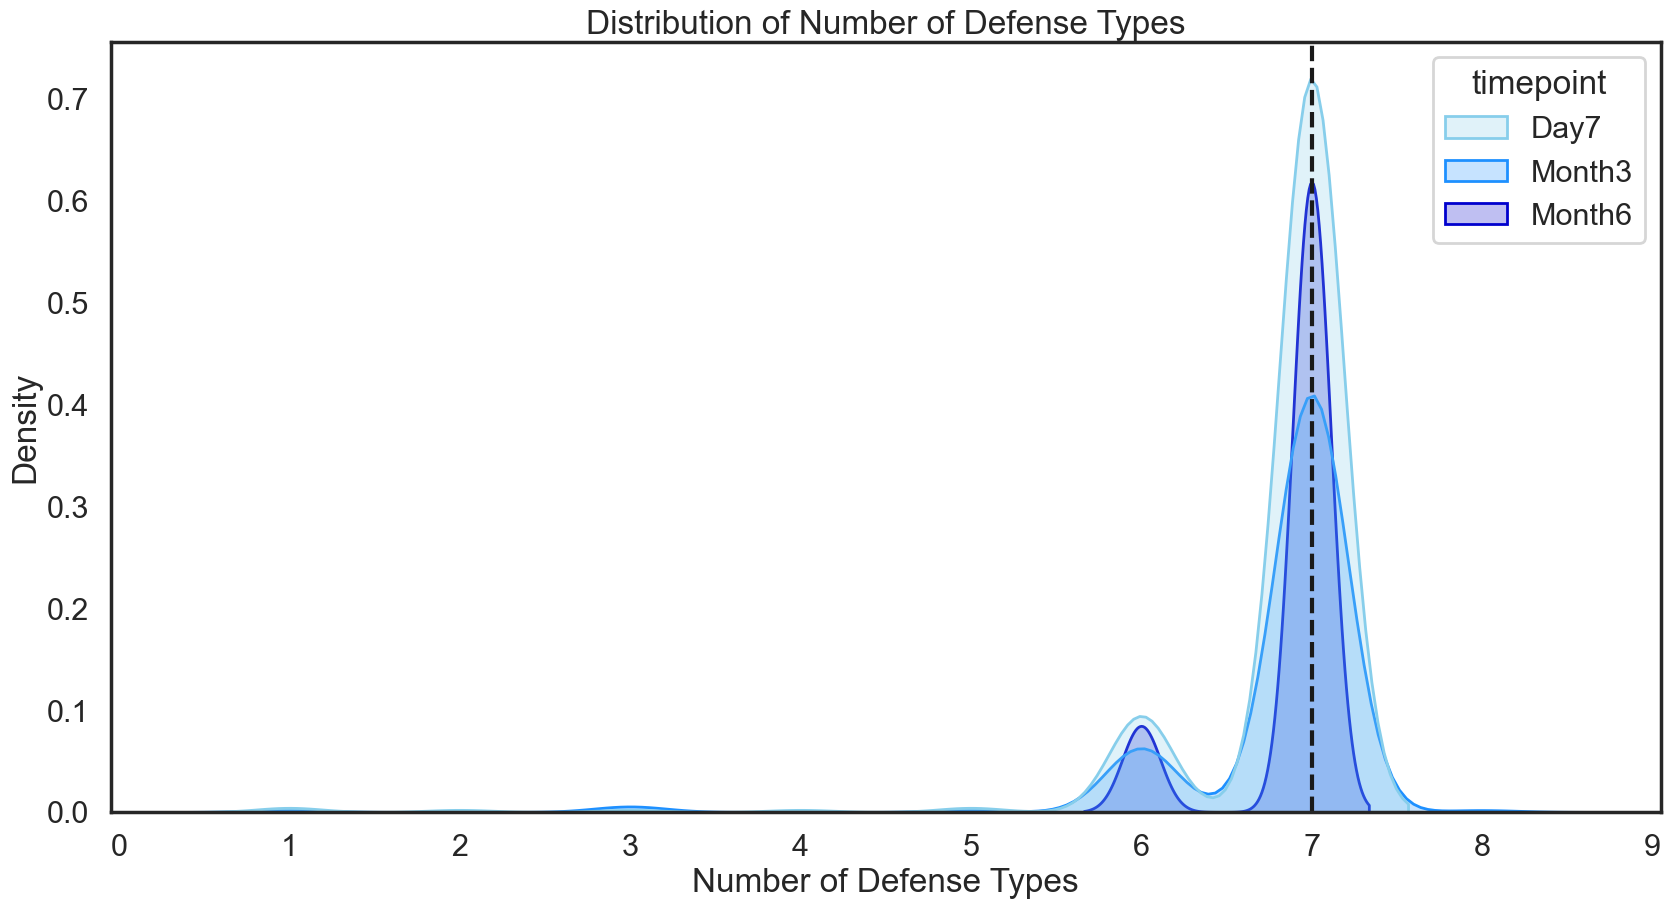

In [54]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ20_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['skyblue', 'dodgerblue', 'mediumblue'], 
            shade=True,
             hue_order=['Day7', 'Month3', 'Month6'])
plt.axvline(7, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xticks(np.arange(0, 10, 1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_defense_type_num_3tp.svg', dpi=150, bbox_inches='tight')

In [91]:
AZ20_type_variety

isolate mouse  timepoint  num_types  \
0     23B_Day7_12   23B       Day7          7   
1     23B_Day7_13   23B       Day7          7   
2     23B_Day7_14   23B       Day7          7   
3     23B_Day7_16   23B       Day7          7   
4     23B_Day7_17   23B       Day7          7   
...           ...   ...        ...        ...   
1048   30N_Day7_6   30N       Day7          7   
1049   30N_Day7_7   30N       Day7          7   
1050   30N_Day7_8   30N       Day7          7   
1051   30N_Day7_9   30N       Day7          7   
1052     AZ20_ref   NaN  reference          7   

                                             types_list  
0     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
1     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
2     [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
3     [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
4     [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
...                                                 ...  
1048  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1049  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1050  [Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mo...  
1051  [Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mo...  
1052  [Septu, PsyrTA, RM, Lamassu-Fam, Kiwa, Thoeris...  

[1053 rows x 5 columns]

In [55]:
AZ20_type_variety.types_list.value_counts()

[Lamassu-Fam, Kiwa, Septu, PsyrTA, Thoeris, Mokosh, RM]                                                                                      766
[Lamassu-Fam, Kiwa, PsyrTA, Septu, Thoeris, Mokosh, RM]                                                                                      141
[Lamassu-Fam, Septu, PsyrTA, Thoeris, Mokosh, RM]                                                                                             91
[Lamassu-Fam, PsyrTA, Septu, Thoeris, Mokosh, RM]                                                                                             23
[Gao, CBASS, RM]                                                                                                                               3
[Kiwa]                                                                                                                                         3
[Lamassu-Fam, Kiwa, PsyrTA, Septu, Mokosh, RM]                                                                                    

In [56]:
AZ20_type_variety2 = AZ20_type_variety.copy()
AZ20_type_variety2.types_list = AZ20_type_variety2.types_list.astype(str)
AZ20_type_variety2.dtypes

isolate       object
mouse         object
timepoint     object
num_types      int64
types_list    object
dtype: object

In [57]:
AZ20_type_variety2.groupby(by=['types_list', 'timepoint']).count()

isolate  mouse  \
types_list                                         timepoint                   
['AbiH', 'Hachiman', 'RosmerTA', 'RM', 'CAS']      Month3           1      1   
['Gao', 'CBASS', 'RM']                             Month3           3      3   
['Kiwa', 'PsyrTA', 'Septu', 'Thoeris', 'Mokosh'... Day7             1      1   
                                                   Month3           1      1   
['Kiwa', 'Septu', 'RM']                            Day7             1      1   
['Kiwa']                                           Day7             2      2   
                                                   Month3           1      1   
['Lamassu-Fam', 'AbiEii', 'Lit', 'Gabija', 'Abi... Day3             1      1   
['Lamassu-Fam', 'AbiEii', 'Lit', 'Gabija', 'Abi... Day3             1      1   
['Lamassu-Fam', 'AbiEii', 'Lit', 'Gabija', 'dCT... Day3             1      1   
['Lamassu-Fam', 'AbiH', 'Kiwa', 'Septu', 'PsyrT... Month3           1      1   
['Lamassu-Fam', 'AbiH', 'PsyrTA', 'Septu', 'Tho... Month3           1      1   
['Lamassu-Fam', 'Gabija', 'Abi2', 'Kiwa', 'Sept... Day3             1      1   
['Lamassu-Fam', 'Gabija', 'Lit', 'Abi2', 'Septu... Day3             1      1   
['Lamassu-Fam', 'Gabija', 'Lit', 'AbiEii', 'Abi... Month1           1      1   
['Lamassu-Fam', 'Kiwa', 'AbiEii', 'Lit', 'PsyrT... Day3             1      1   
['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Septu', 'Mok... Day7             2      2   
['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Septu', 'RM']   Day7             1      1   
['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Septu', 'Tho... Day3             9      9   
                                                   Day7            58     58   
                                                   Month1          12     12   
                                                   Month10          3      3   
                                                   Month3          43     43   
                                                   Month6          16     16   
['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Septu', 'Tho... Month3           1      1   
['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Thoeris', 'M... Month6           1      1   
['Lamassu-Fam', 'Kiwa', 'Septu', 'PsyrTA', 'Mok... Day7             1      1   
['Lamassu-Fam', 'Kiwa', 'Septu', 'PsyrTA', 'Tho... Day3            38     38   
                                                   Day7           301    301   
                                                   Month1          42     42   
                                                   Month10         33     33   
                                                   Month3         185    185   
                                                   Month6         167    167   
['Lamassu-Fam', 'Lit', 'AbiEii', 'Gabija', 'Abi... Month1           1      1   
['Lamassu-Fam', 'PsyrTA', 'Septu', 'RM']           Day7             1      1   
['Lamassu-Fam', 'PsyrTA', 'Septu', 'Thoeris', '... Day7             6      6   
                                                   Month1           2      2   
                                                   Month10          1      1   
                                                   Month3          12     12   
                                                   Month6           2      2   
['Lamassu-Fam', 'PsyrTA', 'Septu', 'Thoeris', '... Day7             1      1   
['Lamassu-Fam', 'Septu', 'PsyrTA', 'Thoeris', '... Day3             2      2   
                                                   Day7            37     37   
                                                   Month1           6      6   
                                                   Month10          3      3   
                                                   Month3          21     21   
                                                   Month6          22     22   
['Lamassu-Fam', 'dCTPdeaminase', 'AbiEii', 'Abi... Day3             1      1   
['Lamassu-Fam', 'dCTPdeaminase', 'Lit', 'AbiEii... Month1     

In [58]:
AZ20_type_variety2[AZ20_type_variety2.isolate == 'AZ20_ref'].types_list.iloc[0]

"['Septu', 'PsyrTA', 'RM', 'Lamassu-Fam', 'Kiwa', 'Thoeris', 'Mokosh']"

In [59]:
common_combos = ["['Lamassu-Fam', 'Septu', 'PsyrTA', 'Thoeris', 'Mokosh', 'RM']", 
                "['Lamassu-Fam', 'PsyrTA', 'Septu', 'Thoeris', 'Mokosh', 'RM']",
                "['Lamassu-Fam', 'Kiwa', 'Septu', 'PsyrTA', 'Thoeris', 'Mokosh', 'RM']",
                "['Lamassu-Fam', 'Kiwa', 'PsyrTA', 'Septu', 'Thoeris', 'Mokosh', 'RM']"]
reference = "['Lamassu-Fam', 'Kiwa', 'Septu', 'PsyrTA', 'Thoeris', 'Mokosh', 'RM']"
#alternate/orginal: "['Septu', 'PsyrTA', 'RM', 'Lamassu-Fam', 'Kiwa', 'Thoeris', 'Mokosh']"

In [61]:
AZ20_aveperiso[AZ20_aveperiso['type']=='CAS']

collection_timepoint mouse type  gene_count  iso_count  \
tp_mouse                                                             
Month3_25N                Month3   25N  CAS           4         22   
Month1_23LL               Month1  23LL  CAS          13         18   
Month1_25N                Month1   25N  CAS          24         16   
Day3_25N                    Day3   25N  CAS          30         15   
Day3_23LL                   Day3  23LL  CAS          36         14   

             avg_genes_per_iso  
tp_mouse                        
Month3_25N            0.181818  
Month1_23LL           0.722222  
Month1_25N            1.500000  
Day3_25N              2.000000  
Day3_23LL             2.571429

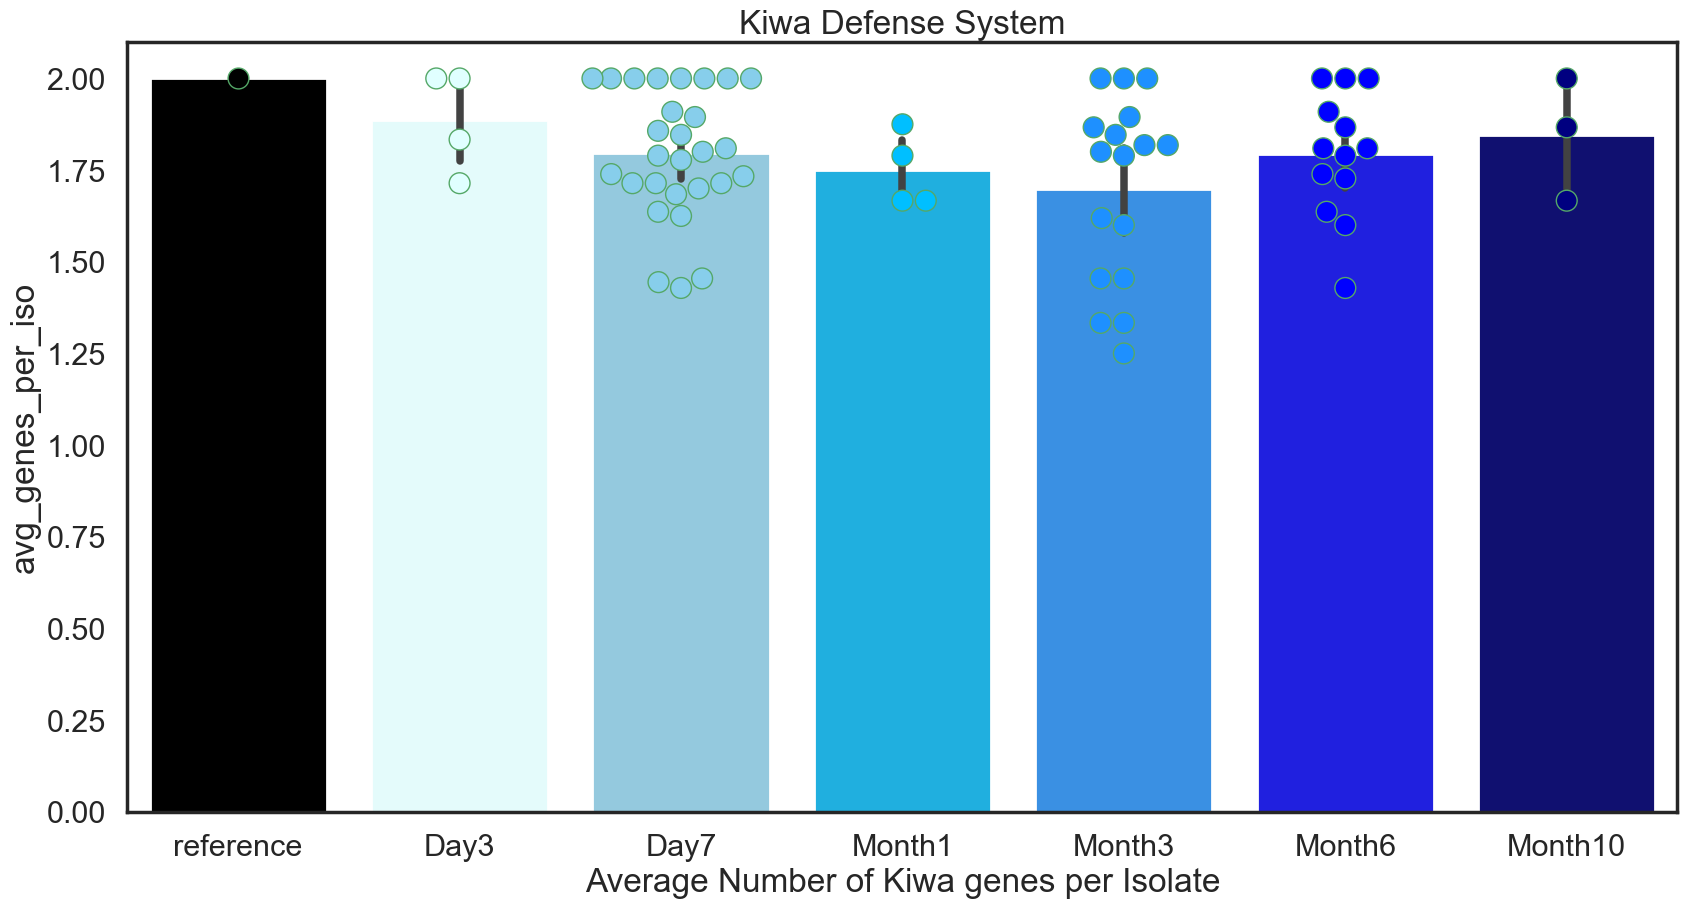

In [62]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

AZ20kiwa = AZ20_aveperiso[AZ20_aveperiso['type']=='Kiwa'].copy()
AZ20kiwa['collection_timepoint'] = pd.Categorical(AZ20kiwa['collection_timepoint'], 
                                                  ['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])


g = sns.barplot(data=AZ20kiwa.sort_values('collection_timepoint'), y='avg_genes_per_iso', 
            x='collection_timepoint',
            palette=['black','lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'])
g = sns.swarmplot(data=AZ20kiwa.sort_values('collection_timepoint'), y='avg_genes_per_iso', 
            x='collection_timepoint', size=15, edgecolor='g', linewidth=1,
            palette=['black','lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'])
#plt.axhline(2, c="k", ls='--')
plt.title('Kiwa Defense System')
plt.xlabel('Average Number of Kiwa genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_Kiwa_defense4.svg', dpi=150, bbox_inches='tight')

In [94]:
AZ20_Kiwa = AZ20_def_nm[AZ20_def_nm['type']=='Kiwa']
AZ20_Kiwa2 = AZ20_Kiwa[['collection_timepoint', 'mouse', 'gene_name', 'type']].copy()
AZ20_Kiwa3 = AZ20_Kiwa2.groupby(['collection_timepoint', 'mouse']).count()
AZ20_Kiwa4 = AZ20_Kiwa3.reset_index()
AZ20_Kiwa4['collection_timepoint'] = pd.Categorical(AZ20_Kiwa4['collection_timepoint'], 
                                                  ['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
AZ20_Kiwa4.sort_values('collection_timepoint', inplace=True)
AZ20_Kiwa4.rename(columns={'gene_name':'2gene_counts'}, inplace=True)
AZ20_Kiwa4['type'] = 'Kiwa'
AZ20_Kiwa4

collection_timepoint mouse  2gene_counts  type
0                  Day3  23LL            24  Kiwa
1                  Day3   25N            30  Kiwa
2                  Day3   28L            30  Kiwa
3                  Day3   28N            22  Kiwa
20                 Day7   27R            36  Kiwa
..                  ...   ...           ...   ...
59               Month6   25N            34  Kiwa
68               Month6  29LL             8  Kiwa
38              Month10   28L            28  Kiwa
37              Month10   25N            14  Kiwa
36              Month10  23LL            30  Kiwa

[69 rows x 4 columns]

In [95]:
AZ20_Kiwa5 = pd.merge(AZ20_Kiwa4, AZ20_prop5[['collection_timepoint', 'mouse', 'type', 'iso_count']], 
         left_on=['collection_timepoint', 'mouse', 'type'], right_on=['collection_timepoint', 'mouse', 'type'])
AZ20_Kiwa5['geneperiso'] = AZ20_Kiwa5['2gene_counts']/AZ20_Kiwa5['iso_count']
AZ20_Kiwa5['iso_without_kiwa'] = AZ20_Kiwa5['iso_count'] - (AZ20_Kiwa5['2gene_counts']/2)
AZ20_Kiwa5['iso_with_kiwa'] = AZ20_Kiwa5['2gene_counts']/2
AZ20_Kiwa5['prop_without_kiwa'] = AZ20_Kiwa5['iso_without_kiwa']/AZ20_Kiwa5['iso_count']
AZ20_Kiwa5['prop_with_kiwa'] = AZ20_Kiwa5['iso_with_kiwa']/AZ20_Kiwa5['iso_count']
AZ20_Kiwa5

collection_timepoint mouse  2gene_counts  type  iso_count  geneperiso  \
0                  Day3  23LL            24  Kiwa         14    1.714286   
1                  Day3   25N            30  Kiwa         15    2.000000   
2                  Day3   28L            30  Kiwa         15    2.000000   
3                  Day3   28N            22  Kiwa         12    1.833333   
4                  Day7   27R            36  Kiwa         20    1.800000   
..                  ...   ...           ...   ...        ...         ...   
64               Month6   25N            34  Kiwa         19    1.789474   
65               Month6  29LL             8  Kiwa          4    2.000000   
66              Month10   28L            28  Kiwa         15    1.866667   
67              Month10   25N            14  Kiwa          7    2.000000   
68              Month10  23LL            30  Kiwa         18    1.666667   

    iso_without_kiwa  iso_with_kiwa  prop_without_kiwa  prop_with_kiwa  
0                2.0           12.0           0.142857        0.857143  
1                0.0           15.0           0.000000        1.000000  
2                0.0           15.0           0.000000        1.000000  
3                1.0           11.0           0.083333        0.916667  
4                2.0           18.0           0.100000        0.900000  
..               ...            ...                ...             ...  
64               2.0           17.0           0.105263        0.894737  
65               0.0            4.0           0.000000        1.000000  
66               1.0           14.0           0.066667        0.933333  
67               0.0            7.0           0.000000        1.000000  
68               3.0           15.0           0.166667        0.833333  

[69 rows x 10 columns]

In [641]:
AZ20_Kiwa5.collection_timepoint.unique()

array(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
      dtype=object)

In [654]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

g = sns.scatterplot(data=AZ20_Kiwa5, y='prop_without_kiwa', x='prop_with_kiwa', 
                    hue='collection_timepoint', size=15, edgecolor='g', linewidth=1,
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'navy'])
plt.title('Kiwa Defense System')
plt.xlabel('Proportion of Isolates with Kiwa', fontsize=24)
plt.ylabel('Proportion of Isolates without Kiwa', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_Kiwa_defense4.svg', dpi=150, bbox_inches='tight')

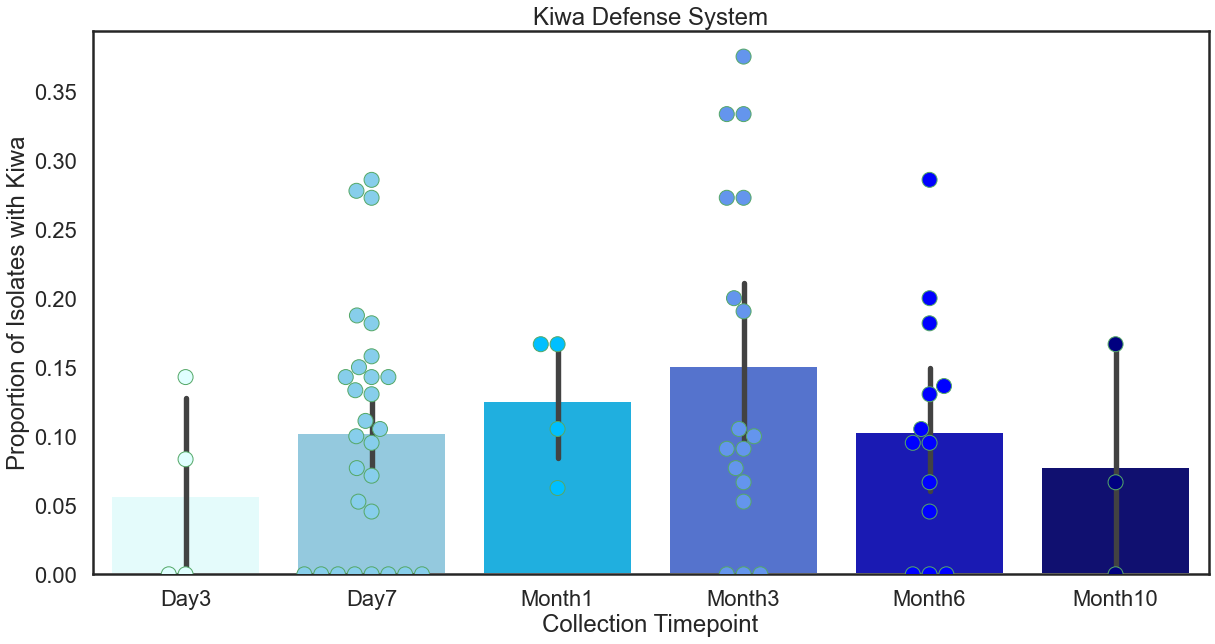

In [670]:
g = sns.barplot(data=AZ20_Kiwa5, y='prop_without_kiwa', 
            x='collection_timepoint',
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'royalblue', 'mediumblue',  'navy'])
g = sns.swarmplot(data=AZ20_Kiwa5, y='prop_without_kiwa', 
            x='collection_timepoint', size=15, edgecolor='g', linewidth=1,
            palette=['lightcyan', 'skyblue', 'deepskyblue', 'cornflowerblue', 'blue',  'navy'])
#plt.axhline(1, c="k", ls='--')
plt.title('Kiwa Defense System')
plt.xlabel('Collection Timepoint', fontsize=24)
plt.ylabel('Proportion of Isolates with Kiwa', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ20_Kiwa_defense4.svg', dpi=150, bbox_inches='tight')

In [124]:
AZ20_Kiwa6 = AZ20_Kiwa5[['collection_timepoint', 'iso_without_kiwa', 'iso_with_kiwa']].copy()
AZ20_Kiwa7 = AZ20_Kiwa6.groupby(by=['collection_timepoint']).sum()
AZ20_Kiwa7['total_iso'] = AZ20_Kiwa7['iso_without_kiwa']+AZ20_Kiwa7['iso_with_kiwa']
AZ20_Kiwa7['prop_with_kiwa'] = AZ20_Kiwa7['iso_with_kiwa']/AZ20_Kiwa7['total_iso']
AZ20_Kiwa7 = AZ20_Kiwa7.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
AZ20_Kiwa7

iso_without_kiwa  iso_with_kiwa  total_iso  \
collection_timepoint                                               
Day3                               3.0           53.0       56.0   
Day7                              46.0          367.0      413.0   
Month1                             8.0           57.0       65.0   
Month3                            38.0          232.0      270.0   
Month6                            24.0          184.0      208.0   
Month10                            4.0           36.0       40.0   

                      prop_with_kiwa  
collection_timepoint                  
Day3                        0.946429  
Day7                        0.888620  
Month1                      0.876923  
Month3                      0.859259  
Month6                      0.884615  
Month10                     0.900000

In [133]:
AZ20_Kiwa77 = AZ20_Kiwa7[['iso_with_kiwa', 'iso_without_kiwa']].copy()
AZ20_Kiwa77 = AZ20_Kiwa77.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
ax = AZ20_Kiwa77.plot.area(title = "Kiwa", colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylabel('Isolate Counts')
ax.set_xlabel('Timepoint')
sns.despine()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/DefSys_Kiwa_area.svg', dpi=300, bbox_inches="tight")

In [134]:
AZ20_Kiwa77 = AZ20_Kiwa7[['iso_with_kiwa', 'iso_without_kiwa']].copy()
AZ20_Kiwa77 = AZ20_Kiwa77.reindex(['Day7', 'Month3', 'Month6'])
ax = AZ20_Kiwa77.plot.area(title = "Kiwa", colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylabel('Isolate Counts')
ax.set_xlabel('Timepoint')
sns.despine()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/DefSys_Kiwa_area.svg', dpi=300, bbox_inches="tight"

In [112]:
AZ20_Kiwa8 = AZ20_Kiwa7.stack().reset_index()
AZ20_Kiwa9 = AZ20_Kiwa8[AZ20_Kiwa8.level_1.isin(['iso_with_kiwa', 'iso_without_kiwa'])].copy()
AZ20_Kiwa9.rename(columns={0:'counts'}, inplace=True)
AZ20_Kiwa9

collection_timepoint           level_1  counts
0                  Day3  iso_without_kiwa     3.0
1                  Day3     iso_with_kiwa    53.0
4                  Day7  iso_without_kiwa    46.0
5                  Day7     iso_with_kiwa   367.0
8                Month1  iso_without_kiwa     8.0
9                Month1     iso_with_kiwa    57.0
12              Month10  iso_without_kiwa     4.0
13              Month10     iso_with_kiwa    36.0
16               Month3  iso_without_kiwa    38.0
17               Month3     iso_with_kiwa   232.0
20               Month6  iso_without_kiwa    24.0
21               Month6     iso_with_kiwa   184.0

In [109]:
AZ20_Kiwa7.stack().reset_index().level_1.isin(['iso_with_kiwa', 'iso_without_kiwa'])

0      True
1      True
2     False
3     False
4      True
5      True
6     False
7     False
8      True
9      True
10    False
11    False
12     True
13     True
14    False
15    False
16     True
17     True
18    False
19    False
20     True
21     True
22    False
23    False
Name: level_1, dtype: bool

### General trend to lose or have diminished Kiwa defense system
#### https://doi.org/10.1093/nar/gkz916
"However, the integrity of HACHIMAN, KIWA and SEPTU defense systems shows dynamic changes in different strains of the same species (E. coli and S. enterica). Some recent studies indicate that the defense genes are the most evolutionarily dynamic functional class of genes and the gene loss is about three times more than gene gain."

# AZ51

In [37]:
AZ51_defenses = pd.read_csv('defensefinder_AZ51.csv')
AZ51_defenses.head()

sample       gene_name  hit_begin_match  hit_end_match    hit_gene_ref  \
0  AZ51_ref          GajB_2                4            479          GajB_1   
1  AZ51_ref          GajB_2                1            532          GajB_1   
2  AZ51_ref            GajA                2            490            GajA   
3  AZ51_ref  Type_IV_REases              196            382  Type_IV_REases   
4  AZ51_ref   Type_I_MTases                8            537   Type_I_MTases   

      hit_i_eval          hit_id  hit_pos  hit_profile_cov  hit_score  ...  \
0   1.500000e-35  HLELHOCF_04136     4054            0.753      120.9  ...   
1  1.200000e-115  HLELHOCF_04140     4058            0.772      385.3  ...   
2   8.500000e-64  HLELHOCF_04141     4059            0.827      214.4  ...   
3   7.300000e-36  HLELHOCF_03941     3864            0.392      122.0  ...   
4  1.500000e-175  HLELHOCF_03942     3865            0.992      583.0  ...   

   locus_num                                          model_fqn      replicon  \
0          1  defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
1          1  defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
2          1  defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
3          1             defense-finder-models/RM/RM/RM_Type_IV  UserReplicon   
4          1              defense-finder-models/RM/RM/RM_Type_I  UserReplicon   

                      sys_id sys_loci sys_occ sys_score  sys_wholeness  \
0      UserReplicon_Gabija_1        1       2       2.0            1.0   
1      UserReplicon_Gabija_1        1       2       2.0            1.0   
2      UserReplicon_Gabija_1        1       2       2.0            1.0   
3  UserReplicon_RM_Type_IV_3        1       1       1.0            1.0   
4   UserReplicon_RM_Type_I_1        1       1       2.5            1.0   

   used_in      sample_id  
0      NaN  AZ51_ref_None  
1      NaN  AZ51_ref_None  
2      NaN  AZ51_ref_None  
3      NaN  AZ51_ref_None  
4      NaN  AZ51_ref_None  

[5 rows x 23 columns]

In [38]:
AZ51_defenses.tail()

sample    gene_name  hit_begin_match  hit_end_match  \
41048  43N_Month3_3_S17  cas7f_I-F_2               10            330   
41049  43N_Month3_3_S17  cas5f_I-F_3                5            289   
41050  43N_Month3_3_S17  cas8f_I-F_4               52            414   
41051  43N_Month3_3_S17  cas3f_I-F_1                1           1074   
41052  43N_Month3_3_S17   cas1_I-F_1               14            320   

      hit_gene_ref     hit_i_eval                  hit_id  hit_pos  \
41048  cas7f_I-F_3  1.300000e-145  43N_Month3_3_S17_02951     2900   
41049  cas5f_I-F_4  3.000000e-103  43N_Month3_3_S17_02952     2901   
41050  cas8f_I-F_8  9.000000e-148  43N_Month3_3_S17_02953     2902   
41051  cas3f_I-F_1   0.000000e+00  43N_Month3_3_S17_02954     2903   
41052   cas1_I-F_1  1.400000e-165  43N_Month3_3_S17_02955     2904   

       hit_profile_cov  hit_score  ...  locus_num  \
41048            1.000      482.9  ...          1   
41049            0.997      343.3  ...          1   
41050            0.997      490.6  ...          1   
41051            1.000     1217.6  ...          1   
41052            1.000      548.1  ...          1   

                                               model_fqn      replicon  \
41048  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
41049  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
41050  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
41051  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
41052  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   

                                      sys_id sys_loci sys_occ sys_score  \
41048  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1       6.0   
41049  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1       6.0   
41050  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1       6.0   
41051  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1       6.0   
41052  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1       6.0   

       sys_wholeness                                            used_in  \
41048            1.0  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...   
41049            1.0  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...   
41050            1.0  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...   
41051            1.0  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...   
41052            1.0  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...   

          sample_id  
41048  43N_Month3_3  
41049  43N_Month3_3  
41050  43N_Month3_3  
41051  43N_Month3_3  
41052  43N_Month3_3  

[5 rows x 23 columns]

In [39]:
AZ51_defenses['sample-id'] = AZ51_defenses['sample'].replace(to_replace='_S[0-9]*', value='', regex=True)

In [40]:
AZ51_defenses = AZ51_defenses.set_index('sample-id')
AZ51_defenses.head()

sample       gene_name  hit_begin_match  hit_end_match  \
sample-id                                                             
AZ51_ref   AZ51_ref          GajB_2                4            479   
AZ51_ref   AZ51_ref          GajB_2                1            532   
AZ51_ref   AZ51_ref            GajA                2            490   
AZ51_ref   AZ51_ref  Type_IV_REases              196            382   
AZ51_ref   AZ51_ref   Type_I_MTases                8            537   

             hit_gene_ref     hit_i_eval          hit_id  hit_pos  \
sample-id                                                           
AZ51_ref           GajB_1   1.500000e-35  HLELHOCF_04136     4054   
AZ51_ref           GajB_1  1.200000e-115  HLELHOCF_04140     4058   
AZ51_ref             GajA   8.500000e-64  HLELHOCF_04141     4059   
AZ51_ref   Type_IV_REases   7.300000e-36  HLELHOCF_03941     3864   
AZ51_ref    Type_I_MTases  1.500000e-175  HLELHOCF_03942     3865   

           hit_profile_cov  hit_score  ...  locus_num  \
sample-id                              ...              
AZ51_ref             0.753      120.9  ...          1   
AZ51_ref             0.772      385.3  ...          1   
AZ51_ref             0.827      214.4  ...          1   
AZ51_ref             0.392      122.0  ...          1   
AZ51_ref             0.992      583.0  ...          1   

                                                   model_fqn      replicon  \
sample-id                                                                    
AZ51_ref   defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
AZ51_ref   defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
AZ51_ref   defense-finder-models/DefenseFinder_1/Gabija/G...  UserReplicon   
AZ51_ref              defense-finder-models/RM/RM/RM_Type_IV  UserReplicon   
AZ51_ref               defense-finder-models/RM/RM/RM_Type_I  UserReplicon   

                              sys_id sys_loci sys_occ sys_score  \
sample-id                                                         
AZ51_ref       UserReplicon_Gabija_1        1       2       2.0   
AZ51_ref       UserReplicon_Gabija_1        1       2       2.0   
AZ51_ref       UserReplicon_Gabija_1        1       2       2.0   
AZ51_ref   UserReplicon_RM_Type_IV_3        1       1       1.0   
AZ51_ref    UserReplicon_RM_Type_I_1        1       1       2.5   

           sys_wholeness  used_in      sample_id  
sample-id                                         
AZ51_ref             1.0      NaN  AZ51_ref_None  
AZ51_ref             1.0      NaN  AZ51_ref_None  
AZ51_ref             1.0      NaN  AZ51_ref_None  
AZ51_ref             1.0      NaN  AZ51_ref_None  
AZ51_ref             1.0      NaN  AZ51_ref_None  

[5 rows x 23 columns]

In [41]:
AZ51_defenses.tail()

sample    gene_name  hit_begin_match  hit_end_match  \
sample-id                                                                     
43N_Month3_3  43N_Month3_3_S17  cas7f_I-F_2               10            330   
43N_Month3_3  43N_Month3_3_S17  cas5f_I-F_3                5            289   
43N_Month3_3  43N_Month3_3_S17  cas8f_I-F_4               52            414   
43N_Month3_3  43N_Month3_3_S17  cas3f_I-F_1                1           1074   
43N_Month3_3  43N_Month3_3_S17   cas1_I-F_1               14            320   

             hit_gene_ref     hit_i_eval                  hit_id  hit_pos  \
sample-id                                                                   
43N_Month3_3  cas7f_I-F_3  1.300000e-145  43N_Month3_3_S17_02951     2900   
43N_Month3_3  cas5f_I-F_4  3.000000e-103  43N_Month3_3_S17_02952     2901   
43N_Month3_3  cas8f_I-F_8  9.000000e-148  43N_Month3_3_S17_02953     2902   
43N_Month3_3  cas3f_I-F_1   0.000000e+00  43N_Month3_3_S17_02954     2903   
43N_Month3_3   cas1_I-F_1  1.400000e-165  43N_Month3_3_S17_02955     2904   

              hit_profile_cov  hit_score  ...  locus_num  \
sample-id                                 ...              
43N_Month3_3            1.000      482.9  ...          1   
43N_Month3_3            0.997      343.3  ...          1   
43N_Month3_3            0.997      490.6  ...          1   
43N_Month3_3            1.000     1217.6  ...          1   
43N_Month3_3            1.000      548.1  ...          1   

                                                      model_fqn      replicon  \
sample-id                                                                       
43N_Month3_3  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
43N_Month3_3  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
43N_Month3_3  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
43N_Month3_3  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   
43N_Month3_3  defense-finder-models/Cas/Cas/CAS_Class1-Subty...  UserReplicon   

                                             sys_id sys_loci sys_occ  \
sample-id                                                              
43N_Month3_3  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1   
43N_Month3_3  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1   
43N_Month3_3  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1   
43N_Month3_3  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1   
43N_Month3_3  UserReplicon_CAS_Class1-Subtype-I-F_1        1       1   

             sys_score  sys_wholeness  \
sample-id                               
43N_Month3_3       6.0            1.0   
43N_Month3_3       6.0            1.0   
43N_Month3_3       6.0            1.0   
43N_Month3_3       6.0            1.0   
43N_Month3_3       6.0            1.0   

                                                        used_in     sample_id  
sample-id                                                                      
43N_Month3_3  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...  43N_Month3_3  
43N_Month3_3  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...  43N_Month3_3  
43N_Month3_3  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...  43N_Month3_3  
43N_Month3_3  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...  43N_Month3_3  
43N_Month3_3  UserReplicon_CAS_Class1-Type-I_2,UserReplicon_...  43N_Month3_3  

[5 rows x 23 columns]

In [42]:
AZ51_defenses['type'] = AZ51_defenses['sys_id'].str.split("_").str[1]

In [43]:
AZ51_defenses

sample       gene_name  hit_begin_match  \
sample-id                                                         
AZ51_ref              AZ51_ref          GajB_2                4   
AZ51_ref              AZ51_ref          GajB_2                1   
AZ51_ref              AZ51_ref            GajA                2   
AZ51_ref              AZ51_ref  Type_IV_REases              196   
AZ51_ref              AZ51_ref   Type_I_MTases                8   
...                        ...             ...              ...   
43N_Month3_3  43N_Month3_3_S17     cas7f_I-F_2               10   
43N_Month3_3  43N_Month3_3_S17     cas5f_I-F_3                5   
43N_Month3_3  43N_Month3_3_S17     cas8f_I-F_4               52   
43N_Month3_3  43N_Month3_3_S17     cas3f_I-F_1                1   
43N_Month3_3  43N_Month3_3_S17      cas1_I-F_1               14   

              hit_end_match    hit_gene_ref     hit_i_eval  \
sample-id                                                    
AZ51_ref                479          GajB_1   1.500000e-35   
AZ51_ref                532          GajB_1  1.200000e-115   
AZ51_ref                490            GajA   8.500000e-64   
AZ51_ref                382  Type_IV_REases   7.300000e-36   
AZ51_ref                537   Type_I_MTases  1.500000e-175   
...                     ...             ...            ...   
43N_Month3_3            330     cas7f_I-F_3  1.300000e-145   
43N_Month3_3            289     cas5f_I-F_4  3.000000e-103   
43N_Month3_3            414     cas8f_I-F_8  9.000000e-148   
43N_Month3_3           1074     cas3f_I-F_1   0.000000e+00   
43N_Month3_3            320      cas1_I-F_1  1.400000e-165   

                              hit_id  hit_pos  hit_profile_cov  hit_score  \
sample-id                                                                   
AZ51_ref              HLELHOCF_04136     4054            0.753      120.9   
AZ51_ref              HLELHOCF_04140     4058            0.772      385.3   
AZ51_ref              HLELHOCF_04141     4059            0.827      214.4   
AZ51_ref              HLELHOCF_03941     3864            0.392      122.0   
AZ51_ref              HLELHOCF_03942     3865            0.992      583.0   
...                              ...      ...              ...        ...   
43N_Month3_3  43N_Month3_3_S17_02951     2900            1.000      482.9   
43N_Month3_3  43N_Month3_3_S17_02952     2901            0.997      343.3   
43N_Month3_3  43N_Month3_3_S17_02953     2902            0.997      490.6   
43N_Month3_3  43N_Month3_3_S17_02954     2903            1.000     1217.6   
43N_Month3_3  43N_Month3_3_S17_02955     2904            1.000      548.1   

              ...                                          model_fqn  \
sample-id     ...                                                      
AZ51_ref      ...  defense-finder-models/DefenseFinder_1/Gabija/G...   
AZ51_ref      ...  defense-finder-models/DefenseFinder_1/Gabija/G...   
AZ51_ref      ...  defense-finder-models/DefenseFinder_1/Gabija/G...   
AZ51_ref      ...             defense-finder-models/RM/RM/RM_Type_IV   
AZ51_ref      ...              defense-finder-models/RM/RM/RM_Type_I   
...           ...                                                ...   
43N_Month3_3  ...  defense-finder-models/Cas/Cas/CAS_Class1-Subty...   
43N_Month3_3  ...  defense-finder-models/Cas/Cas/CAS_Class1-Subty...   
43N_Month3_3  ...  defense-finder-models/Cas/Cas/CAS_Class1-Subty...   
43N_Month3_3  ...  defense-finder-models/Cas/Cas/CAS_Class1-Subty...   
43N_Month3_3  ...  defense-finder-models/Cas/Cas/CAS_Class1-Subty...   

                  replicon                                 sys_id  sys_loci  \
sample-id                                                                     
AZ51_ref      UserReplicon                  UserReplicon_Gabija_1         1   
AZ51_ref      UserReplicon                  UserReplicon_Gabija_1         1   
AZ51_ref      UserReplicon                  UserReplicon_Gabija_1         1   
AZ51_ref   

In [44]:
AZ51_defenses.columns

Index(['sample', 'gene_name', 'hit_begin_match', 'hit_end_match',
       'hit_gene_ref', 'hit_i_eval', 'hit_id', 'hit_pos', 'hit_profile_cov',
       'hit_score', 'hit_seq_cov', 'hit_seq_len', 'hit_status', 'locus_num',
       'model_fqn', 'replicon', 'sys_id', 'sys_loci', 'sys_occ', 'sys_score',
       'sys_wholeness', 'used_in', 'sample_id', 'type'],
      dtype='object')

In [45]:
AZ51_def_nm = pd.merge(AZ51_defenses[['gene_name', 'type']], metadata, left_index=True, right_index=True)
AZ51_def_nm

gene_name     type qiita_sample_name  box_id  cage_id  \
sample-id                                                                
41B_Day7_1            GajA   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1          GajB_2   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1          GajB_2   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1  ThsA_new_petit  Thoeris  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1     ThsB_Global  Thoeris  12986.41B.Day7.1     NaN     41.0   
...                    ...      ...               ...     ...      ...   
AZ51_ref       cas3f_I-F_1      CAS               NaN     NaN      NaN   
AZ51_ref        cas1_I-F_1      CAS               NaN     NaN      NaN   
AZ51_ref    ThsA_new_petit  Thoeris               NaN     NaN      NaN   
AZ51_ref       ThsB_Global  Thoeris               NaN     NaN      NaN   
AZ51_ref       ThsB_Global  Thoeris               NaN     NaN      NaN   

           collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                  
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
...                         ...                  ...            ...  ...   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   

            elevation  ...  dam sire date_collected bacteria_strain  \
sample-id              ...                                            
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
...               ...  ...  ...  ...            ...             ...   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   

           extraction_method extraction_kit  run plate index_x         index_y  
sample-id                                                                       
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
...                      ...            ...  ...   ...     ...             ...  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  

[41053 rows x 59 columns]

In [46]:
AZ51_def_nm.type.unique()

array(['Gabija', 'Thoeris', 'RM', 'CAS', 'AbiEii', 'dCTPdeaminase',
       'CBASS', 'Abi2', 'DarTG', 'Hachiman', 'Druantia', 'Mokosh'],
      dtype=object)

In [47]:
AZ51_def_nm[AZ51_def_nm['type'] == 'CBASS']

gene_name   type    qiita_sample_name  box_id  cage_id  \
sample-id                                                                   
45L_Month3_2          TRIP13  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2           HORMA  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2      bacHORMA_2  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2      Cyclase_II  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2   Endonuc_small  CBASS   12986.45L.Month3.2     NaN     45.0   
...                      ...    ...                  ...     ...      ...   
46R_Month6_24         TRIP13  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24          HORMA  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24     bacHORMA_2  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24     Cyclase_II  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24  Endonuc_small  CBASS  12986.46R.Month6.24     NaN     46.0   

              collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                     
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
...                            ...                  ...            ...  ...   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   

               elevation  ... dam sire date_collected bacteria_strain  \
sample-id                 ...                                           
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
...                  ...  ...  ..  ...            ...             ...   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   

              extraction_method extraction_kit  run plate index_x  \
sample-id                                                           
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
...                         ...            ...  ...   ...     ...   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   

                     index_y  
sample-id                     
45L_Month3_2             NaN  
45L_Month3_2             NaN  
45L_Month3_2     

In [48]:
AZ51_def_nm[AZ51_def_nm['type'] == 'CAS']

gene_name type qiita_sample_name  box_id  cage_id  \
sample-id                                                                      
41B_Day7_1  cas6f_I_II_III_IV_V_VI_2  CAS  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1               cas7f_I-F_2  CAS  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1               cas5f_I-F_3  CAS  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1               cas8f_I-F_4  CAS  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1               cas3f_I-F_1  CAS  12986.41B.Day7.1     NaN     41.0   
...                              ...  ...               ...     ...      ...   
AZ51_ref                 cas7f_I-F_2  CAS               NaN     NaN      NaN   
AZ51_ref                 cas5f_I-F_3  CAS               NaN     NaN      NaN   
AZ51_ref                 cas8f_I-F_4  CAS               NaN     NaN      NaN   
AZ51_ref                 cas3f_I-F_1  CAS               NaN     NaN      NaN   
AZ51_ref                  cas1_I-F_1  CAS               NaN     NaN      NaN   

           collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                  
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
...                         ...                  ...            ...  ...   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   
AZ51_ref              reference                  NaN            NaN  NaN   

            elevation  ...  dam sire date_collected bacteria_strain  \
sample-id              ...                                            
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...   A1    A        9/20/17            AZ51   
...               ...  ...  ...  ...            ...             ...   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   
AZ51_ref          NaN  ...  NaN  NaN            NaN             NaN   

           extraction_method extraction_kit  run plate index_x         index_y  
sample-id                                                                       
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN      41B_Day7_1  
...                      ...            ...  ...   ...     ...             ...  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  
AZ51_ref                 NaN            NaN  NaN   NaN     NaN  AZ51_reference  

[11117 rows x 59 co

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ51_def_nm, x='type', hue='collection_timepoint', palette='Wistia', 
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Defense Type', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_alldefensetypes.png', dpi=150, bbox_inches='tight')

In [49]:
AZ51_def_nm.groupby(by=['collection_timepoint', 'type']).count()

gene_name  qiita_sample_name  box_id  \
collection_timepoint type                                                  
Day3                 CAS                  570                570       0   
                     Gabija               285                285       0   
                     RM                   950                950       0   
                     Thoeris              282                282       0   
Day7                 Abi2                   8                  8       0   
                     AbiEii                18                 18       0   
                     CAS                 2899               2899       0   
                     CBASS                 71                 71       0   
                     DarTG                 16                 16       0   
                     Druantia              16                 16       0   
                     Gabija              1432               1432       0   
                     Hachiman              16                 16       0   
                     Mokosh                 2                  2       0   
                     RM                  4804               4804       0   
                     Thoeris             1418               1418       0   
                     dCTPdeaminase          8                  8       0   
Month1               CAS                 1045               1045       0   
                     Gabija               495                495       0   
                     RM                  1711               1711       0   
                     Thoeris              486                486       0   
Month10              CAS                  576                576       0   
                     Gabija               288                288       0   
                     RM                   958                958       0   
                     Thoeris              291                291       0   
Month3               Abi2                  11                 11       0   
                     AbiEii                24                 24       0   
                     CAS                 2860               2860       0   
                     CBASS                 89                 89       0   
                     DarTG                 20                 20       0   
                     Druantia              20                 20       0   
                     Gabija              1402               1402       0   
                     Hachiman              20                 20       0   
                     RM                  4659               4659       0   
                     Thoeris             1380               1380       0   
                     dCTPdeaminase         12                 12       0   
Month6               Abi2                  27                 27       0   
                     AbiEii                54                 54       0   
                     CAS                 3161               3161       0   
                     CBASS                213                213       0   
                     DarTG                 54                 54       0   
                     Druantia              52                 52       0   
                     Gabija              1528               1528       0   
                     Hachiman              54                 54       0   
                     RM                  5230               5230       0   
                     Thoeris             1489               1489       0   
                     dCTPdeaminase         27                 27       0   
reference            CAS                    6                  0       0   
                     Gabija                 3                  0       0   
                     RM                    10                  0       0   
                     Thoeris                3                  0       0   

                                    cage_id  collection_timestamp  \
collection_tim

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ51_def_nm[AZ51_def_nm['type']=='RM'], x='collection_timepoint', palette='Wistia', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_RMdefense.png', dpi=150, bbox_inches='tight')

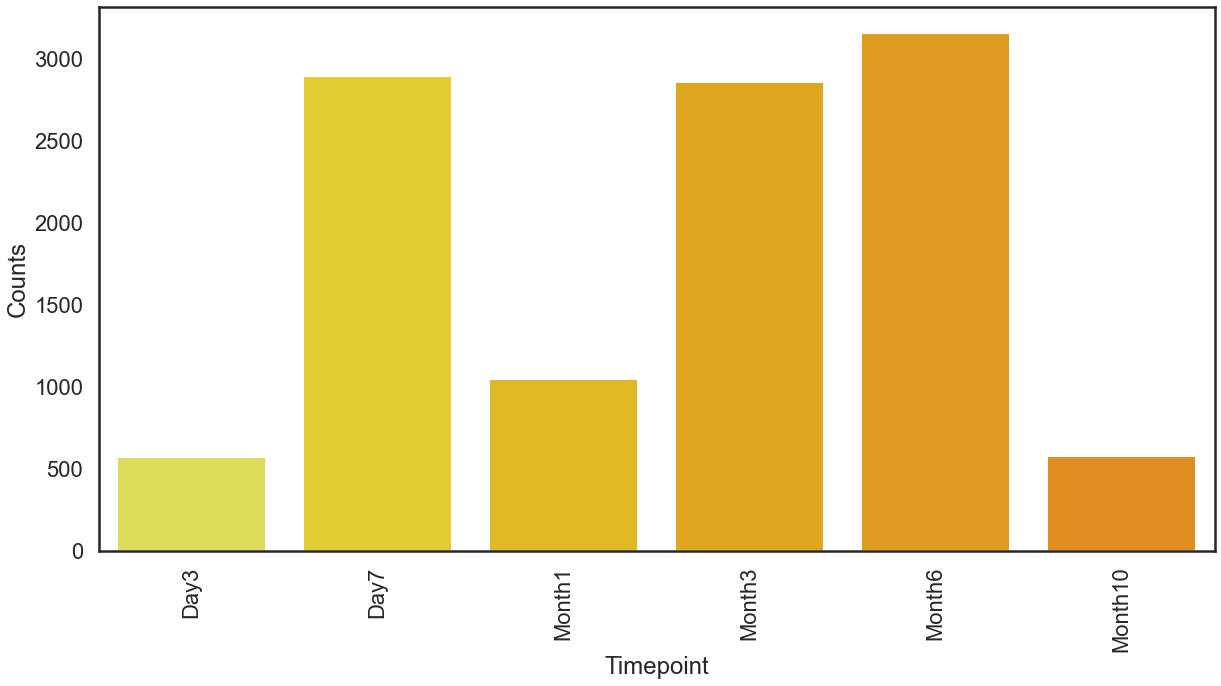

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ51_def_nm[AZ51_def_nm['type']=='CAS'], x='collection_timepoint', palette='Wistia', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_CAS_defense.png', dpi=150, bbox_inches='tight')

In [50]:
AZ51_def_nm.head()

gene_name     type qiita_sample_name  box_id  cage_id  \
sample-id                                                                
41B_Day7_1            GajA   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1          GajB_2   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1          GajB_2   Gabija  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1  ThsA_new_petit  Thoeris  12986.41B.Day7.1     NaN     41.0   
41B_Day7_1     ThsB_Global  Thoeris  12986.41B.Day7.1     NaN     41.0   

           collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                  
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   
41B_Day7_1                 Day7        9/20/17 10:00        9/13/17   RC   

            elevation  ... dam sire date_collected bacteria_strain  \
sample-id              ...                                           
41B_Day7_1      193.0  ...  A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...  A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...  A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...  A1    A        9/20/17            AZ51   
41B_Day7_1      193.0  ...  A1    A        9/20/17            AZ51   

           extraction_method extraction_kit  run plate index_x     index_y  
sample-id                                                                   
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN  41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN  41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN  41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN  41B_Day7_1  
41B_Day7_1     magnetic bead    Thermo CORE  2.0   5.0     NaN  41B_Day7_1  

[5 rows x 59 columns]

In [51]:
AZ51_def_nm[AZ51_def_nm['type']=='CBASS'].groupby(by=['qiita_sample_name']).count()

gene_name  type  box_id  cage_id  collection_timepoint  \
qiita_sample_name                                                             
12986.45L.Month3.2           5     5       0        5                     5   
12986.45L.Month3.6           8     8       0        8                     8   
12986.45L.Month6.23          8     8       0        8                     8   
12986.45L.Month6.6           8     8       0        8                     8   
12986.45N.Month3.13          8     8       0        8                     8   
12986.45N.Month3.14          3     3       0        3                     3   
12986.45N.Month3.16          8     8       0        8                     8   
12986.45R.Month3.13          9     9       0        9                     9   
12986.45R.Month3.18          8     8       0        8                     8   
12986.46L.Day7.10            7     7       0        7                     7   
12986.46L.Day7.15            8     8       0        8                     8   
12986.46L.Day7.18            8     8       0        8                     8   
12986.46L.Day7.4             8     8       0        8                     8   
12986.46L.Month3.13          8     8       0        8                     8   
12986.46L.Month6.11          8     8       0        8                     8   
12986.46L.Month6.15          8     8       0        8                     8   
12986.46L.Month6.16          8     8       0        8                     8   
12986.46L.Month6.2           8     8       0        8                     8   
12986.46L.Month6.21          8     8       0        8                     8   
12986.46L.Month6.6           8     8       0        8                     8   
12986.46L.Month6.9           8     8       0        8                     8   
12986.46N.Month3.13          8     8       0        8                     8   
12986.46N.Month3.23          8     8       0        8                     8   
12986.46N.Month6.12          8     8       0        8                     8   
12986.46N.Month6.14          8     8       0        8                     8   
12986.46N.Month6.15          8     8       0        8                     8   
12986.46N.Month6.19          8     8       0        8                     8   
12986.46N.Month6.20          8     8       0        8                     8   
12986.46N.Month6.24          8     8       0        8                     8   
12986.46R.Day7.10            8     8       0        8                     8   
12986.46R.Day7.15            8     8       0        8                     8   
12986.46R.Day7.3             8     8       0        8                     8   
12986.46R.Day7.5             8     8       0        8                     8   
12986.46R.Day7.6             8     8       0        8                     8   
12986.46R.Month3.13          8     8       0        8                     8   
12986.46R.Month3.15          8     8       0        8                     8   
12986.46R.Month6.13          8     8       0        8                     8   
12986.46R.Month6.14          8     8       0        8                     8   
12986.46R.Month6.15          8     8       0        8                     8   
12986.46R.Month6.16          8     8       0        8                     8   
12986.46R.Month6.17          8     8       0        8                     8   
12986.46R.Month6.18          8     8       0        8                     8   
12986.46R.Month6.19          8     8       0        8                     8   
12986.46R.Month6.20          5     5       0        5                     5   
12986.46R.Month6.21          8     8       0        8                     8   
12986.46R.Month6.22          8     8       0        8                     8   
12986.46R.Month6.23          8     8       0        8                     8   
12986.46R.Month6.24          8     8       0        8                     8   

                     collection_timestamp  date_colonized  diet  eleva

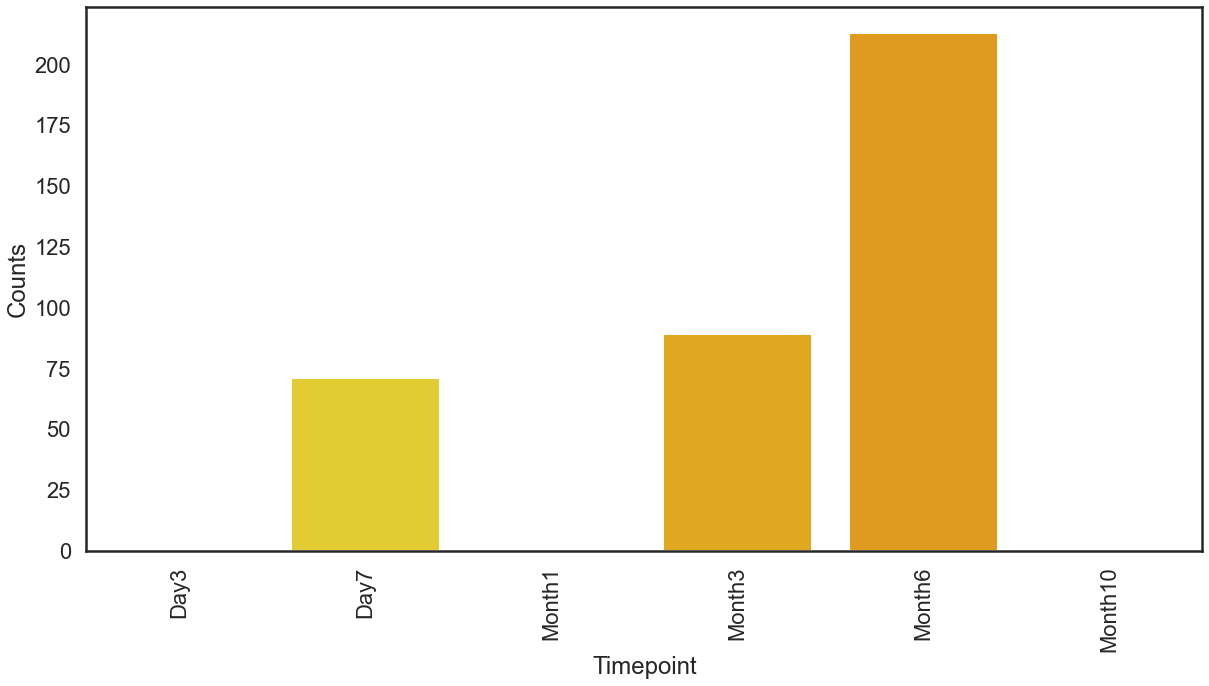

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ51_def_nm[AZ51_def_nm['type']=='CBASS'], x='collection_timepoint', palette='Wistia', 
             order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_CBASS_defense.png', dpi=150, bbox_inches='tight')

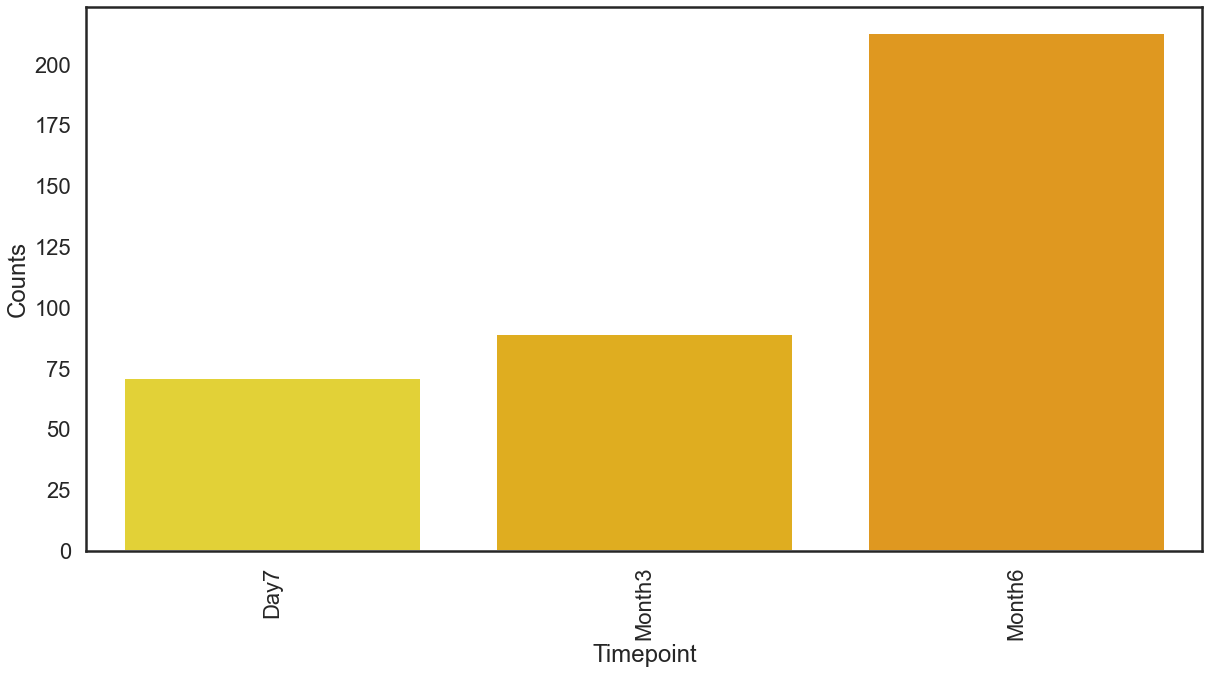

In [50]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.countplot(data=AZ51_def_nm[AZ51_def_nm['type']=='CBASS'], x='collection_timepoint', palette='Wistia', 
             order=['Day7', 'Month3', 'Month6'])
plt.xlabel('Timepoint', fontsize=24)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=24)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_CBASS_defense.png', dpi=150, bbox_inches='tight')

In [52]:
CBASS_AZ51 = AZ51_def_nm[AZ51_def_nm['type']=='CBASS']
CBASS_AZ51

gene_name   type    qiita_sample_name  box_id  cage_id  \
sample-id                                                                   
45L_Month3_2          TRIP13  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2           HORMA  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2      bacHORMA_2  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2      Cyclase_II  CBASS   12986.45L.Month3.2     NaN     45.0   
45L_Month3_2   Endonuc_small  CBASS   12986.45L.Month3.2     NaN     45.0   
...                      ...    ...                  ...     ...      ...   
46R_Month6_24         TRIP13  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24          HORMA  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24     bacHORMA_2  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24     Cyclase_II  CBASS  12986.46R.Month6.24     NaN     46.0   
46R_Month6_24  Endonuc_small  CBASS  12986.46R.Month6.24     NaN     46.0   

              collection_timepoint collection_timestamp date_colonized diet  \
sample-id                                                                     
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
45L_Month3_2                Month3       12/12/17 10:00        9/13/17   RC   
...                            ...                  ...            ...  ...   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   
46R_Month6_24               Month6        3/13/18 10:00        9/13/17   RC   

               elevation  ... dam sire date_collected bacteria_strain  \
sample-id                 ...                                           
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
45L_Month3_2       193.0  ...  B1    B       12/12/17            AZ51   
...                  ...  ...  ..  ...            ...             ...   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   
46R_Month6_24      193.0  ...  B1    B        3/13/18            AZ51   

              extraction_method extraction_kit  run plate index_x  \
sample-id                                                           
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
45L_Month3_2      magnetic bead    Thermo CORE  2.0  14.0     NaN   
...                         ...            ...  ...   ...     ...   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   
46R_Month6_24     magnetic bead    Thermo CORE  2.0  21.0     NaN   

                     index_y  
sample-id                     
45L_Month3_2             NaN  
45L_Month3_2             NaN  
45L_Month3_2     

In [53]:
CBASS_AZ51.cage_id.unique()

array([45., 46.])

In [54]:
CBASS_AZ51.mouse.unique()

array(['45L', '45N', '45R', '46L', '46N', '46R'], dtype=object)

In [55]:
CBASS_AZ51.groupby(by=['collection_timepoint', 'mouse']).count()

gene_name  type  qiita_sample_name  box_id  \
collection_timepoint mouse                                               
Day7                 46L           31    31                 31       0   
                     46R           40    40                 40       0   
Month3               45L           13    13                 13       0   
                     45N           19    19                 19       0   
                     45R           17    17                 17       0   
                     46L            8     8                  8       0   
                     46N           16    16                 16       0   
                     46R           16    16                 16       0   
Month6               45L           16    16                 16       0   
                     46L           56    56                 56       0   
                     46N           48    48                 48       0   
                     46R           93    93                 93       0   

                            cage_id  collection_timestamp  date_colonized  \
collection_timepoint mouse                                                  
Day7                 46L         31                    31              31   
                     46R         40                    40              40   
Month3               45L         13                    13              13   
                     45N         19                    19              19   
                     45R         17                    17              17   
                     46L          8                     8               8   
                     46N         16                    16              16   
                     46R         16                    16              16   
Month6               45L         16                    16              16   
                     46L         56                    56              56   
                     46N         48                    48              48   
                     46R         93                    93              93   

                            diet  elevation  elevation_units  ...  dam  sire  \
collection_timepoint mouse                                    ...              
Day7                 46L      31         31               31  ...   31    31   
                     46R      40         40               40  ...   40    40   
Month3               45L      13         13               13  ...   13    13   
                     45N      19         19               19  ...   19    19   
                     45R      17         17               17  ...   17    17   
                     46L       8          8                8  ...    8     8   
                     46N      16         16               16  ...   16    16   
                     46R      16         16               16  ...   16    16   
Month6               45L      16         16               16  ...   16    16   
                     46L      56         56               56  ...   56    56   
                     46N      48         48               48  ...   48    48   
                     46R      93         93               93  ...   93    93   

                            date_collected  bacteria_strain  \
collection_timepoint mouse                                    
Day7                 46L                31               31   
                     46R                40               40   
Month3               45L                13               13   
                     45N                19               19   
                     45R                17               17   
                     46L                 8                8   
                     46N                16               16   
                     46R                16               16   
Month6               45L                16               16   
                     46L                56               56   
                     46N           

In [56]:
from itertools import product
AZ51_tuples = product(AZ51_def_nm.collection_timepoint.unique(), AZ51_def_nm.mouse.unique())

In [57]:
timept = []
mus = []
isocount = []

for tmpt, mou in list(AZ51_tuples):
    mus.append(mou)
    timept.append(tmpt)
    tp = AZ51_def_nm[AZ51_def_nm.collection_timepoint == tmpt]
    mstp = tp[tp.mouse == mou]
    isocount.append(len(list(mstp.index.unique())))

In [58]:
AZ51_counts = pd.DataFrame()
AZ51_counts['timepoint'] = timept
AZ51_counts['mouse'] = mus
AZ51_counts['iso_count'] = isocount
AZ51_counts['tp_mouse'] = AZ51_counts['timepoint'].astype(str)+"_"+AZ51_counts['mouse'].astype(str)
AZ51_counts

timepoint mouse  iso_count       tp_mouse
0         Day7   41B         24       Day7_41B
1         Day7  41LL         19      Day7_41LL
2         Day7   41L         18       Day7_41L
3         Day7   41N         19       Day7_41N
4         Day7   41R         19       Day7_41R
..         ...   ...        ...            ...
156  reference   45R          0  reference_45R
157  reference   46L          0  reference_46L
158  reference   46N          0  reference_46N
159  reference   46R          0  reference_46R
160  reference   NaN          0  reference_nan

[161 rows x 4 columns]

In [59]:
AZ51_ref_count = AZ51_defenses[AZ51_defenses['sample'] =='AZ51_ref'].copy()
AZ51_ref_count['gene_count'] = 1
AZ51_ref_count2 = AZ51_ref_count[['type', 'gene_count']].copy()
AZ51_ref_count3 = AZ51_ref_count2.groupby(by=['type']).sum()
AZ51_ref_count3['collection_timepoint'] = 'reference'
AZ51_ref_count3['tp_mouse'] = 'AZ51_ref'
AZ51_ref_count3['iso_count'] = 1
AZ51_ref_count3.sort_values(by=['gene_count'])

gene_count collection_timepoint  tp_mouse  iso_count
type                                                         
Gabija            3            reference  AZ51_ref          1
Thoeris           3            reference  AZ51_ref          1
CAS               6            reference  AZ51_ref          1
RM               10            reference  AZ51_ref          1

In [60]:
AZ51maintypes = list(AZ51_def_nm.type.unique())
AZ51_prop = AZ51_def_nm[AZ51_def_nm.type.isin(AZ51maintypes)].copy()
AZ51_prop['gene_count'] = 1
AZ51_prop2 = AZ51_prop[['collection_timepoint', 'mouse', 'type', 'gene_count']]
AZ51_prop3 = AZ51_prop2.groupby(by=['collection_timepoint', 'mouse', 'type']).sum()
AZ51_prop4 = AZ51_prop3.reset_index()
AZ51_prop4['tp_mouse'] = AZ51_prop4['collection_timepoint'].astype(str)+"_"+AZ51_prop4['mouse'].astype(str)
AZ51_prop5 = pd.merge(AZ51_prop4, AZ51_counts[['tp_mouse', 'iso_count']], left_on='tp_mouse', right_on='tp_mouse')
AZ51_prop5.head()

collection_timepoint mouse     type  gene_count  tp_mouse  iso_count
0                 Day3   41L      CAS         144  Day3_41L         24
1                 Day3   41L   Gabija          72  Day3_41L         24
2                 Day3   41L       RM         240  Day3_41L         24
3                 Day3   41L  Thoeris          72  Day3_41L         24
4                 Day3   41R      CAS         138  Day3_41R         23

In [61]:
AZ51_aveperiso = pd.concat([AZ51_prop5, AZ51_ref_count3.reset_index()])
AZ51_aveperiso

collection_timepoint mouse           type  gene_count    tp_mouse  \
0                   Day3   41L            CAS         144    Day3_41L   
1                   Day3   41L         Gabija          72    Day3_41L   
2                   Day3   41L             RM         240    Day3_41L   
3                   Day3   41L        Thoeris          72    Day3_41L   
4                   Day3   41R            CAS         138    Day3_41R   
..                   ...   ...            ...         ...         ...   
411               Month6   46R  dCTPdeaminase          12  Month6_46R   
0              reference   NaN            CAS           6    AZ51_ref   
1              reference   NaN         Gabija           3    AZ51_ref   
2              reference   NaN             RM          10    AZ51_ref   
3              reference   NaN        Thoeris           3    AZ51_ref   

     iso_count  
0           24  
1           24  
2           24  
3           24  
4           23  
..         ...  
411         24  
0            1  
1            1  
2            1  
3            1  

[416 rows x 6 columns]

In [62]:
AZ51_aveperiso['avg_genes_per_iso'] = AZ51_aveperiso['gene_count']/AZ51_aveperiso['iso_count']
AZ51_aveperiso.head()

collection_timepoint mouse     type  gene_count  tp_mouse  iso_count  \
0                 Day3   41L      CAS         144  Day3_41L         24   
1                 Day3   41L   Gabija          72  Day3_41L         24   
2                 Day3   41L       RM         240  Day3_41L         24   
3                 Day3   41L  Thoeris          72  Day3_41L         24   
4                 Day3   41R      CAS         138  Day3_41R         23   

   avg_genes_per_iso  
0                6.0  
1                3.0  
2               10.0  
3                3.0  
4                6.0

In [63]:
AZ51_aveperiso[AZ51_aveperiso['type']=='CBASS']

collection_timepoint mouse   type  gene_count    tp_mouse  iso_count  \
95                  Day7   46L  CBASS          31    Day7_46L         23   
111                 Day7   46R  CBASS          40    Day7_46R         24   
234               Month3   45L  CBASS          13  Month3_45L         19   
244               Month3   45N  CBASS          19  Month3_45N         20   
255               Month3   45R  CBASS          17  Month3_45R         24   
266               Month3   46L  CBASS           8  Month3_46L         24   
277               Month3   46N  CBASS          16  Month3_46N         24   
288               Month3   46R  CBASS          16  Month3_46R         24   
363               Month6   45L  CBASS          16  Month6_45L         24   
382               Month6   46L  CBASS          56  Month6_46L         24   
393               Month6   46N  CBASS          48  Month6_46N         24   
404               Month6   46R  CBASS          93  Month6_46R         24   

     avg_genes_per_iso  
95            1.347826  
111           1.666667  
234           0.684211  
244           0.950000  
255           0.708333  
266           0.333333  
277           0.666667  
288           0.666667  
363           0.666667  
382           2.333333  
393           2.000000  
404           3.875000

In [64]:
AZ51_aveperiso.sort_values(by=['avg_genes_per_iso'], inplace=True)
AZ51_aveperiso.set_index('tp_mouse', inplace=True)

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')
color_list = ['ivory', 'beige','lightgoldenrodyellow','yellow', 'khaki', 'palegoldenrod', 'gold', 
              'goldenrod', 'darkgoldenrod', 'chocolate', 'saddlebrown', 'brown']
for typ, clor in list(zip(AZ51_aveperiso.type.unique(),color_list)):
    g = sns.kdeplot(data=AZ51_aveperiso[AZ51_aveperiso['type'] == typ], x='gene_count', warn_singular=False,
                color=clor, shade=True)
plt.show()

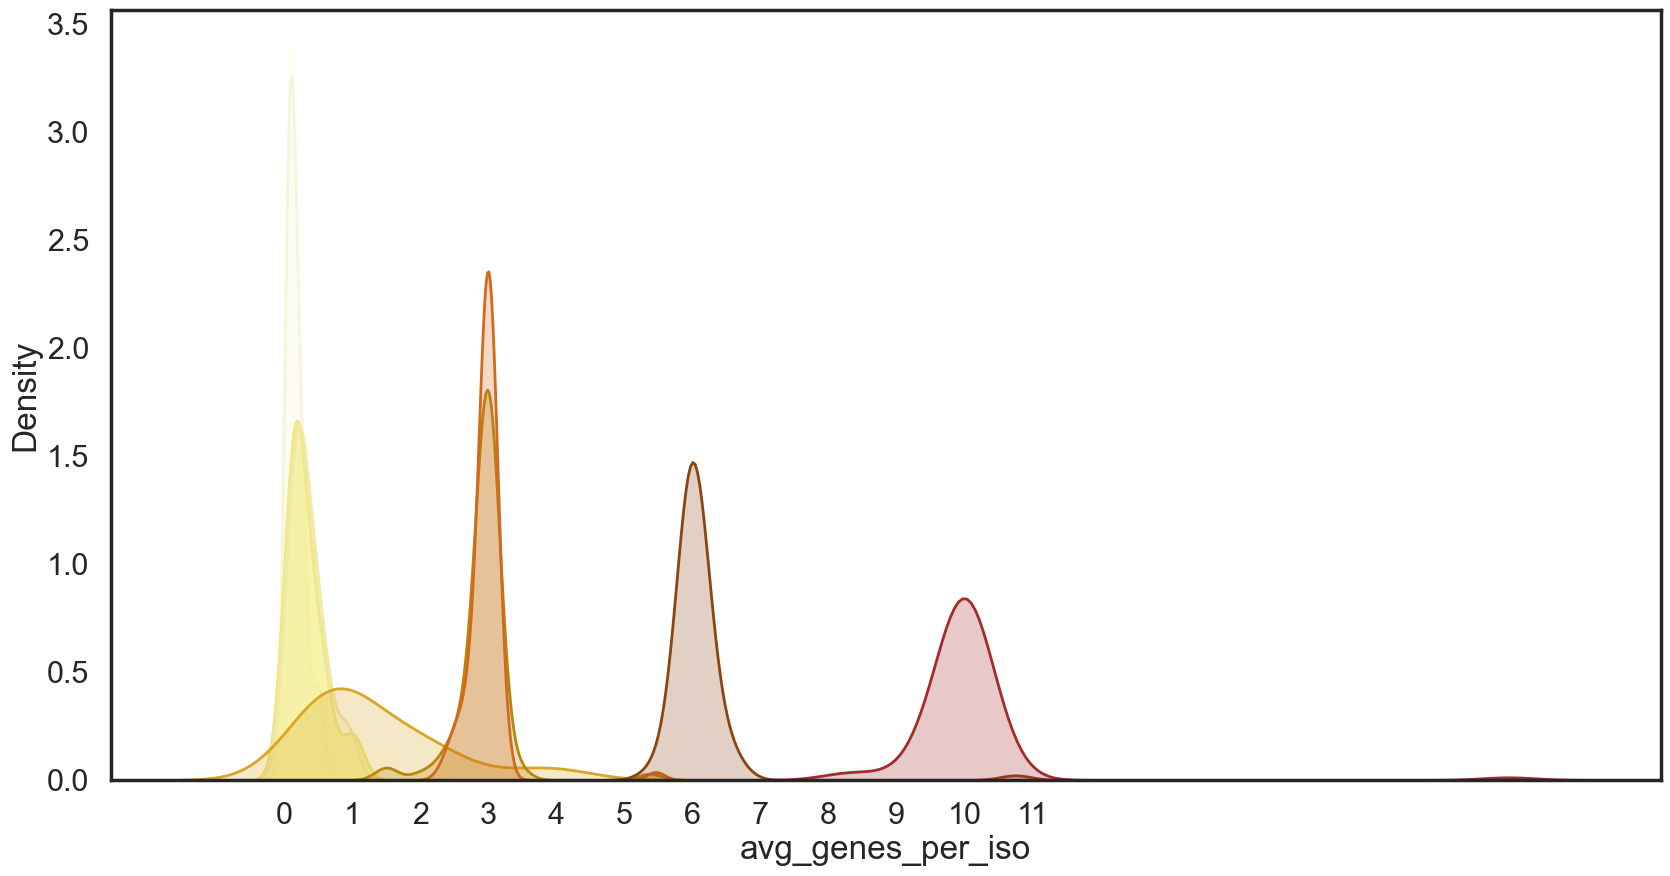

In [65]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')
color_list = ['ivory', 'beige','lightgoldenrodyellow','yellow', 'khaki', 'palegoldenrod', 'gold', 
              'goldenrod', 'darkgoldenrod', 'chocolate', 'saddlebrown', 'brown']
for typ, clor in list(zip(AZ51_aveperiso.type.unique(),color_list)):
    g = sns.kdeplot(data=AZ51_aveperiso[AZ51_aveperiso['type'] == typ], x='avg_genes_per_iso', 
                color=clor, warn_singular=False, shade=True)
    plt.xticks(np.arange(0, 12, 1))
plt.show()

In [66]:
list(zip(AZ51_aveperiso.type.unique(),color_list))

[('dCTPdeaminase', 'ivory'),
 ('Abi2', 'beige'),
 ('AbiEii', 'lightgoldenrodyellow'),
 ('DarTG', 'yellow'),
 ('Hachiman', 'khaki'),
 ('Druantia', 'palegoldenrod'),
 ('Mokosh', 'gold'),
 ('CBASS', 'goldenrod'),
 ('Thoeris', 'darkgoldenrod'),
 ('Gabija', 'chocolate'),
 ('CAS', 'saddlebrown'),
 ('RM', 'brown')]

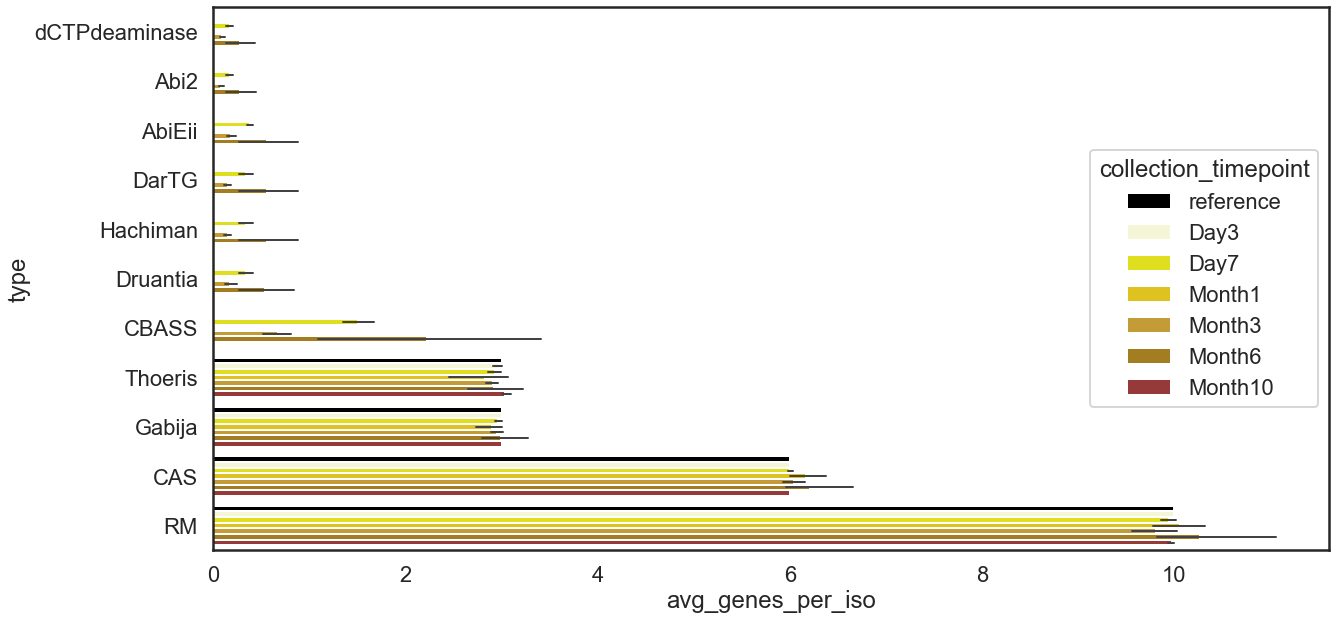

In [61]:
sns.barplot(data=AZ51_aveperiso[AZ51_aveperiso['type']!='Mokosh'],  #too low, only 1 tp
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=[ 'black','lightgoldenrodyellow','yellow','gold', 'goldenrod', 'darkgoldenrod', 'brown'],
             hue_order=['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.savefig('AZ51_alltypes_alltp_periso.svg', dpi=150, bbox_inches='tight')

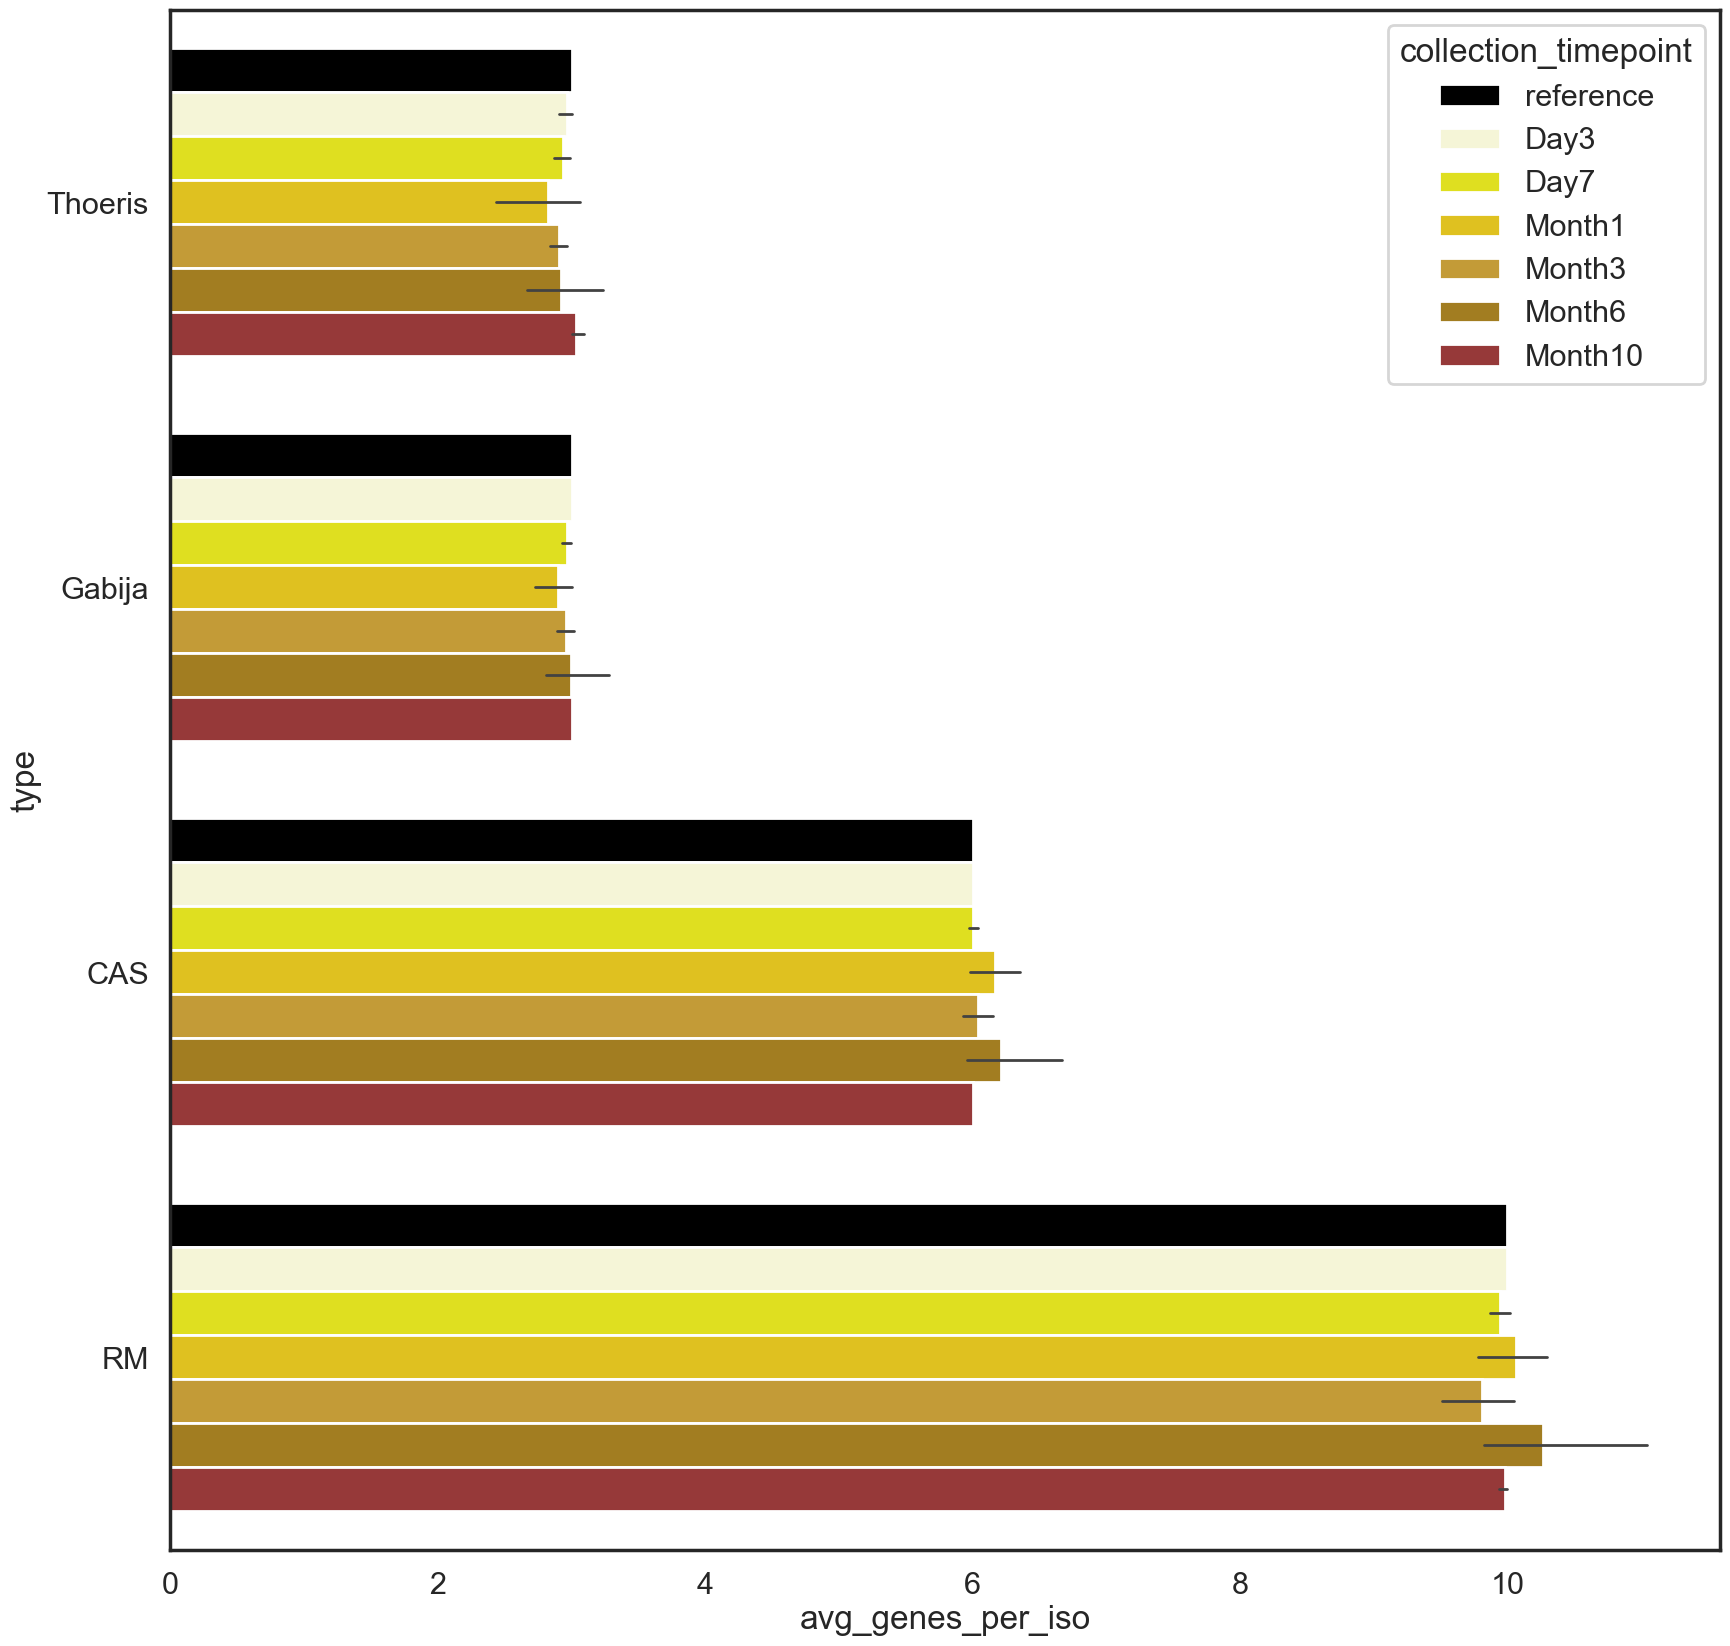

In [118]:
sns.barplot(data=AZ51_aveperiso[AZ51_aveperiso['type'].isin(['Thoeris', 'Gabija', 'CAS', 'RM'])],
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=[ 'black','lightgoldenrodyellow','yellow','gold', 'goldenrod', 'darkgoldenrod', 'brown'],
             hue_order=['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.savefig('AZ51_alltypes_alltp_periso_major.svg', dpi=150, bbox_inches='tight')

In [69]:
sns.barplot(data=AZ51_aveperiso[AZ51_aveperiso['type'].isin(['dCTPdeaminase', 'Abi2', 'AbiEii', 'DarTG', 
                                                            'Hachiman', 'Druantia', 'CBASS'])],
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=[ 'black','lightgoldenrodyellow','yellow','gold', 'goldenrod', 'darkgoldenrod', 'brown'],
             hue_order=['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], errwidth=2)
plt.savefig('AZ51_alltypes_alltp_periso_minor.svg', dpi=150, bbox_inches='tight')

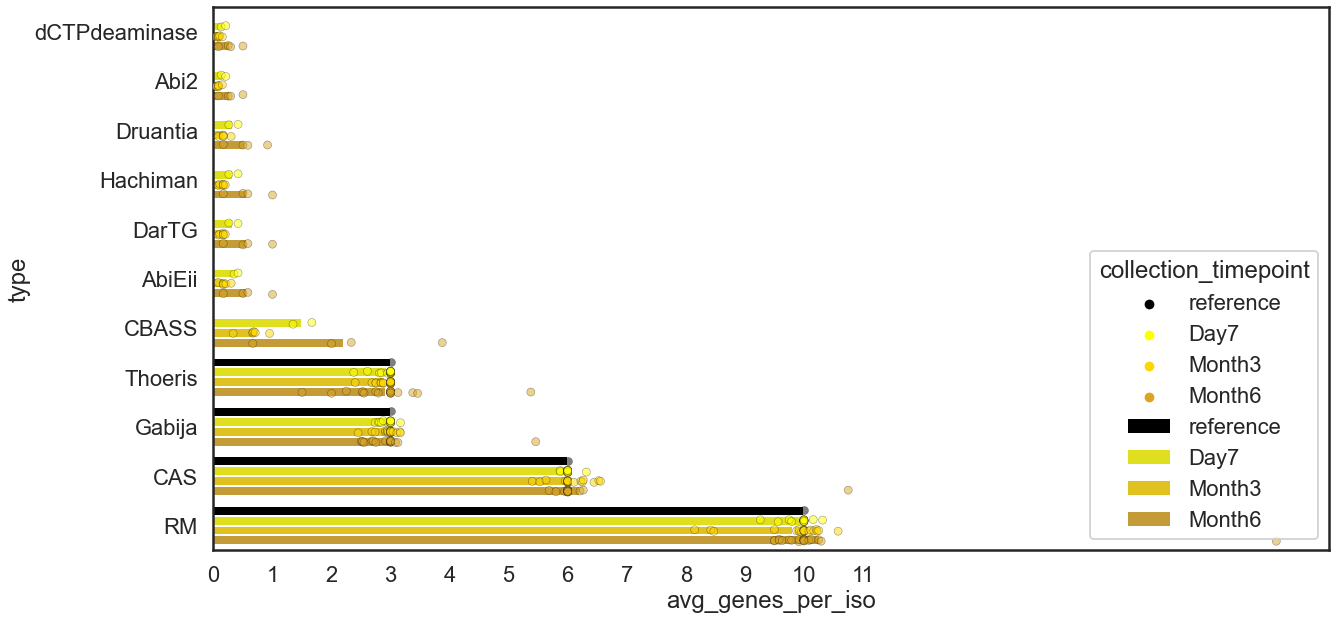

In [60]:
AZ51_prop6 = AZ51_aveperiso[AZ51_aveperiso.collection_timepoint.isin(['reference','Day7', 'Month3', 'Month6'])]
AZ51_prop7 = AZ51_prop6[AZ51_prop6['type']!='Mokosh'] #too low, only 1 tp
sns.barplot(data=AZ51_prop7.sort_values(by=['avg_genes_per_iso']), 
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
            palette=[ 'black','yellow','gold', 'goldenrod'], ci=None,
             hue_order=[ 'reference','Day7', 'Month3', 'Month6'])
sns.stripplot(data=AZ51_prop7.sort_values(by=['avg_genes_per_iso']), 
            x='avg_genes_per_iso', y='type', hue='collection_timepoint', 
              palette=[ 'black','yellow','gold', 'goldenrod'], dodge=True, alpha=0.5,
             hue_order=[ 'reference', 'Day7', 'Month3', 'Month6'], size=8, edgecolor='k', linewidth=0.5)
plt.xticks(np.arange(0, 12, 1))
plt.savefig('AZ51_alltypes_3tp_periso.svg', dpi=150, bbox_inches='tight')

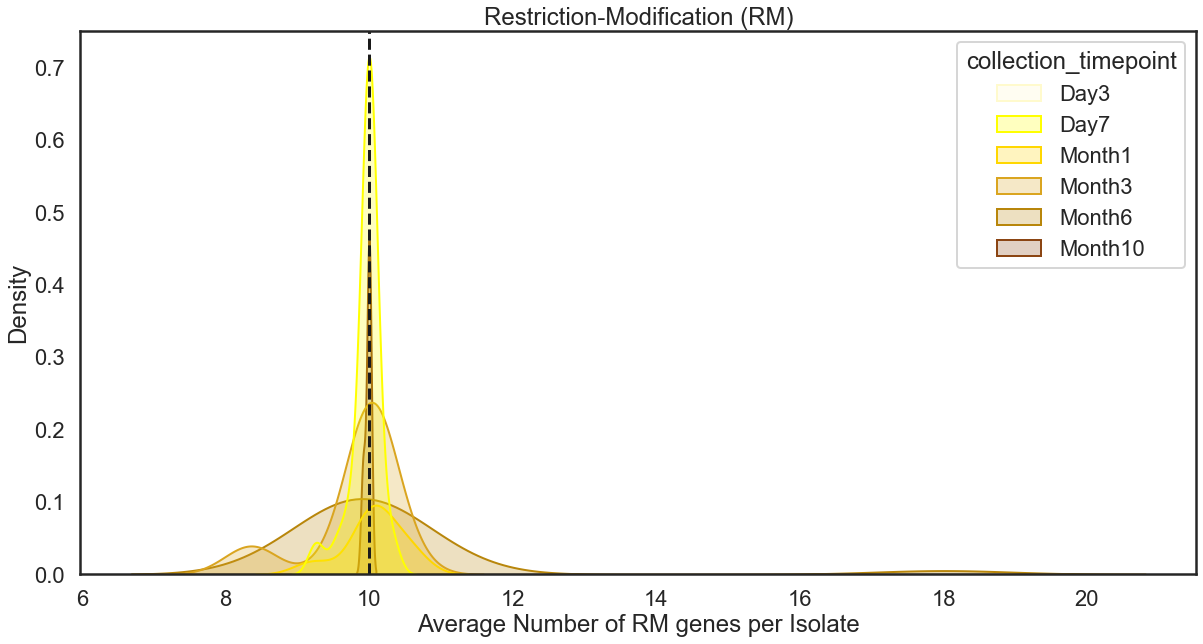

In [36]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ51_aveperiso[AZ51_aveperiso['type']=='RM'], x='avg_genes_per_iso', 
            hue='collection_timepoint', 
            palette=[ 'lemonchiffon', 'yellow', 'gold', 'goldenrod', 'darkgoldenrod', 'saddlebrown'], 
            shade=True, warn_singular=False,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(10, c="k", ls='--') #number in reference
plt.title('Restriction-Modification (RM)')
plt.xlabel('Average Number of RM genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ51_RMdefense2.png', dpi=150, bbox_inches='tight')

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ51_aveperiso[AZ51_aveperiso['type']=='RM'], x='avg_genes_per_iso', 
            hue='collection_timepoint', 
            palette=[ 'yellow', 'gold', 'goldenrod'], 
            shade=True, warn_singular=False,
             hue_order=['Day7', 'Month3', 'Month6', ])
plt.axvline(10, c="k", ls='--') #number in reference
plt.title('Restriction-Modification (RM)')
plt.xlabel('Average Number of RM genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_RMdefense2.png', dpi=150, bbox_inches='tight')

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ51_aveperiso[AZ51_aveperiso['type']=='CBASS'], x='avg_genes_per_iso', 
            hue='collection_timepoint', 
            palette=[ 'yellow','gold', 'goldenrod'], 
            shade=True, warn_singular=False,
             hue_order=['Day7', 'Month3', 'Month6'])
plt.axvline(0, c="k", ls='--') #number in reference
plt.title('Cyclic oligonucleotide-based antiphage signaling system (CBASS)')
plt.xlabel('Average Number of CBASS genes per Isolate', fontsize=24)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_CBASS_defense2.png', dpi=150, bbox_inches='tight')

In [71]:
mus = []
timept = []
islt = []
num_types = []
typez = []

for isol in AZ51_def_nm.index.unique():
    subset = AZ51_def_nm[AZ51_def_nm.index == isol]
    islt.append(isol)
    mus.append(subset.mouse.iloc[0])
    timept.append(subset.collection_timepoint.iloc[0])
    typez.append(list(subset.type.unique()))
    num_types.append(len(list(subset.type.unique())))

In [72]:
AZ51_type_variety = pd.DataFrame()
AZ51_type_variety['isolate'] = islt
AZ51_type_variety['mouse'] = mus
AZ51_type_variety['timepoint'] = timept
AZ51_type_variety['num_types'] = num_types
AZ51_type_variety['types_list'] = typez
AZ51_type_variety

isolate mouse  timepoint  num_types                  types_list
0       41B_Day7_1   41B       Day7          4  [Gabija, Thoeris, RM, CAS]
1      41B_Day7_10   41B       Day7          4  [Gabija, Thoeris, RM, CAS]
2      41B_Day7_11   41B       Day7          4  [Gabija, Thoeris, RM, CAS]
3      41B_Day7_12   41B       Day7          4  [Gabija, Thoeris, RM, CAS]
4      41B_Day7_13   41B       Day7          4  [Gabija, Thoeris, RM, CAS]
...            ...   ...        ...        ...                         ...
1822  46R_Month6_6   46R     Month6          4  [Gabija, Thoeris, RM, CAS]
1823  46R_Month6_7   46R     Month6          4  [Gabija, Thoeris, RM, CAS]
1824  46R_Month6_8   46R     Month6          4  [Gabija, Thoeris, RM, CAS]
1825  46R_Month6_9   46R     Month6          4  [Gabija, Thoeris, RM, CAS]
1826      AZ51_ref   NaN  reference          4  [Gabija, RM, CAS, Thoeris]

[1827 rows x 5 columns]

In [73]:
AZ51_type_variety.num_types.unique()

array([ 4,  3,  2,  1,  8, 10,  7, 11,  5,  9])

In [88]:
AZ51_type_variety[AZ51_type_variety['timepoint']=='Month10'].num_types.unique()
#needs variety to be plotted

array([4])

In [111]:
AZ51_type_variety.at[188,'num_types']=3
AZ51_type_variety.at[189,'num_types']=5
#should even out to average of 4, but still be plotable

In [112]:
AZ51_type_variety[AZ51_type_variety['timepoint']=='Month10']

isolate mouse timepoint  num_types                  types_list
188    41L_Month10_1   41L   Month10        3.0  [Gabija, Thoeris, RM, CAS]
189   41L_Month10_10   41L   Month10        5.0  [Gabija, Thoeris, RM, CAS]
190   41L_Month10_11   41L   Month10        4.0  [Gabija, Thoeris, RM, CAS]
191   41L_Month10_12   41L   Month10        4.0  [Gabija, Thoeris, RM, CAS]
192   41L_Month10_13   41L   Month10        4.0  [Gabija, Thoeris, RM, CAS]
...              ...   ...       ...        ...                         ...
1659   46N_Month10_5   46N   Month10        4.0  [Gabija, Thoeris, RM, CAS]
1660   46N_Month10_6   46N   Month10        4.0  [Gabija, Thoeris, RM, CAS]
1661   46N_Month10_7   46N   Month10        4.0  [Gabija, Thoeris, RM, CAS]
1662   46N_Month10_8   46N   Month10        4.0  [Gabija, Thoeris, RM, CAS]
1663   46N_Month10_9   46N   Month10        4.0  [Gabija, Thoeris, RM, CAS]

[96 rows x 5 columns]

In [113]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context('poster')

sns.kdeplot(data=AZ51_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lemonchiffon', 'yellow', 'gold', 'goldenrod', 'darkgoldenrod', 'saddlebrown'], 
            shade=True,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(4, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xticks(np.arange(0, 11, 1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ51_defense_type_num_alltp.svg', dpi=150, bbox_inches='tight')

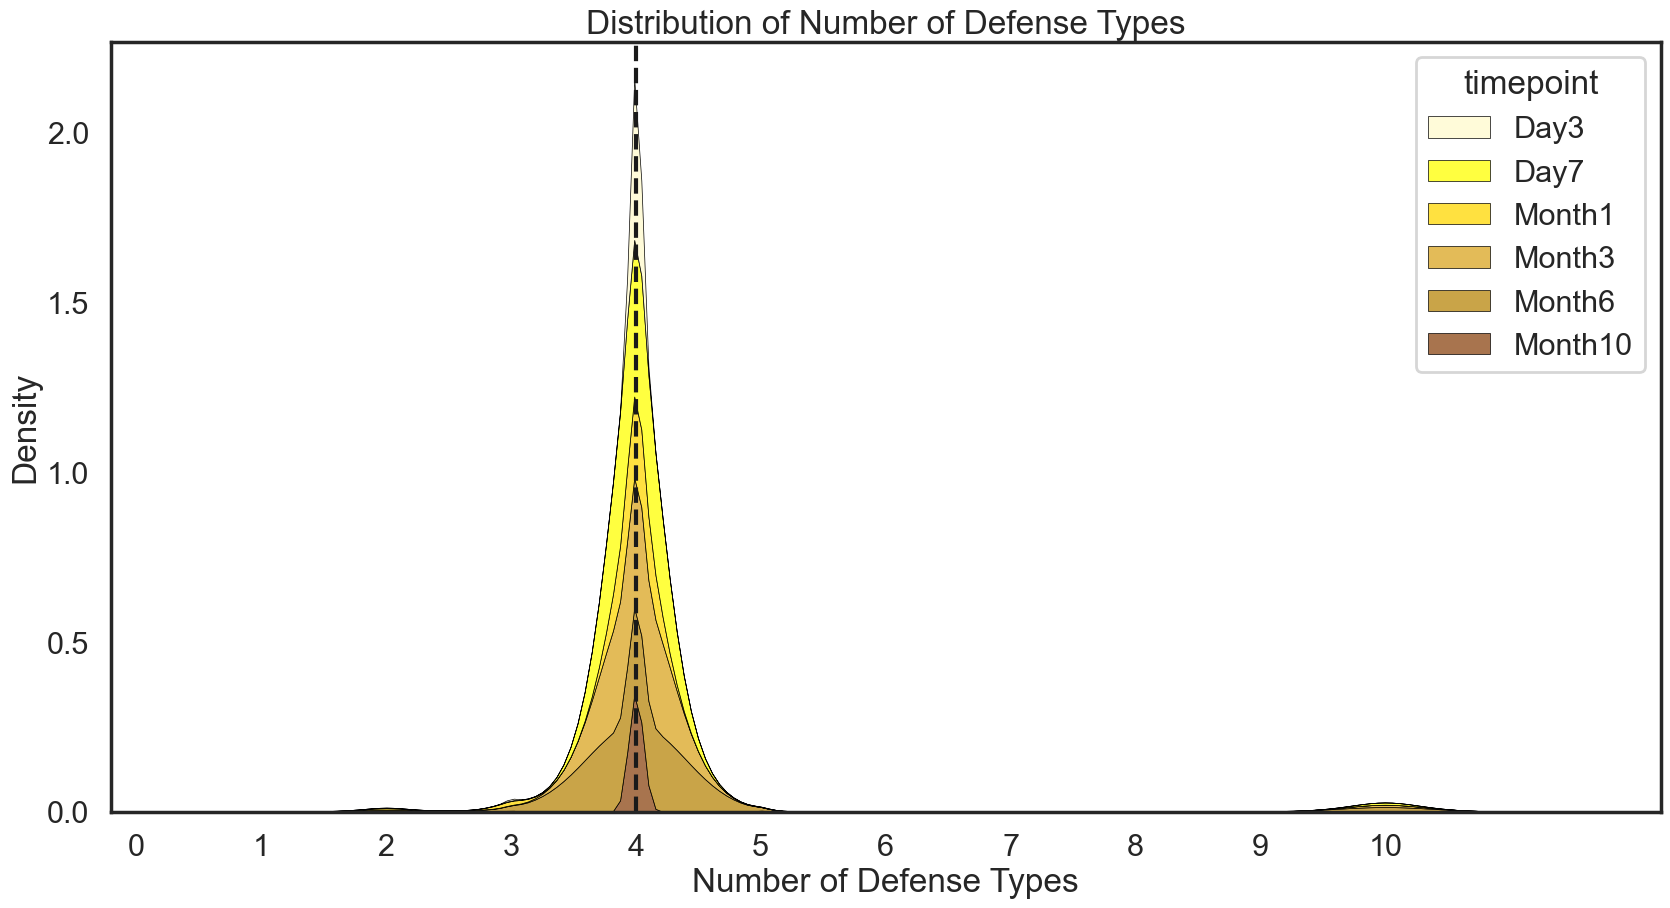

In [114]:
sns.kdeplot(data=AZ51_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lemonchiffon', 'yellow', 'gold', 'goldenrod', 'darkgoldenrod', 'saddlebrown'], 
            shade=True, multiple='stack', ec='black', lw=0.5,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(4, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xticks(np.arange(0, 11, 1))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('AZ51_defense_type_num_alltp_stack.svg', dpi=150, bbox_inches='tight')

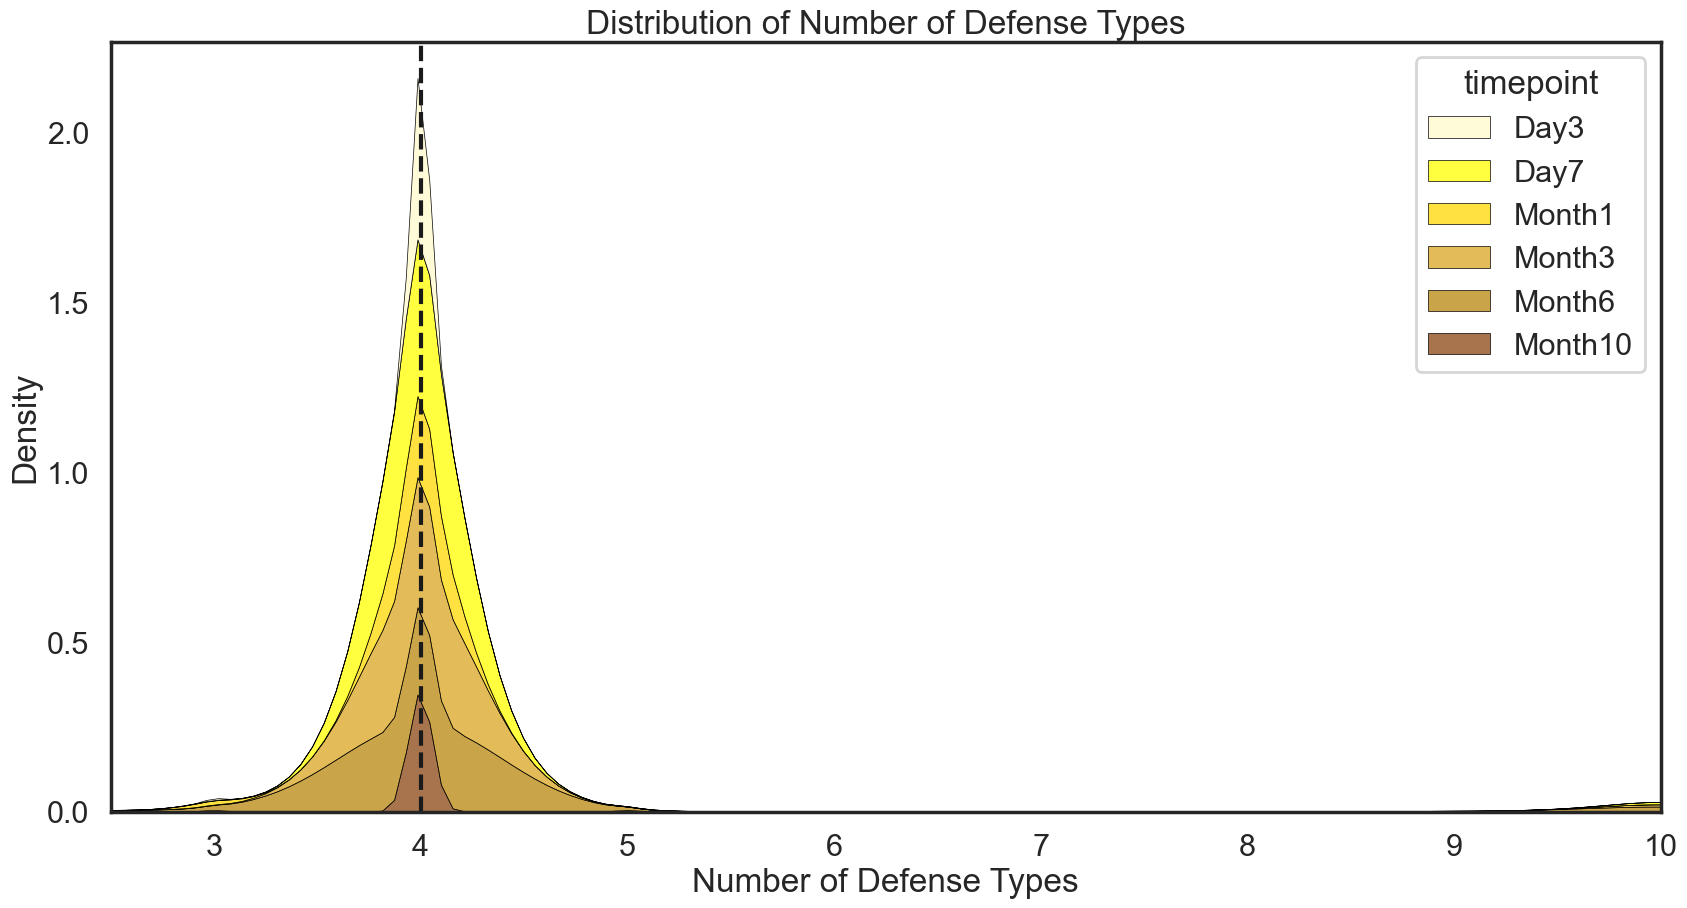

In [115]:
sns.kdeplot(data=AZ51_type_variety, x='num_types', 
            hue='timepoint', 
            palette=['lemonchiffon', 'yellow', 'gold', 'goldenrod', 'darkgoldenrod', 'saddlebrown'], 
            shade=True, warn_singular=False, multiple='stack', ec='black', lw=0.5,
             hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.axvline(4, c="k", ls='--') #number in reference
plt.title('Distribution of Number of Defense Types')
plt.xlabel('Number of Defense Types', fontsize=24)
plt.xlim(2.5,10)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_defense_type_num_alltp_stack_short.svg', dpi=150, bbox_inches='tight')

In [45]:
AZ51_type_variety.types_list.value_counts()

[Gabija, Thoeris, RM, CAS]                                                                   1742
[AbiEii, Abi2, Gabija, dCTPdeaminase, DarTG, Druantia, Hachiman, CBASS, RM, CAS]               16
[RM, CAS]                                                                                      13
[Gabija, RM, CAS]                                                                              12
[AbiEii, Gabija, Abi2, dCTPdeaminase, DarTG, Druantia, Hachiman, CBASS, RM, CAS]               11
[Thoeris, RM, CAS]                                                                              7
[Abi2, AbiEii, Gabija, dCTPdeaminase, DarTG, Druantia, Hachiman, CBASS, RM, CAS]                7
[Gabija, AbiEii, Abi2, dCTPdeaminase, DarTG, Druantia, Hachiman, CBASS, RM, CAS]                6
[RM]                                                                                            3
[Gabija, AbiEii, Abi2, DarTG, Druantia, Hachiman, CBASS, RM, CAS]                               1
[Abi2, Gabija, AbiEi

In [46]:
AZ51_type_variety2 = AZ51_type_variety.copy()
AZ51_type_variety2.types_list = AZ51_type_variety2.types_list.astype(str)
AZ51_type_variety2.dtypes

isolate       object
mouse         object
timepoint     object
num_types      int64
types_list    object
dtype: object

In [47]:
AZ51_type_variety2.groupby(by=['types_list', 'timepoint']).count()

isolate  mouse  \
types_list                                         timepoint                   
['Abi2', 'AbiEii', 'Gabija', 'dCTPdeaminase', '... Day7             1      1   
                                                   Month3           3      3   
                                                   Month6           3      3   
['Abi2', 'AbiEii', 'Gabija', 'dCTPdeaminase', '... Month6           1      1   
['Abi2', 'AbiEii', 'dCTPdeaminase', 'Druantia',... Month3           1      1   
['Abi2', 'Gabija', 'AbiEii', 'dCTPdeaminase', '... Month6           1      1   
['Abi2', 'dCTPdeaminase', 'AbiEii', 'DarTG', 'H... Month3           1      1   
['AbiEii', 'Abi2', 'Gabija', 'dCTPdeaminase', '... Day7             4      4   
                                                   Month3           3      3   
                                                   Month6           9      9   
['AbiEii', 'Gabija', 'Abi2', 'dCTPdeaminase', '... Day7             1      1   
                                                   Month3           1      1   
                                                   Month6           9      9   
['AbiEii', 'dCTPdeaminase', 'CBASS', 'RM']         Month3           1      1   
['Gabija', 'AbiEii', 'Abi2', 'DarTG', 'Druantia... Day7             1      1   
['Gabija', 'AbiEii', 'Abi2', 'dCTPdeaminase', '... Day7             1      1   
                                                   Month3           1      1   
                                                   Month6           4      4   
['Gabija', 'AbiEii', 'Abi2', 'dCTPdeaminase', '... Month3           1      1   
['Gabija', 'RM', 'CAS', 'Thoeris']                 reference        1      0   
['Gabija', 'RM', 'CAS']                            Day3             1      1   
                                                   Month1           7      7   
                                                   Month6           4      4   
['Gabija', 'RM']                                   Month3           1      1   
['Gabija', 'Thoeris', 'RM', 'CAS']                 Day3            94     94   
                                                   Day7           471    471   
                                                   Month1         158    158   
                                                   Month10         96     96   
                                                   Month3         457    457   
                                                   Month6         466    466   
['RM', 'CAS']                                      Day7             2      2   
                                                   Month1           3      3   
                                                   Month3           2      2   
                                                   Month6           6      6   
['RM']                                             Month1           1      1   
                                                   Month3           1      1   
                                                   Month6           1      1   
['Thoeris', 'RM', 'CAS']                           Day7             1      1   
                                                   Month1           1      1   
                                                   Month3           1      1   
                                                   Month6           4      4   
['dCTPdeaminase', 'AbiEii', 'Mokosh', 'CBASS', ... Day7             1      1   

                                                              num_types  
types_list                                         timepoint             
['Abi2', 'AbiEii', 'Gabija', 'dCTPdeaminase', '... Day7               1  
                                                   Month3             3  
                                                   Month6             3  
['Abi2', 'AbiEii', 'Gabija', 'dCTPdeaminase', '... Month6             1  
['Abi2', 'AbiEii', 'dCTPdeaminase', 'Druantia',... Month3             1  
['Abi2', 'Gabija', 'Abi

In [48]:
AZ51_type_variety2[AZ51_type_variety2.isolate == 'AZ51_ref'].types_list.iloc[0]

"['Gabija', 'RM', 'CAS', 'Thoeris']"

In [49]:
common_combos = ["['Gabija', 'Thoeris', 'RM', 'CAS']"] 
reference = ["['Gabija', 'Thoeris', 'RM', 'CAS']"]
#alternate/orginal: "['Gabija', 'RM', 'CAS', 'Thoeris']"
#Generally, no change in defense systems from original